In [4]:
import models.MLP.model as MLP
import models.CNN.model as CNN
import importlib
import numpy as np

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
from tqdm.auto import tqdm
import itertools
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F

transform_MNIST = transforms.Compose([
            transforms.ToTensor(),
            transforms.Lambda(lambda x: x.view(-1))
        ])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform_MNIST)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform_MNIST)

train_dataloader = DataLoader(train_dataset, batch_size=1)
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [34]:
importlib.reload(MLP)
importlib.reload(CNN)

<module 'models.CNN.model' from '/Users/zhaoyizhe/Documents/GitHub/biological-deep-learning/models/CNN/model.py'>

In [29]:
mymodelMLP_Sup_FO_WN = MLP.MLPBaseline_Model(hsize=64, lamb=15, lr=0.005, e=0.01, wtd=10, gamma=0.99, nclasses=10, o=MLP.ClassifierLearning.Contrastive, w=MLP.Learning.OrthogonalExclusive, ws=MLP.WeightScale.WeightNormalization)
mymodelMLP_Sup_FO_WN = MLP.MLPBaseline_Experiment(epoch=3, dataloader=train_dataloader, mymodel=mymodelMLP_Sup_FO_WN, dataset='FashionMNIST', nclasses=10)

  0%|          | 0/60000 [00:00<?, ?it/s]

tensor([[0.6386, 0.3823, 0.0957,  ..., 0.8696, 0.0426, 0.9579],
        [0.1026, 0.0971, 0.7085,  ..., 0.5557, 0.8780, 0.8574],
        [0.7309, 0.8994, 0.8825,  ..., 0.0914, 0.2600, 0.7807],
        ...,
        [0.2446, 0.2089, 0.1387,  ..., 0.7415, 0.1417, 0.7106],
        [0.2055, 0.6093, 0.6085,  ..., 0.1033, 0.5534, 0.8223],
        [0.6405, 0.1118, 0.3213,  ..., 0.2473, 0.3707, 0.1288]])
tensor([[-5.3652, -6.0233, -5.8617,  ..., -6.3592, -6.4445, -5.5102],
        [-8.0728, -8.9658, -8.3657,  ..., -9.4111, -9.1337, -8.0518],
        [-4.0640, -4.4997, -4.3338,  ..., -4.9244, -4.8364, -4.2189],
        ...,
        [-2.6556, -2.9503, -2.8462,  ..., -3.1347, -3.1232, -2.7335],
        [-3.8598, -4.2434, -4.0864,  ..., -4.6065, -4.4953, -3.9456],
        [-4.4101, -4.9782, -4.7667,  ..., -5.3189, -5.2272, -4.6564]])
tensor([[-0.0268, -0.0301, -0.0293,  ..., -0.0318, -0.0322, -0.0276],
        [-0.0404, -0.0448, -0.0418,  ..., -0.0471, -0.0457, -0.0403],
        [-0.0203, -0.0225, -

KeyboardInterrupt: 

In [63]:
hsize = [256]
lambds = [15]
lr = [0.005]
eps = [0.01]
rho = [10]
gamma = [0.99]
classifier_learnings = [MLP.ClassifierLearning.Supervised, MLP.ClassifierLearning.Contrastive, MLP.ClassifierLearning.Orthogonal]
weight_learnings = [MLP.Learning.FullyOrthogonal, MLP.Learning.OrthogonalExclusive]
weight_mods = [MLP.WeightScale.WeightDecay, MLP.WeightScale.WeightNormalization]
com = list(itertools.product(hsize, lambds, lr, eps, rho, gamma, classifier_learnings, weight_learnings, weight_mods))
combs = [list(comb) for comb in com]
print(len(combs))


12


In [3]:
lambds = [1]
rhos = [0.1, 0.3, 1, 3, 10, 30, 100]

New Image Dimensions after Convolution : 13
New Image Dimensions after Convolution : 11
New Image Dimensions after Convolution : 2048


  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.1, {9: (0, 1000, 0), 0: (1000, 1000, 9000), 2: (0, 1000, 0), 1: (0, 1000, 0), 6: (0, 1000, 0), 4: (0, 1000, 0), 5: (0, 1000, 0), 7: (0, 1000, 0), 3: (0, 1000, 0), 8: (0, 1000, 0)})
New Image Dimensions after Convolution : 13
New Image Dimensions after Convolution : 11
New Image Dimensions after Convolution : 2048


  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.2955, {9: (997, 1000, 1615), 2: (6, 1000, 56), 5: (128, 1000, 986), 1: (938, 1000, 847), 6: (15, 1000, 108), 0: (287, 1000, 2180), 4: (0, 1000, 0), 8: (128, 1000, 1064), 7: (352, 1000, 152), 3: (104, 1000, 37)})
New Image Dimensions after Convolution : 13
New Image Dimensions after Convolution : 11
New Image Dimensions after Convolution : 2048


  0%|          | 0/60000 [00:00<?, ?it/s]

/Users/zhaoyizhe/Documents/GitHub/biological-deep-learning/models/CNN/model.py:794: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(2, fmaps.size(1)//2, figsize=(20,5))


  0%|          | 0/10000 [00:00<?, ?it/s]

(0.138, {9: (0, 1000, 1), 3: (6, 1000, 3187), 2: (0, 1000, 0), 1: (121, 1000, 87), 0: (881, 1000, 3843), 6: (0, 1000, 15), 4: (7, 1000, 159), 5: (129, 1000, 965), 7: (6, 1000, 73), 8: (230, 1000, 290)})
New Image Dimensions after Convolution : 13
New Image Dimensions after Convolution : 11
New Image Dimensions after Convolution : 2048


  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.1145, {9: (128, 1000, 188), 8: (971, 1000, 6820), 2: (2, 1000, 717), 1: (0, 1000, 0), 4: (37, 1000, 1112), 6: (0, 1000, 6), 5: (7, 1000, 1), 7: (0, 1000, 11), 3: (0, 1000, 0), 0: (0, 1000, 0)})
New Image Dimensions after Convolution : 13
New Image Dimensions after Convolution : 11
New Image Dimensions after Convolution : 2048


  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.1053, {9: (0, 1000, 0), 7: (980, 1000, 7299), 2: (3, 1000, 20), 1: (7, 1000, 60), 8: (1, 1000, 1092), 6: (0, 1000, 2), 4: (0, 1000, 59), 5: (62, 1000, 415), 3: (0, 1000, 0), 0: (0, 1000, 0)})
New Image Dimensions after Convolution : 13
New Image Dimensions after Convolution : 11
New Image Dimensions after Convolution : 2048


  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.1, {9: (0, 1000, 0), 0: (1000, 1000, 9000), 2: (0, 1000, 0), 1: (0, 1000, 0), 6: (0, 1000, 0), 4: (0, 1000, 0), 5: (0, 1000, 0), 7: (0, 1000, 0), 3: (0, 1000, 0), 8: (0, 1000, 0)})
New Image Dimensions after Convolution : 13
New Image Dimensions after Convolution : 11
New Image Dimensions after Convolution : 2048


  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.1, {9: (0, 1000, 0), 0: (1000, 1000, 9000), 2: (0, 1000, 0), 1: (0, 1000, 0), 6: (0, 1000, 0), 4: (0, 1000, 0), 5: (0, 1000, 0), 7: (0, 1000, 0), 3: (0, 1000, 0), 8: (0, 1000, 0)})


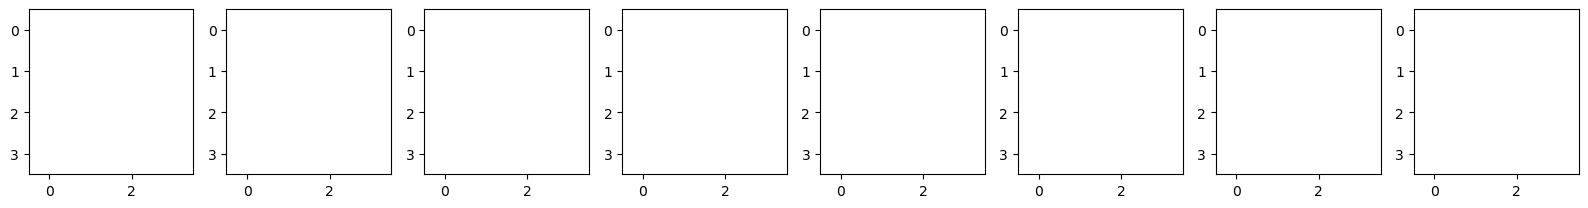

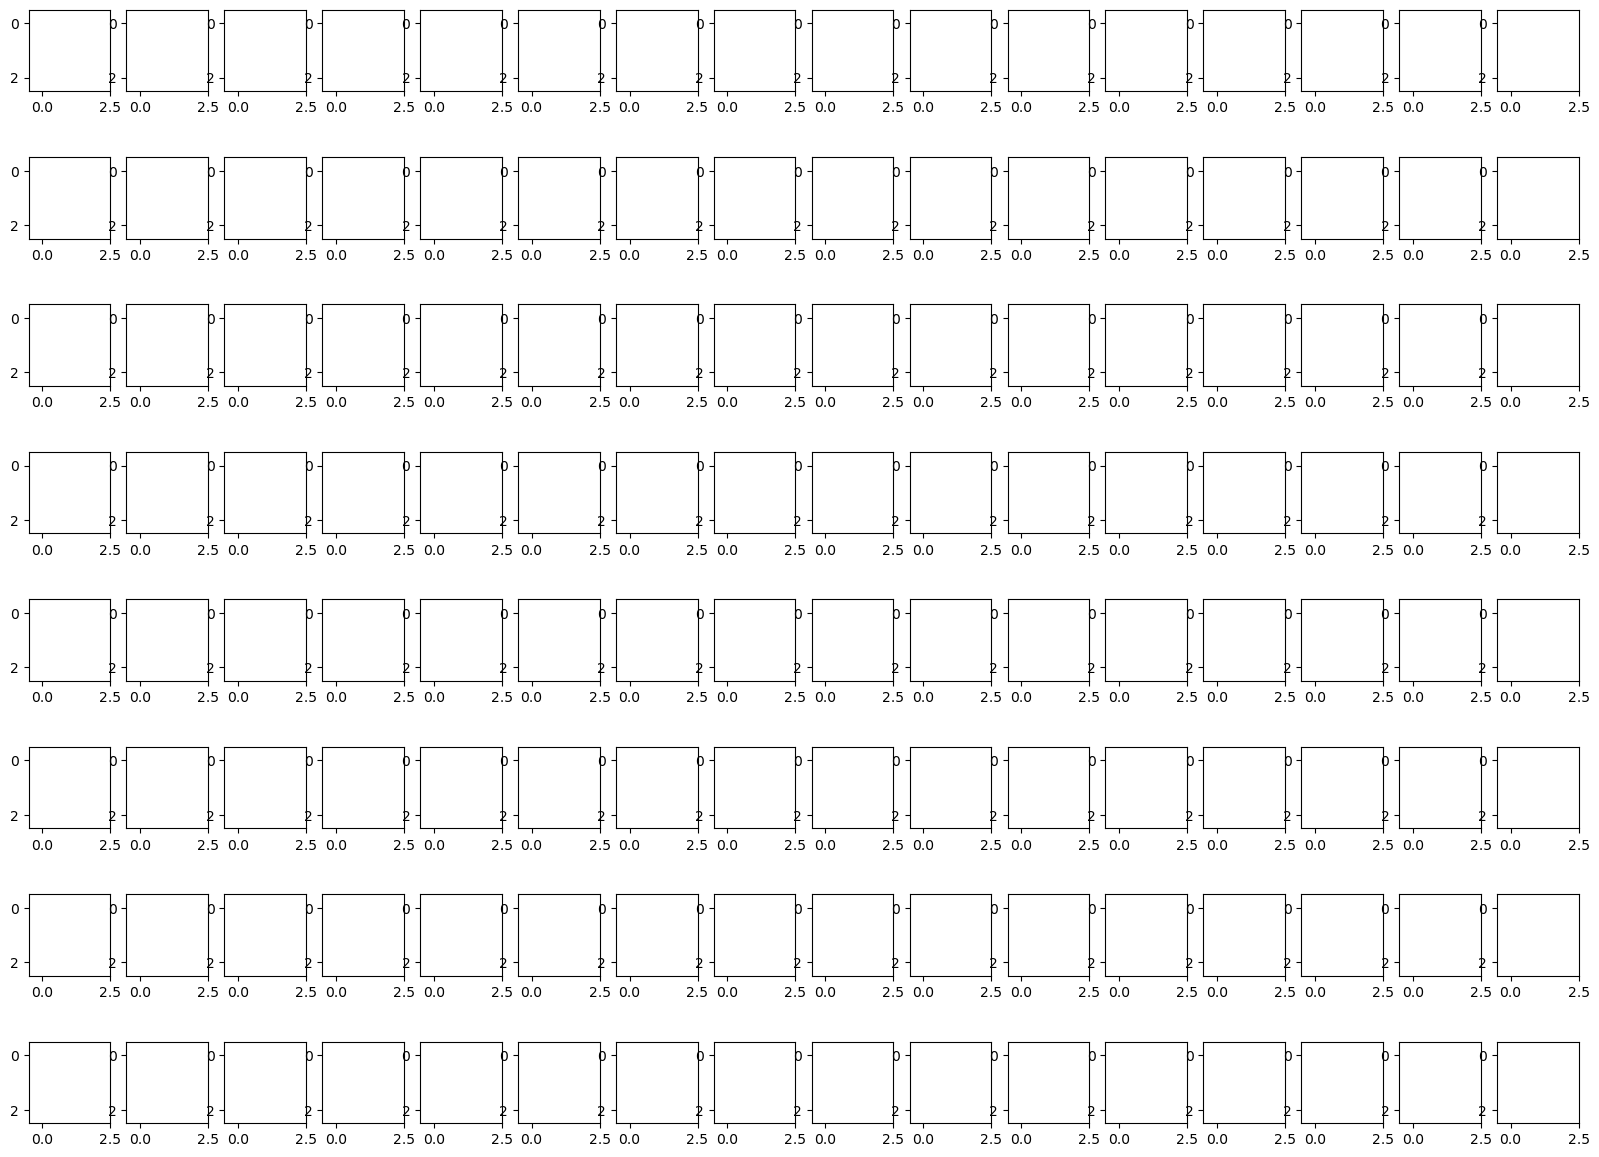

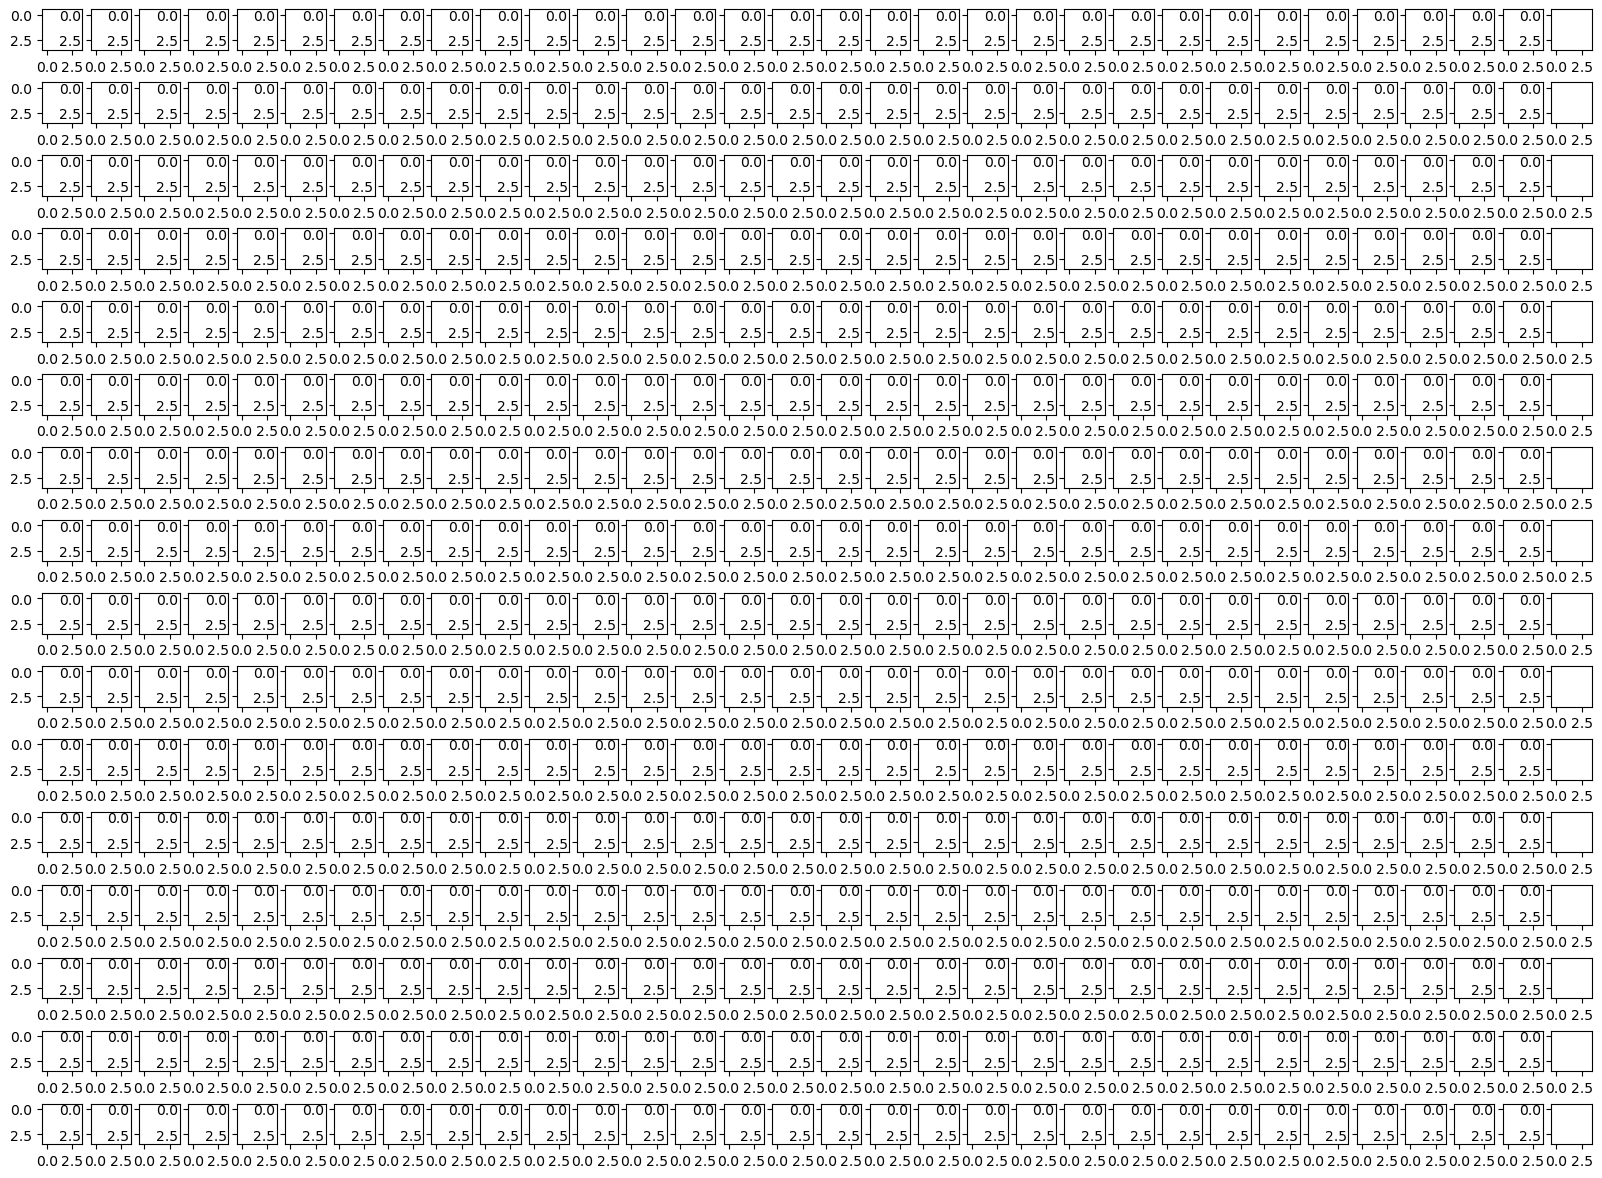

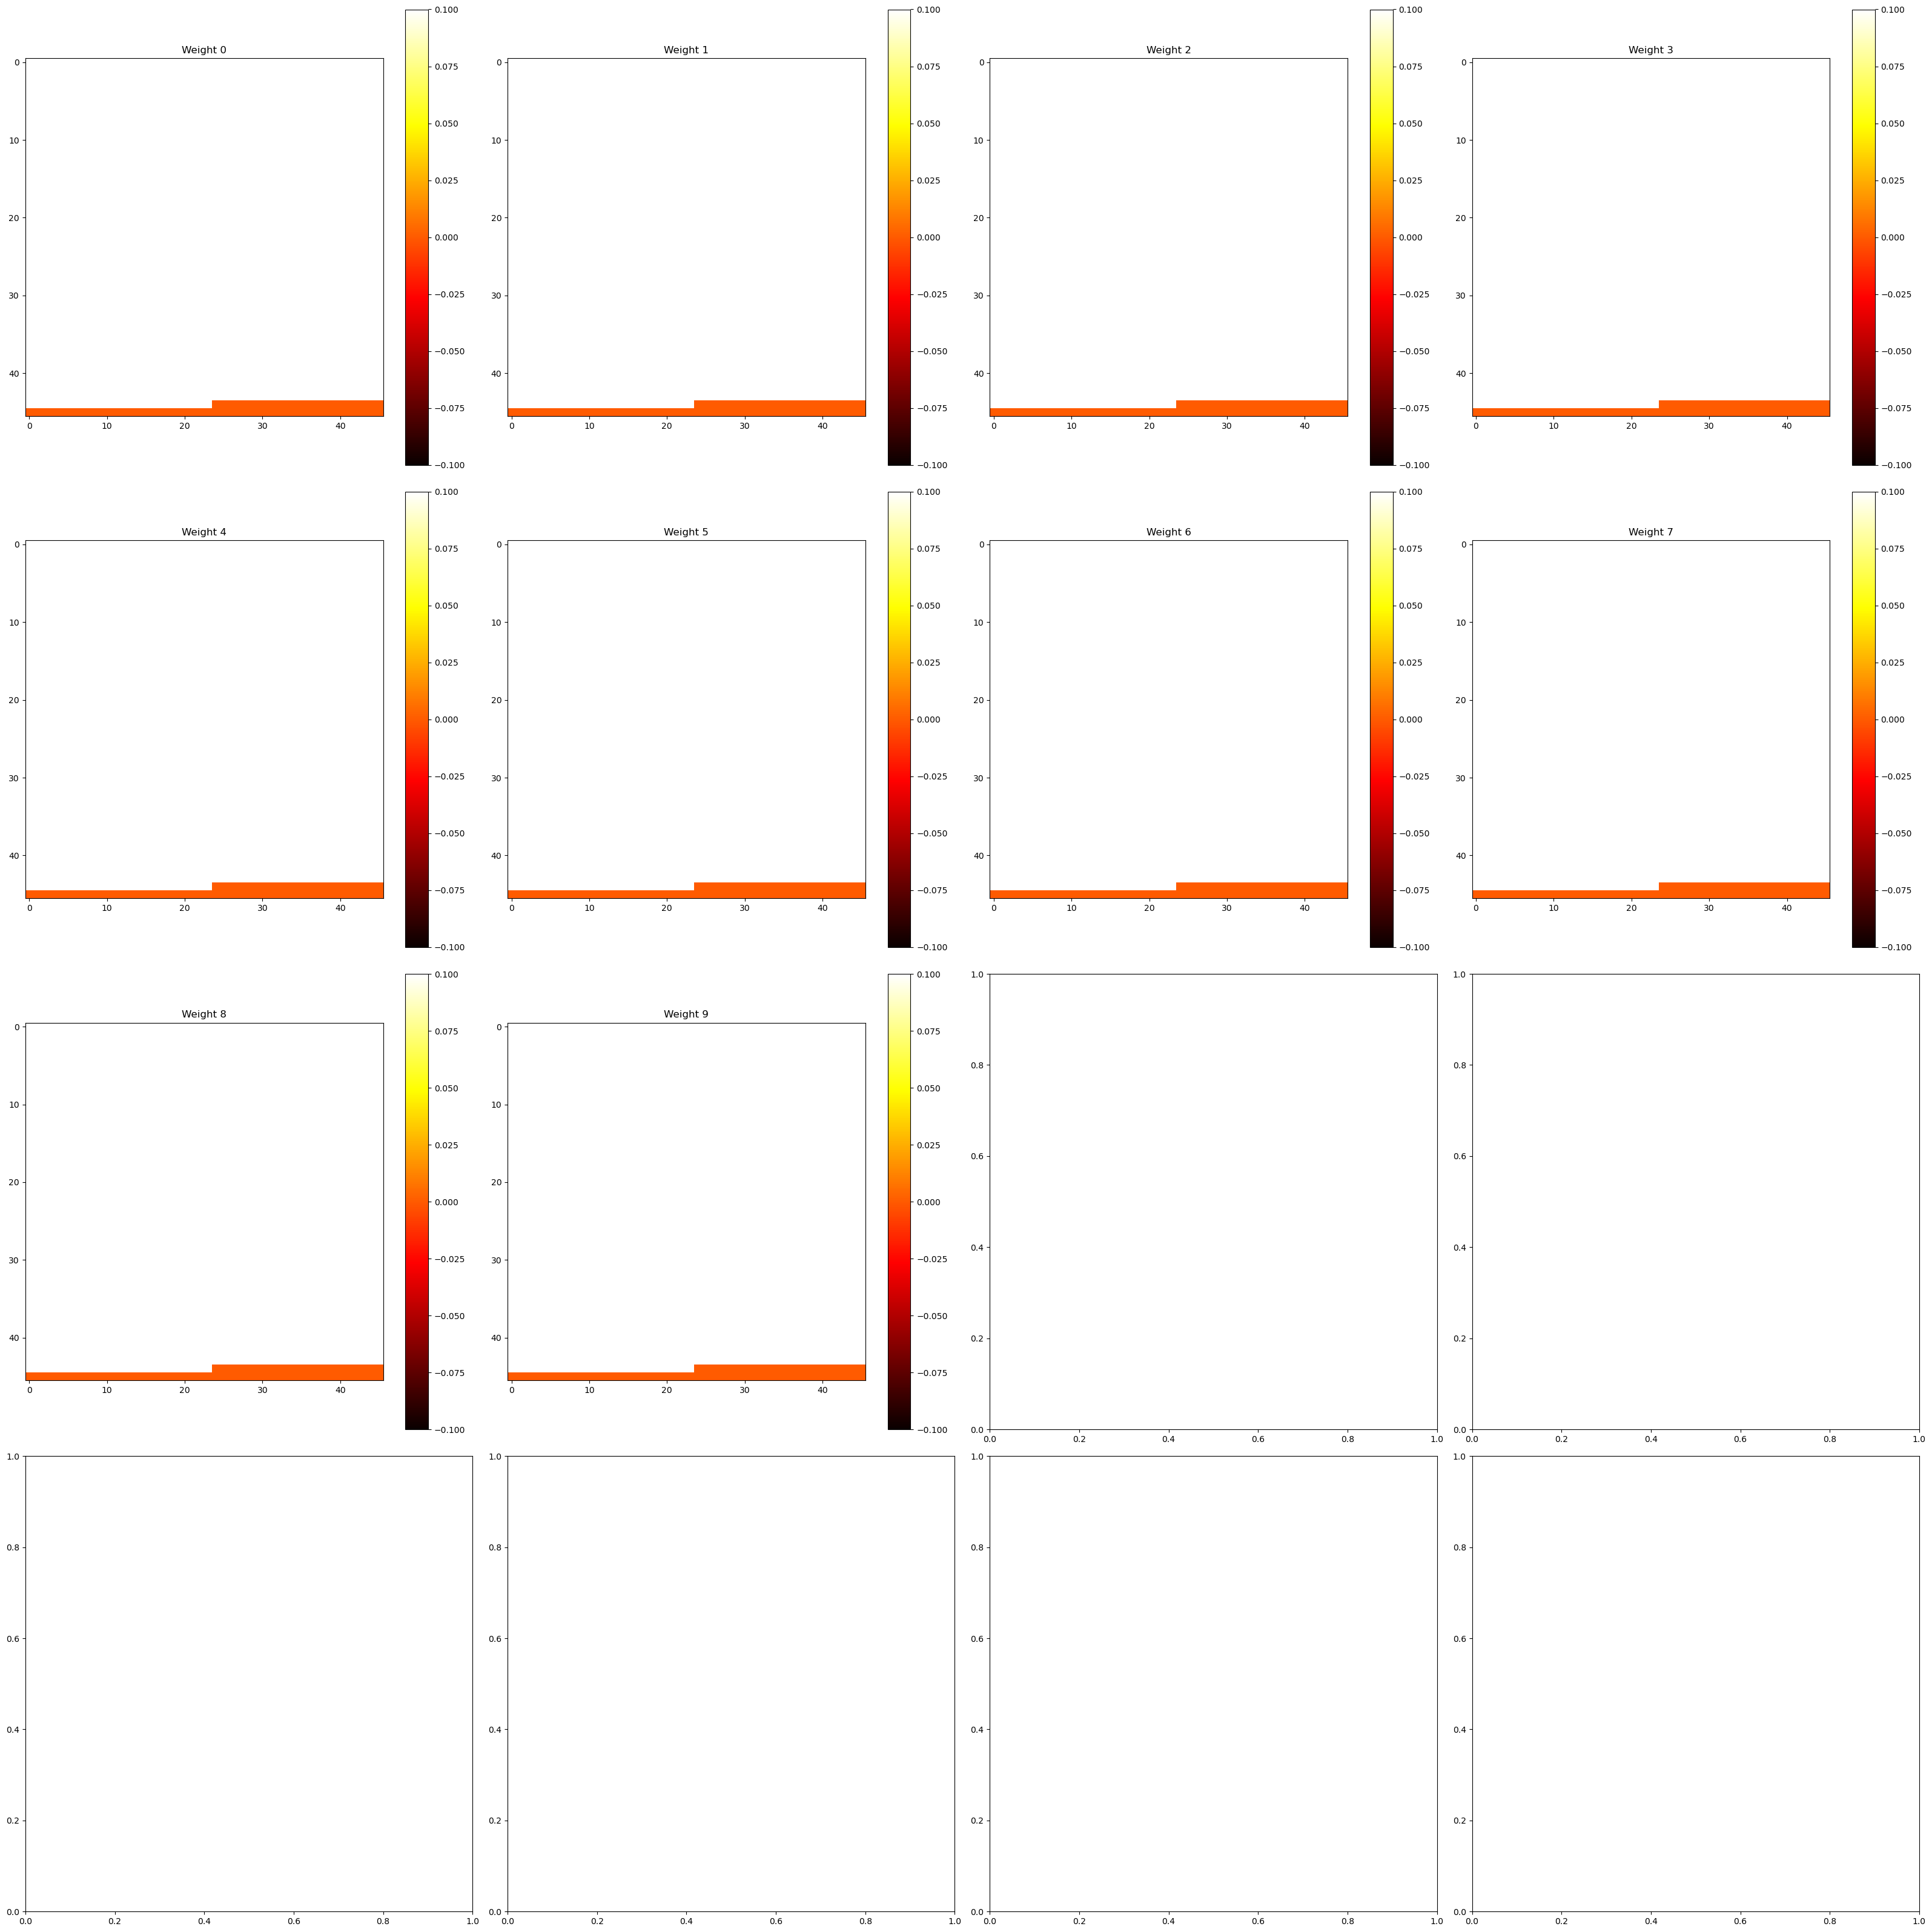

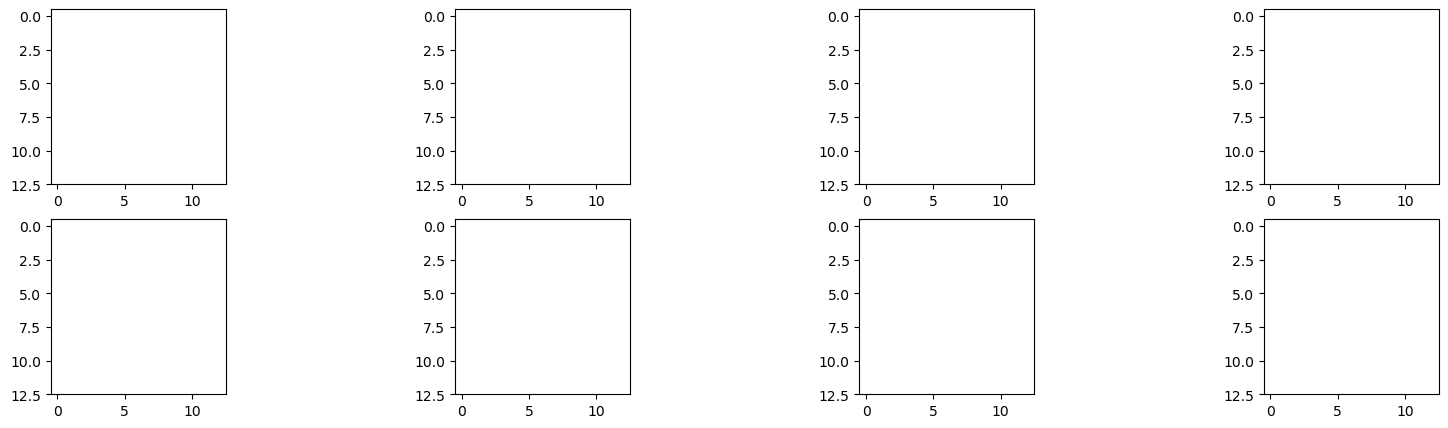

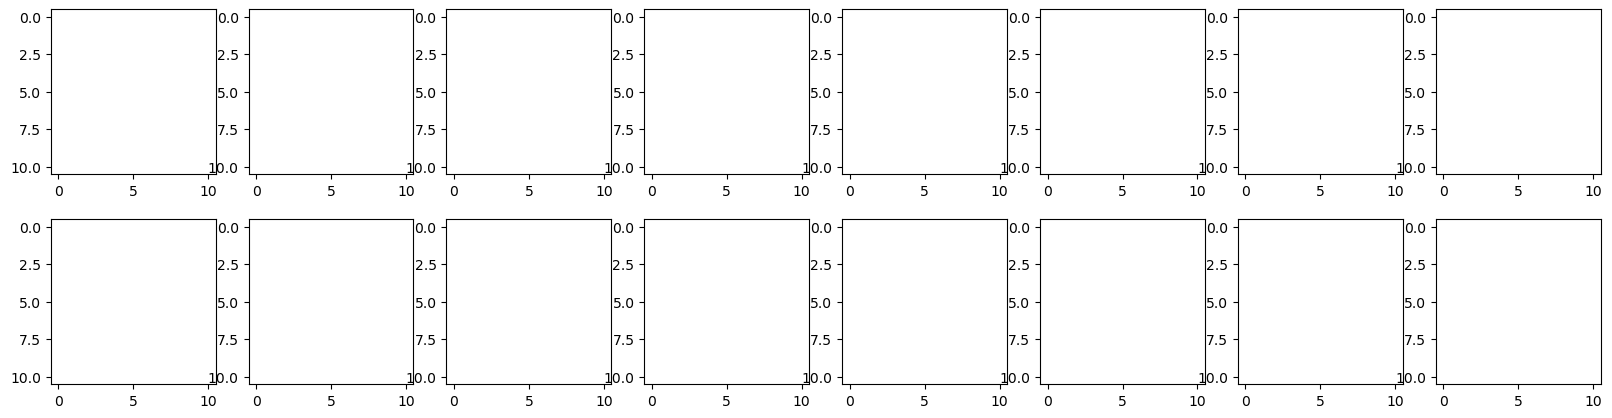

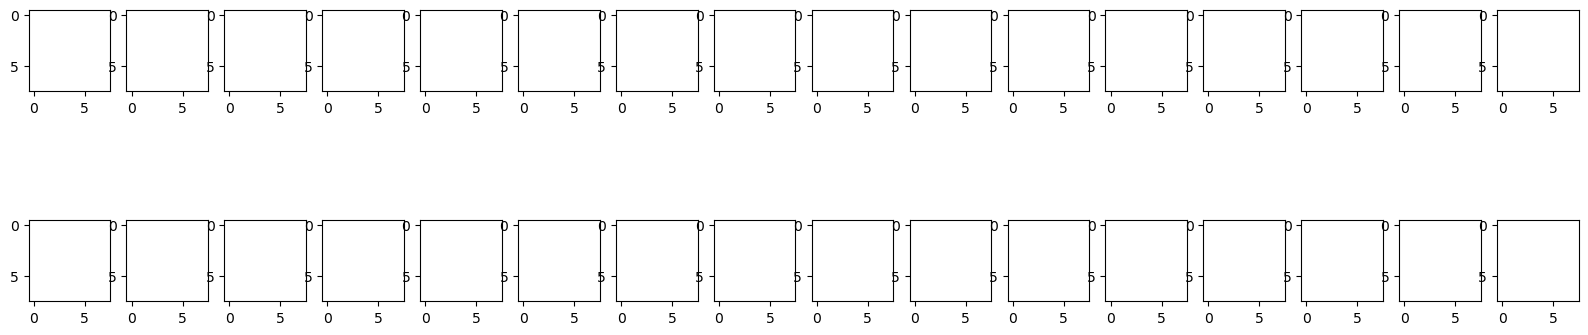

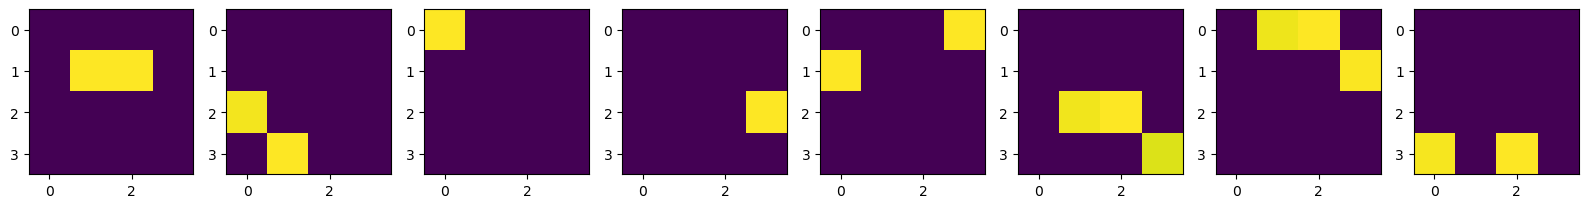

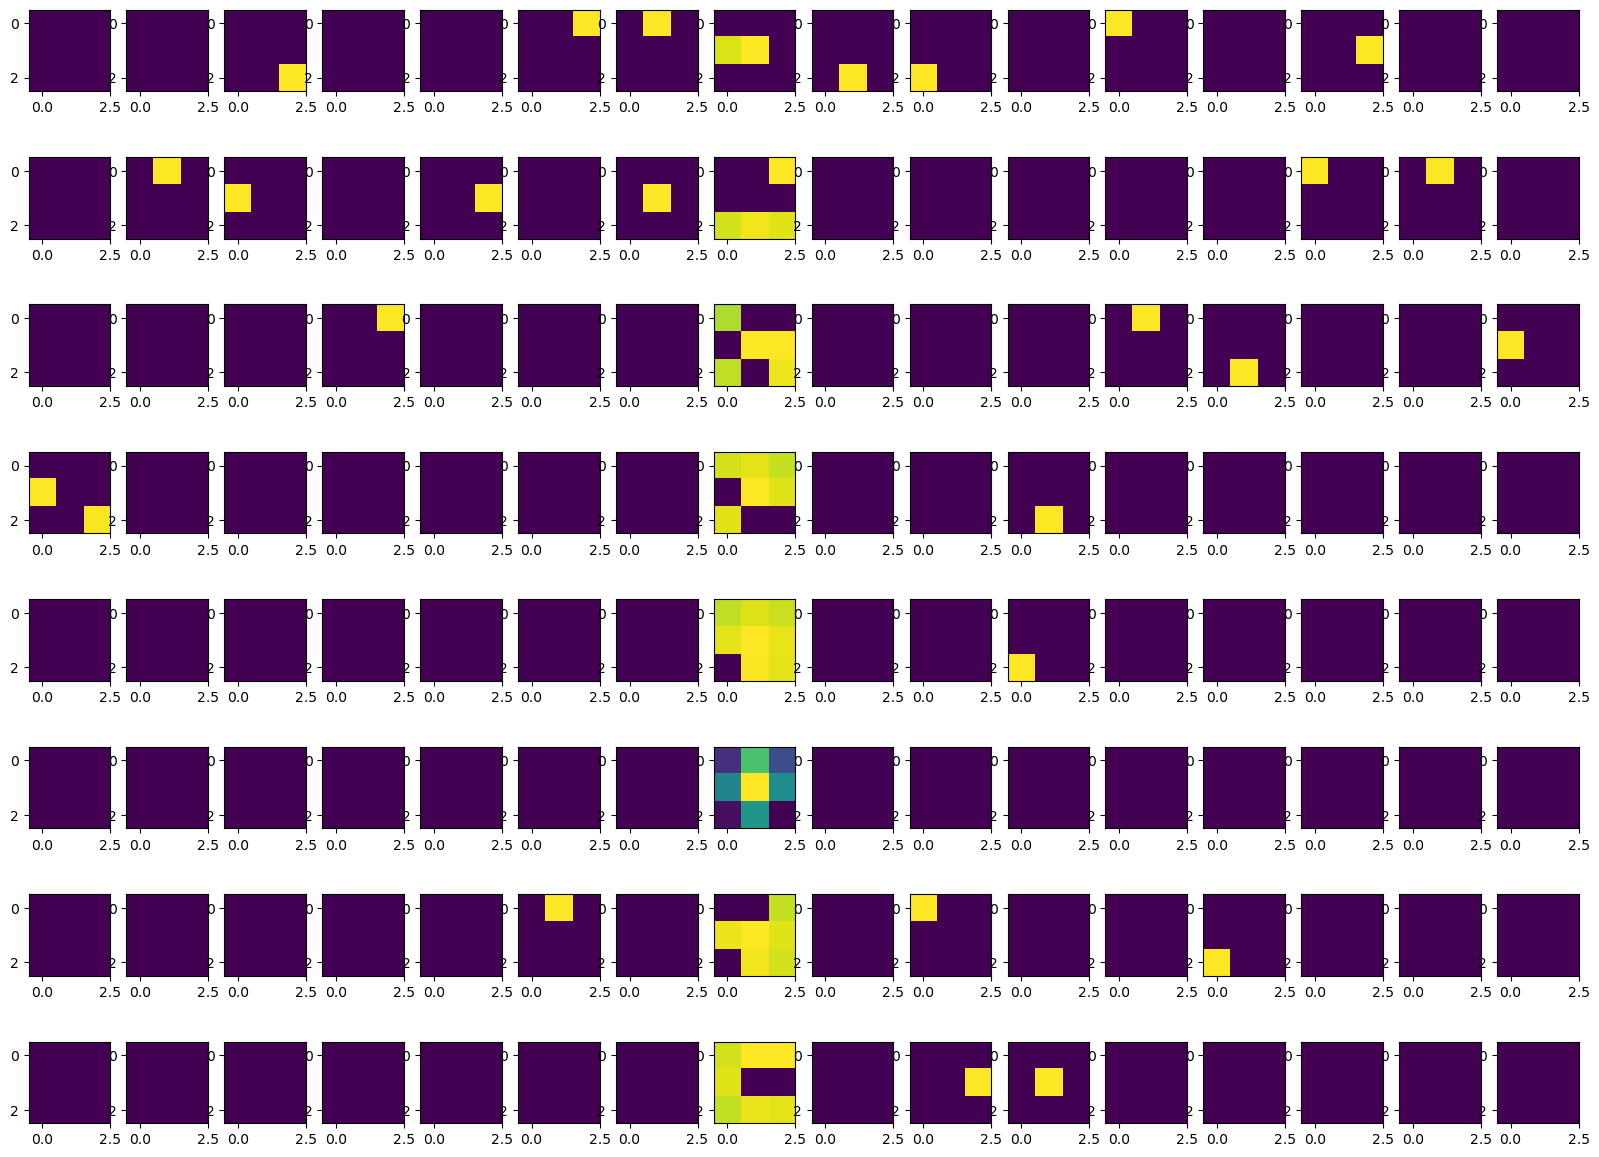

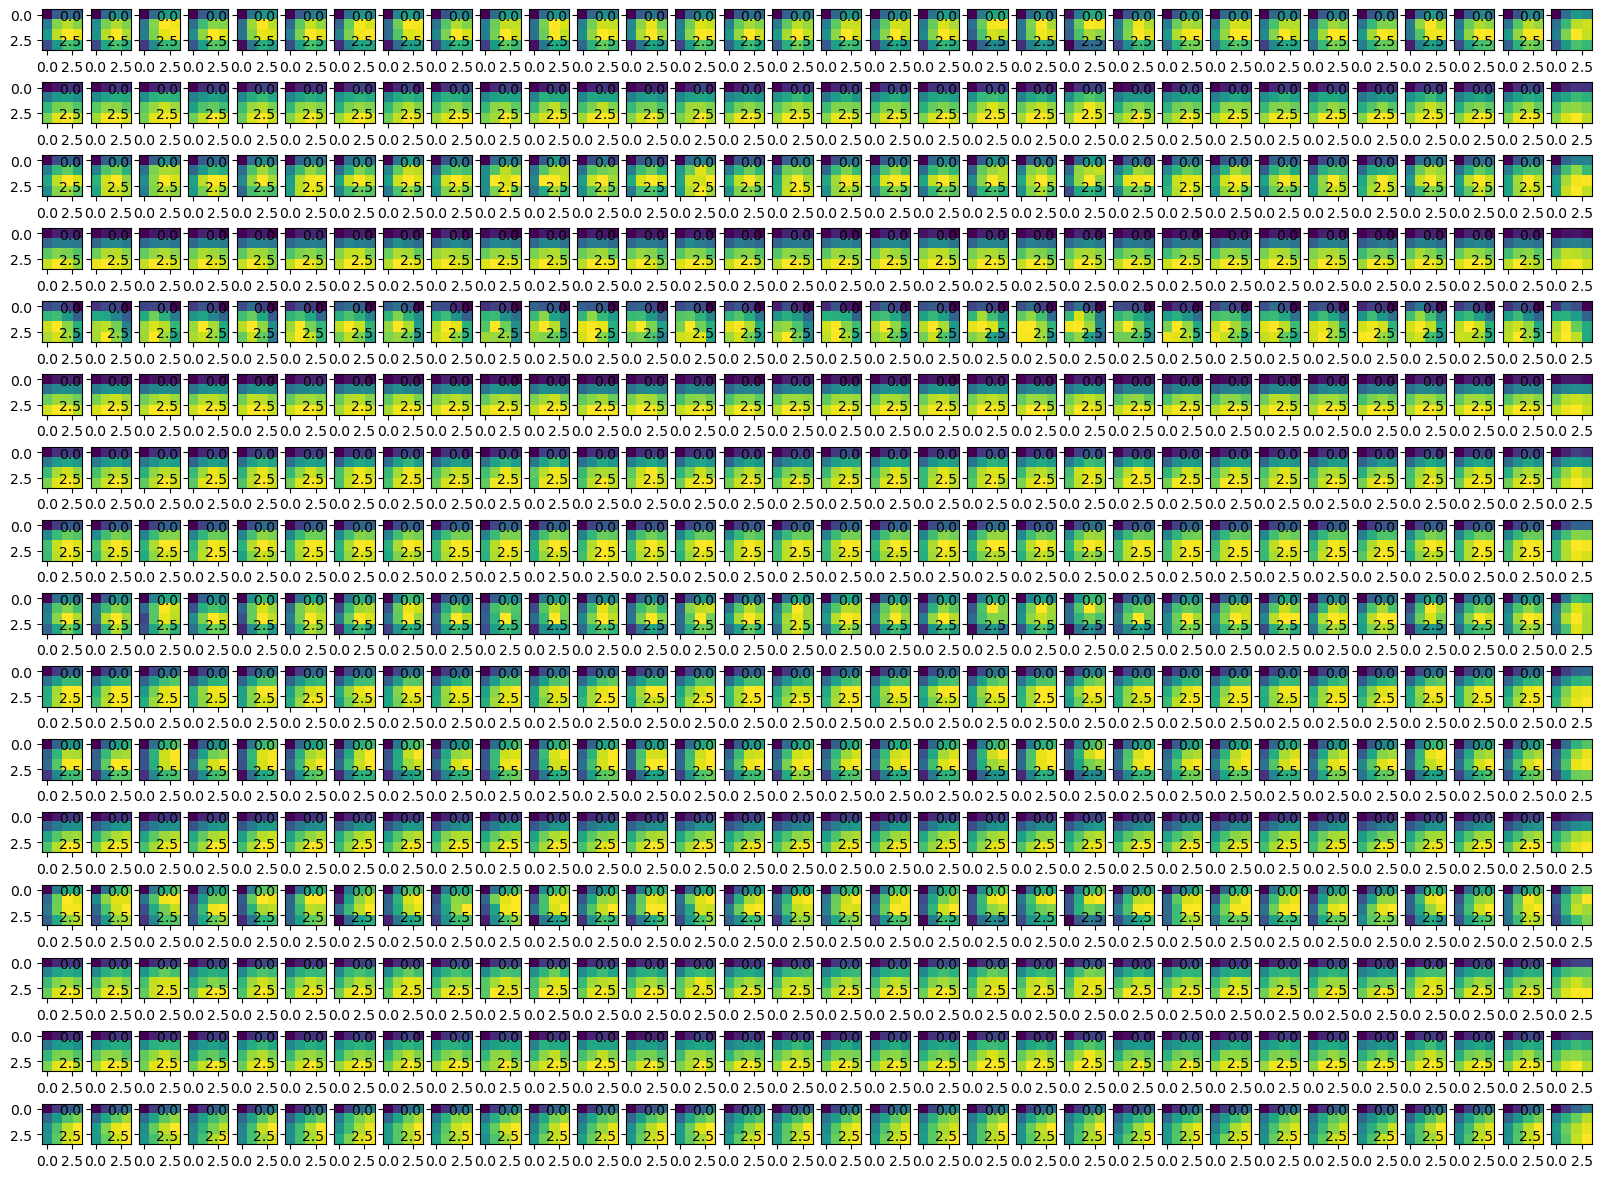

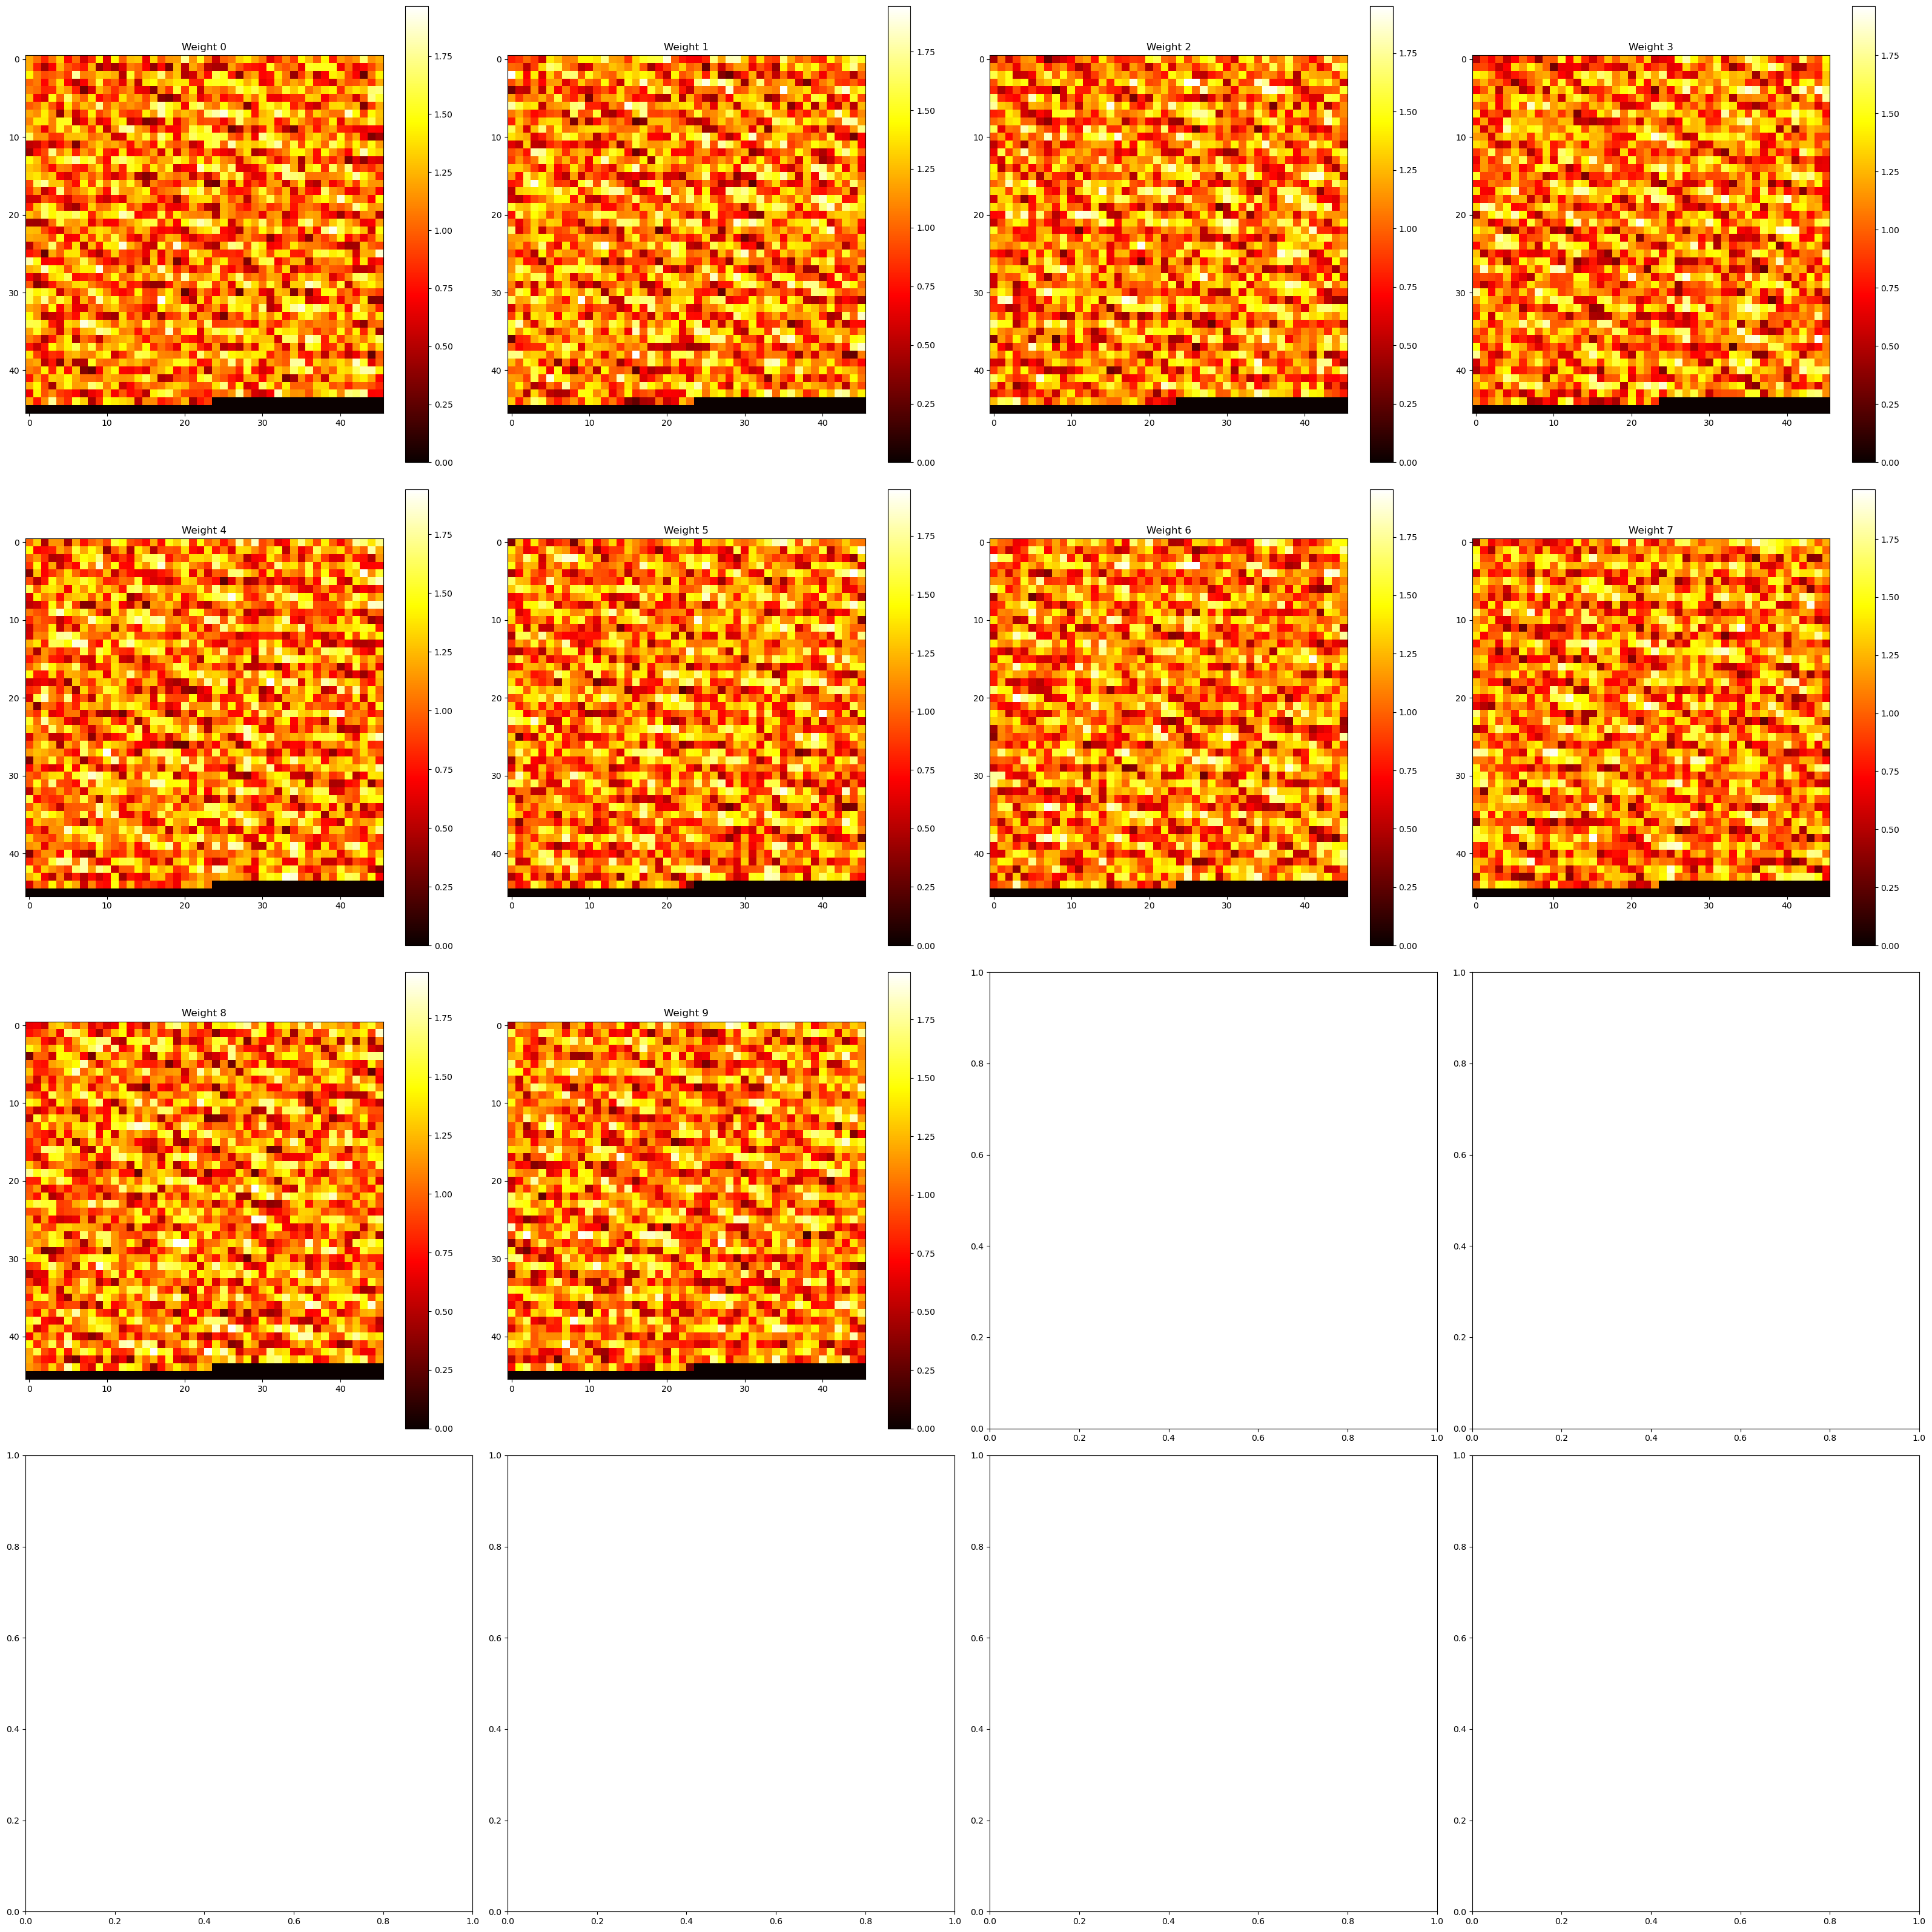

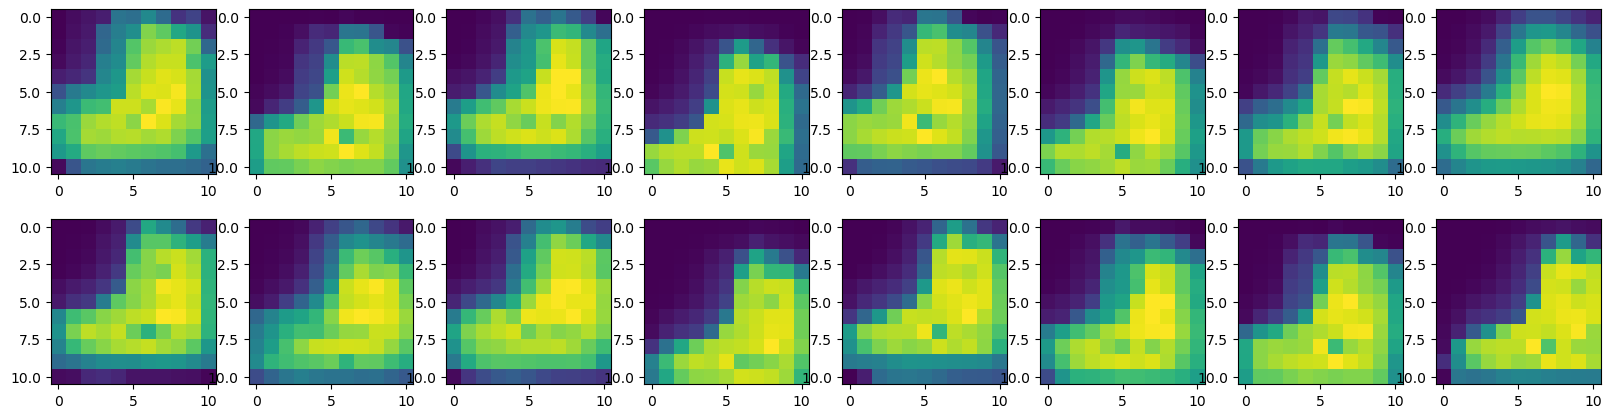

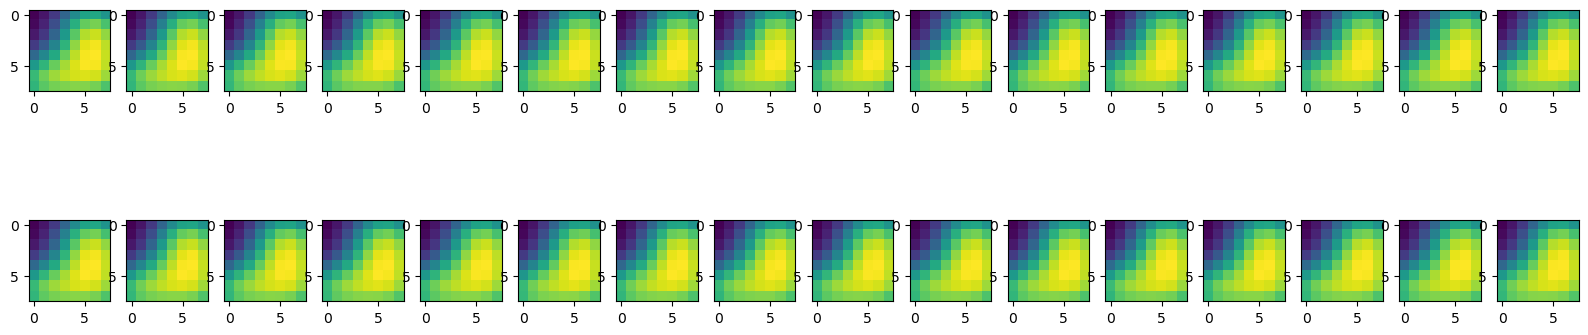

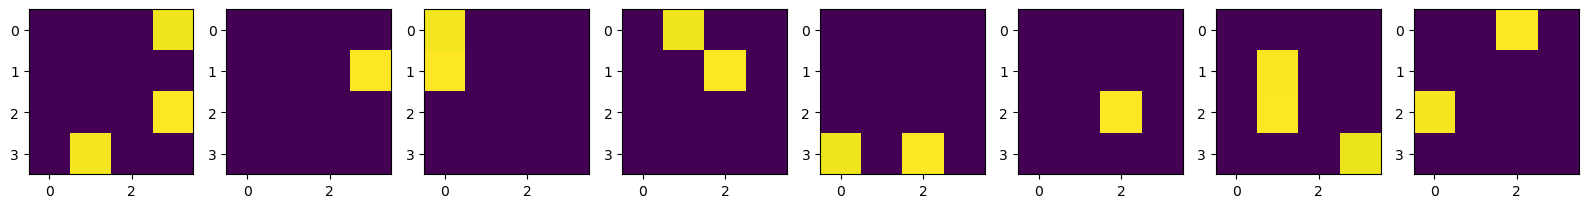

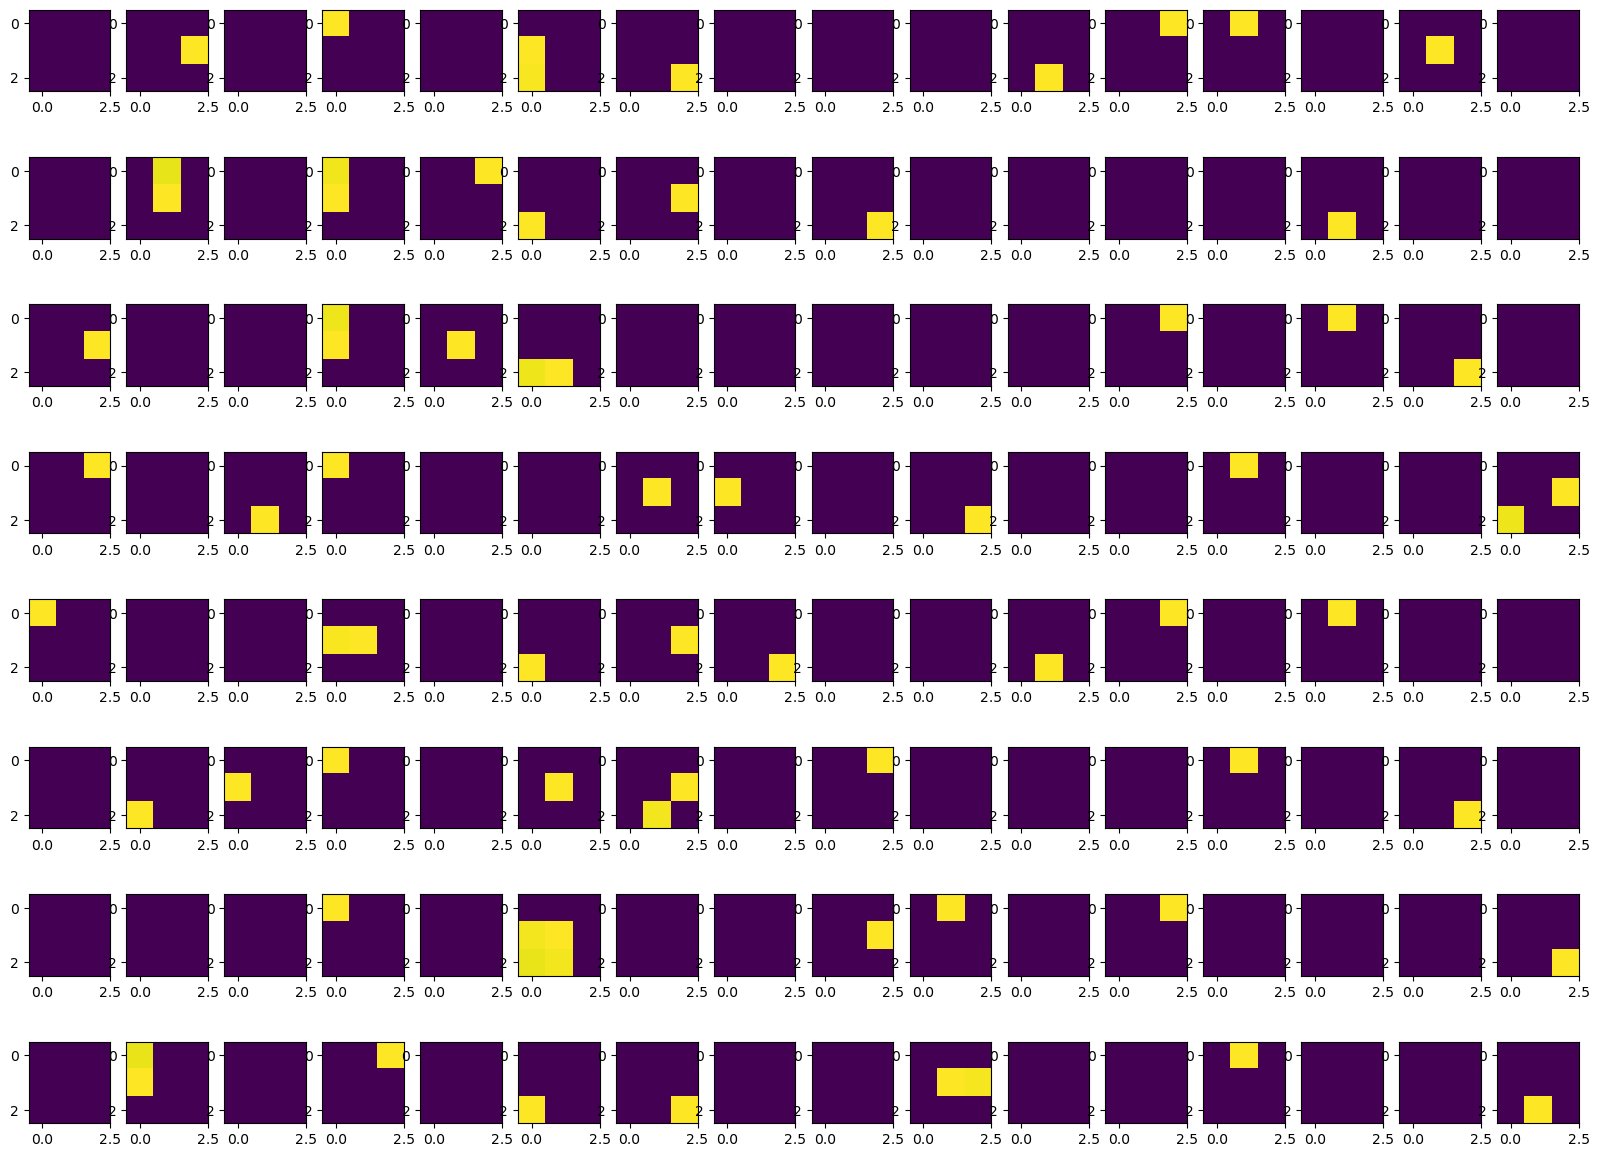

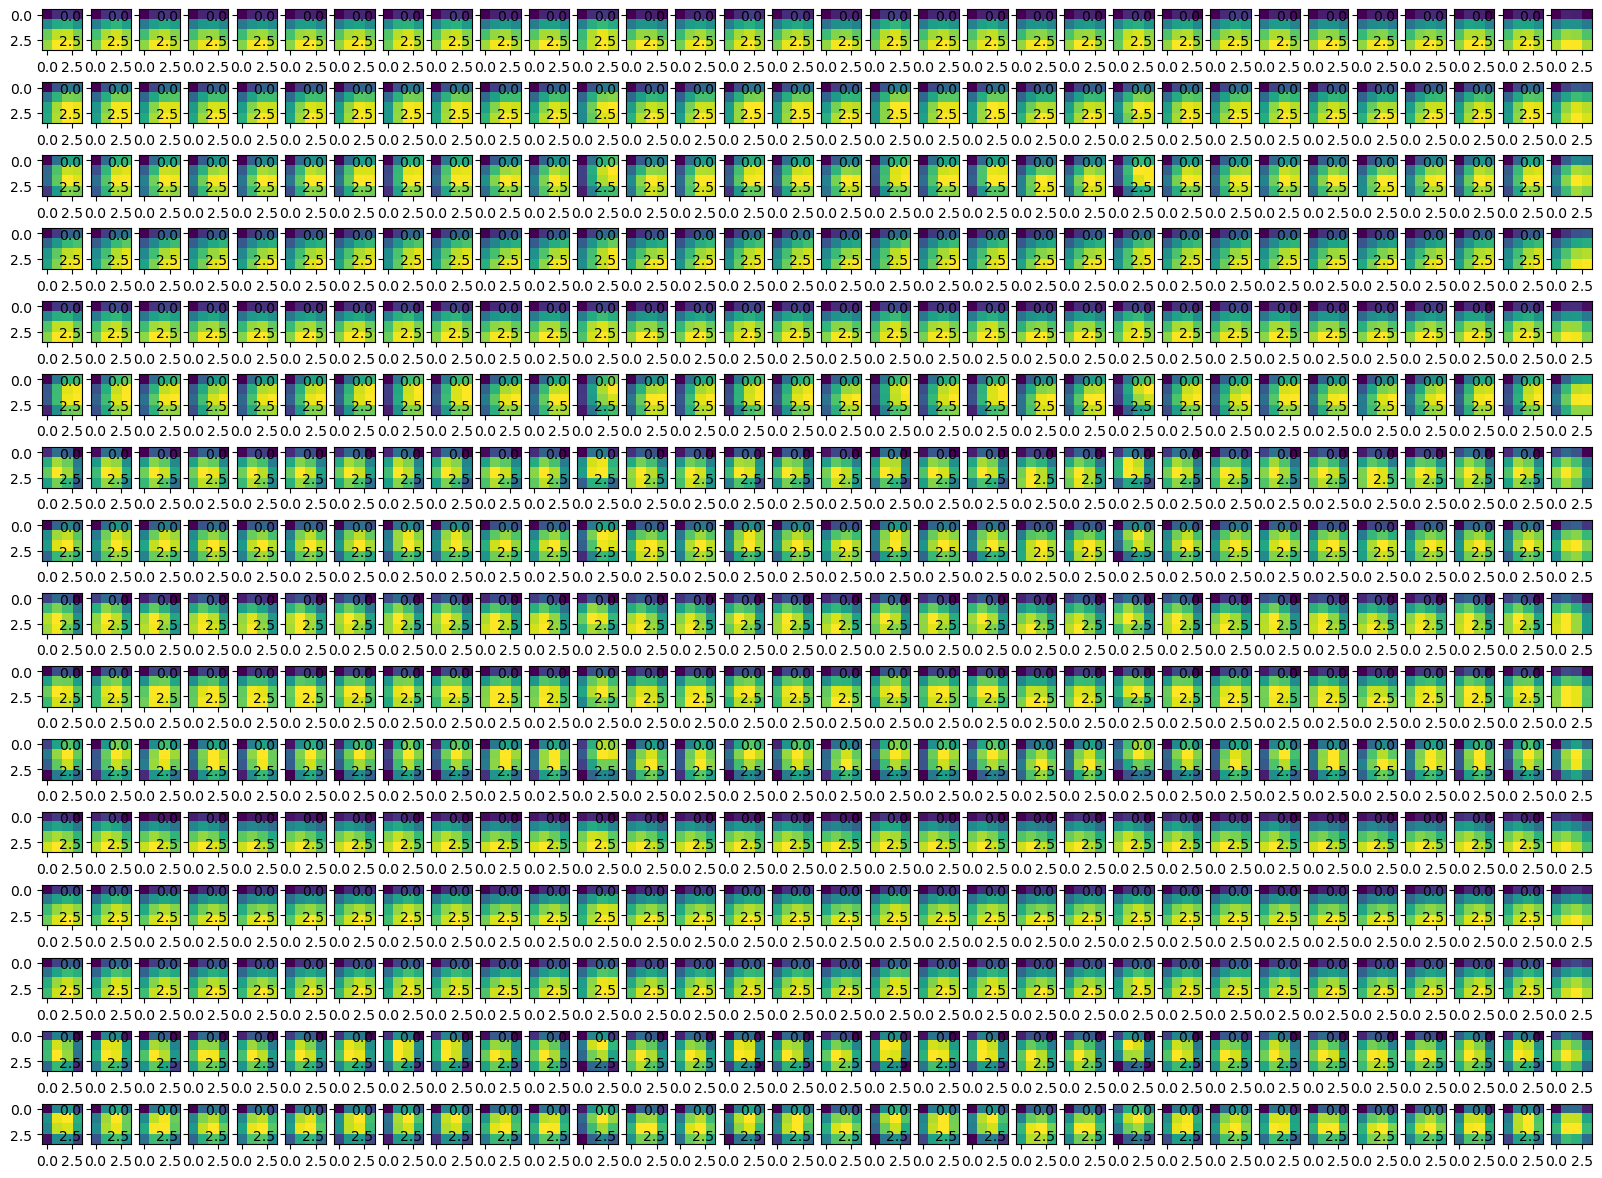

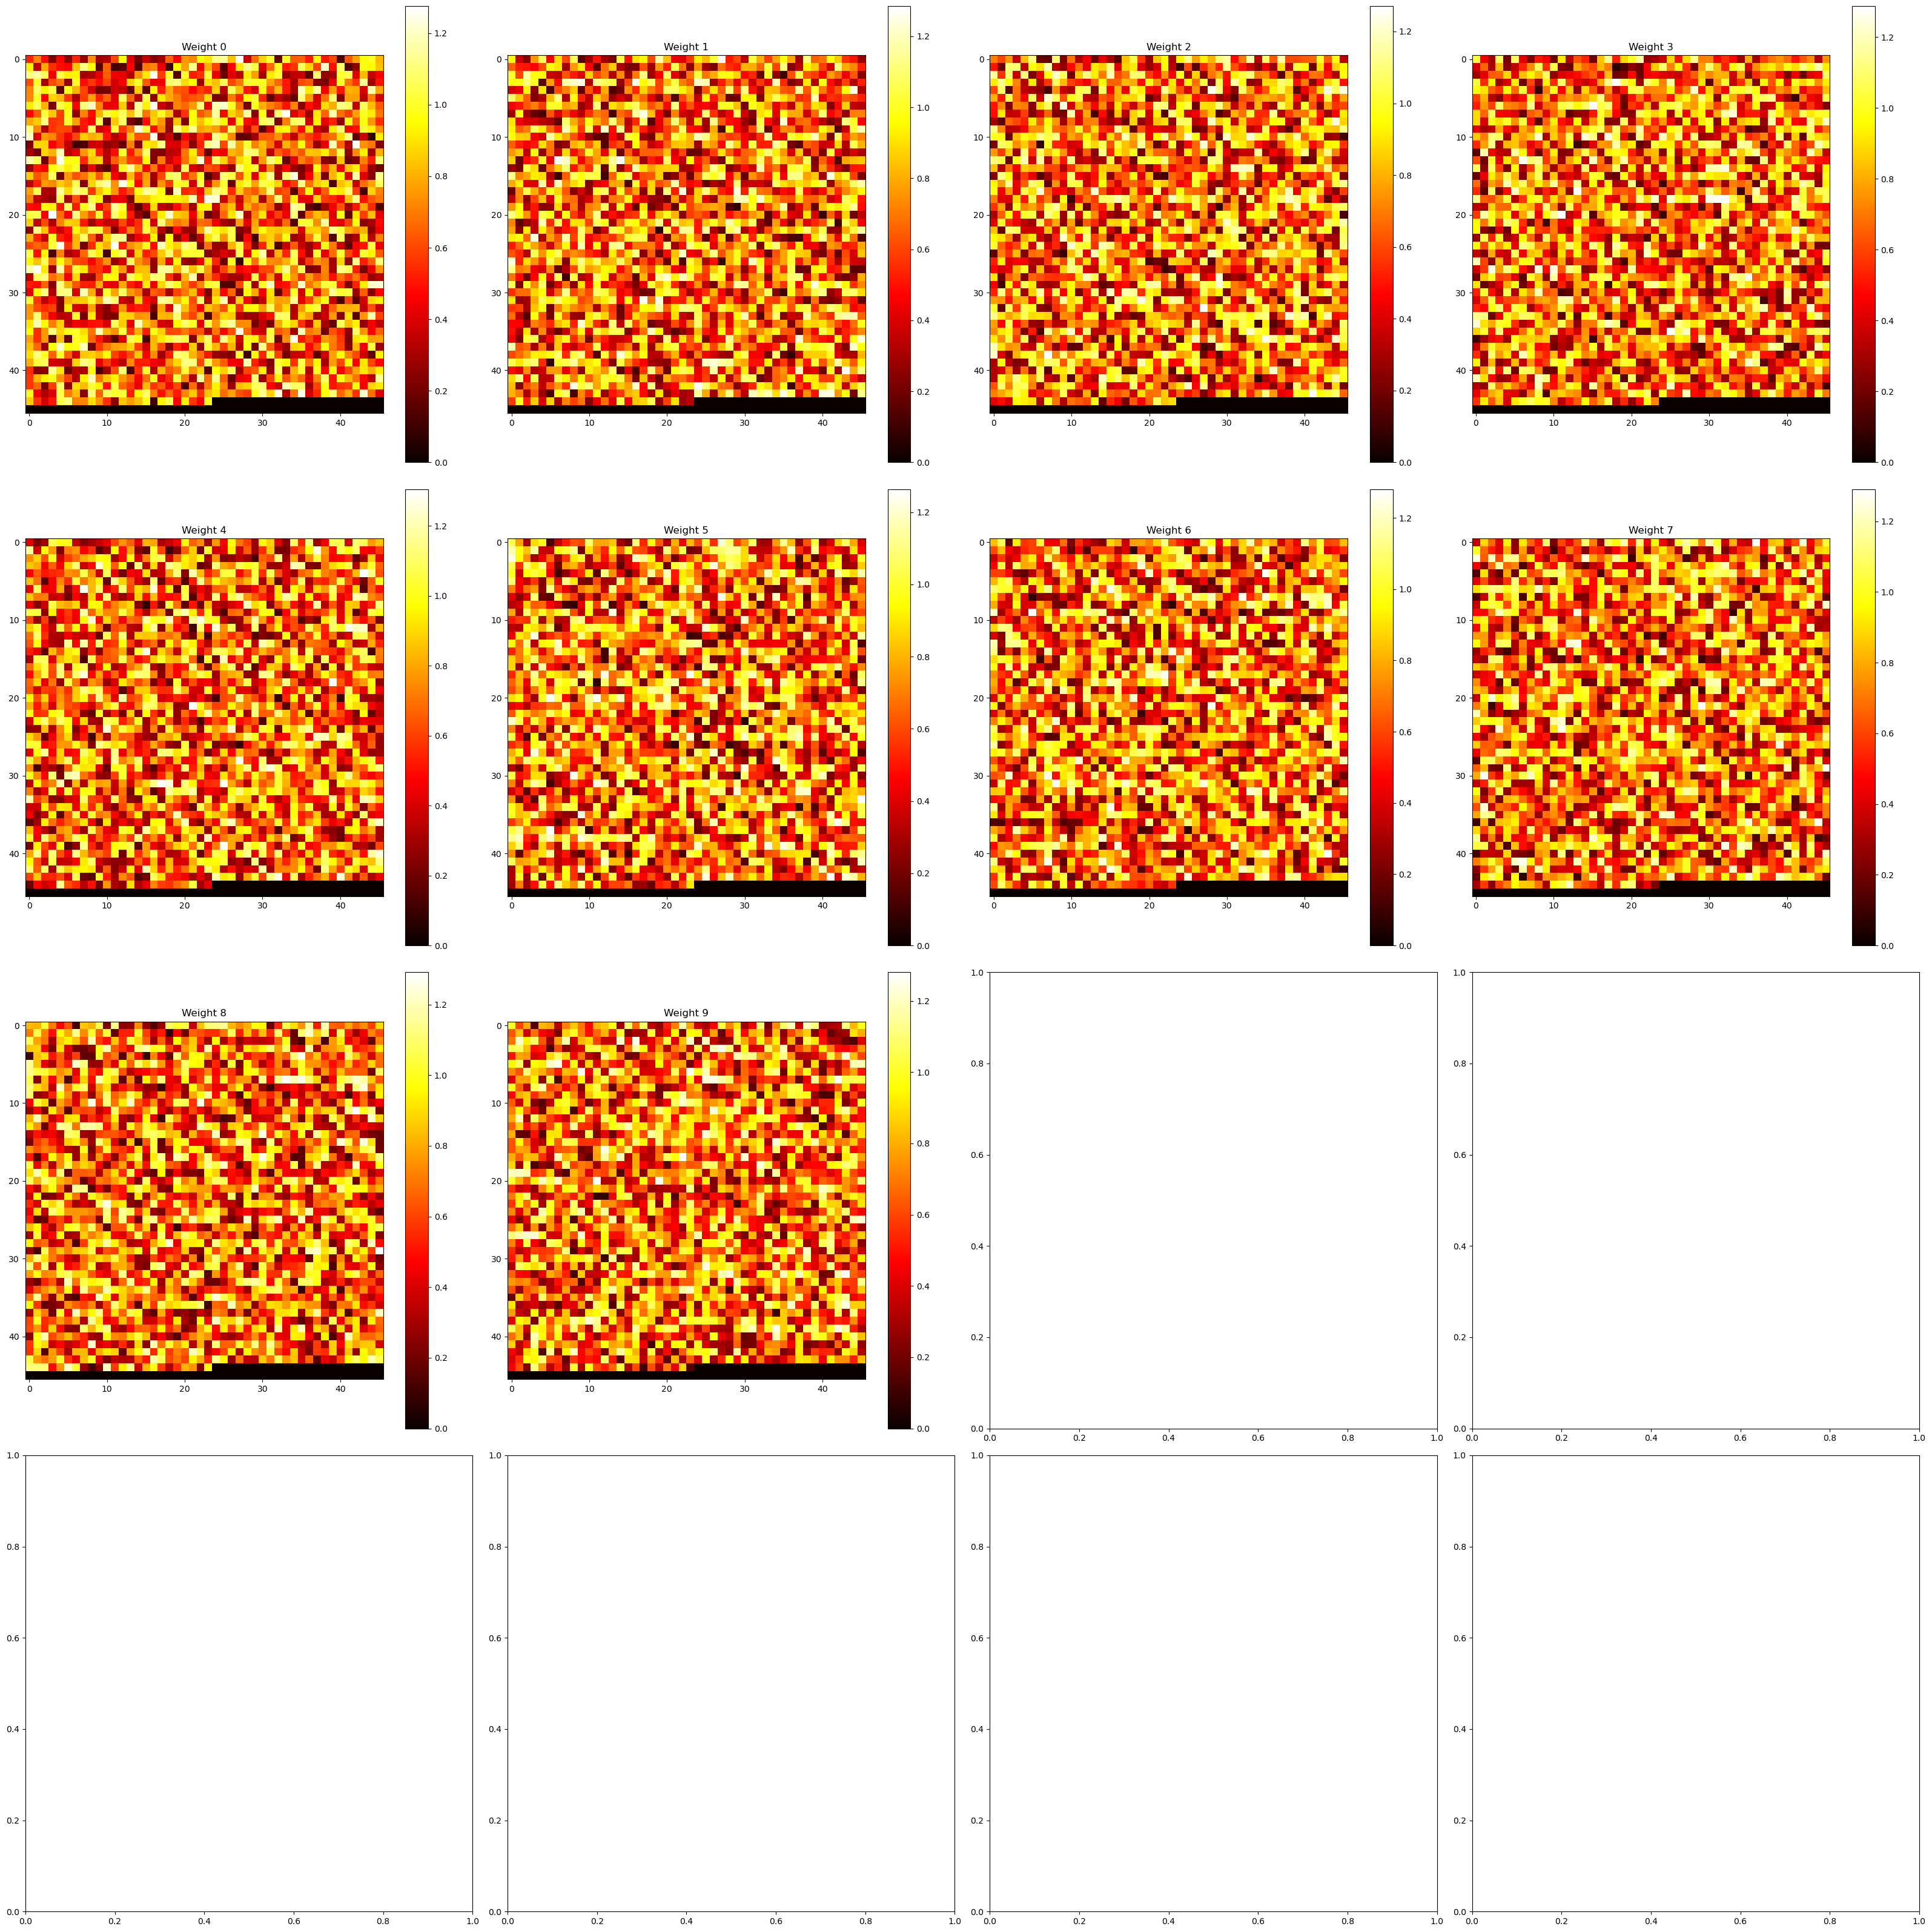

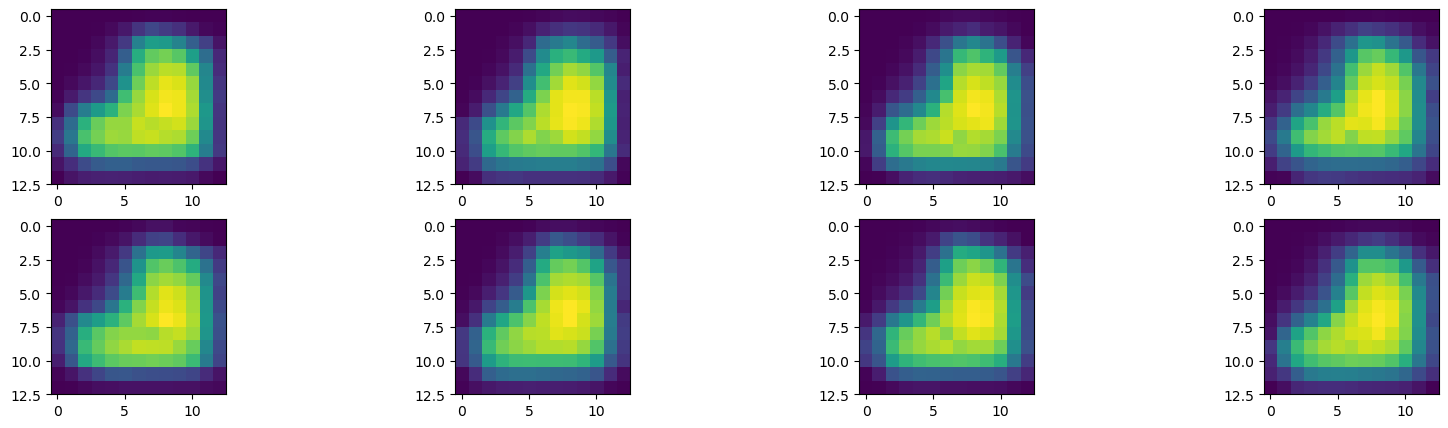

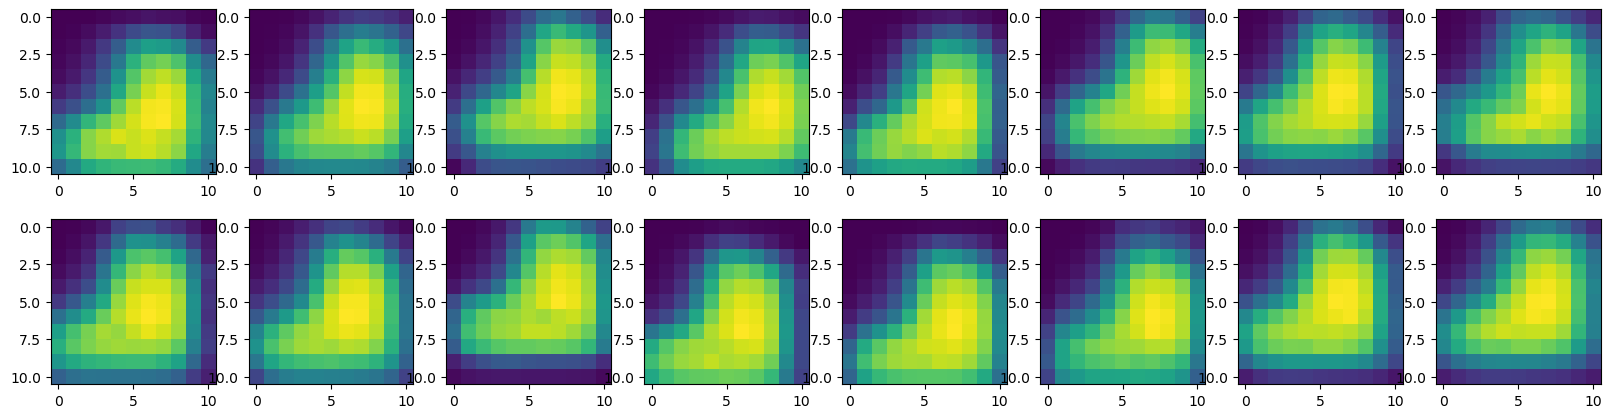

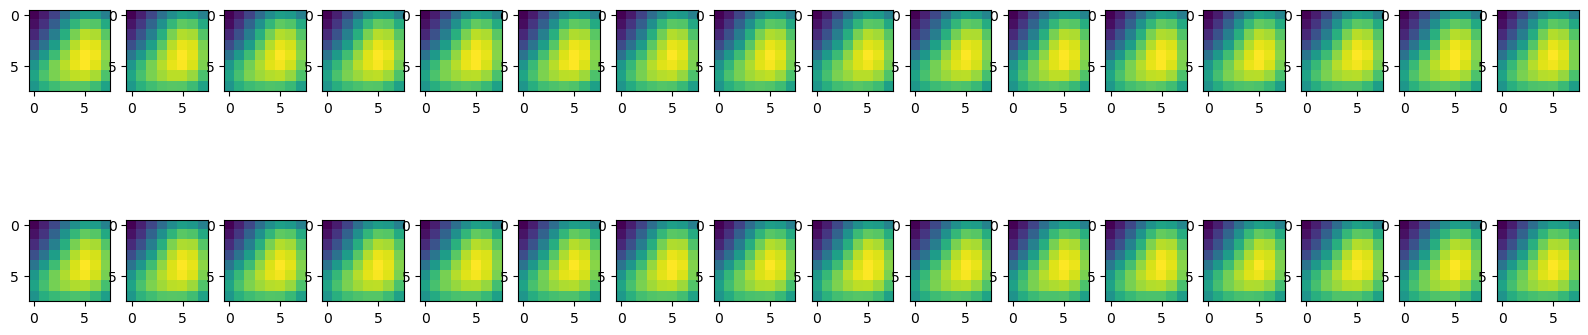

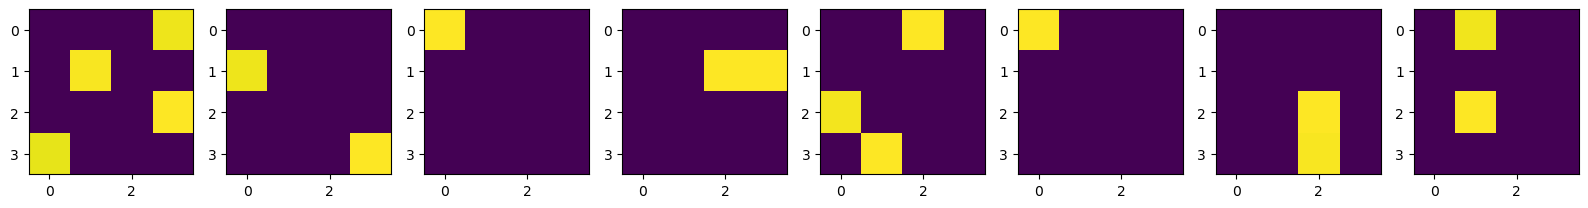

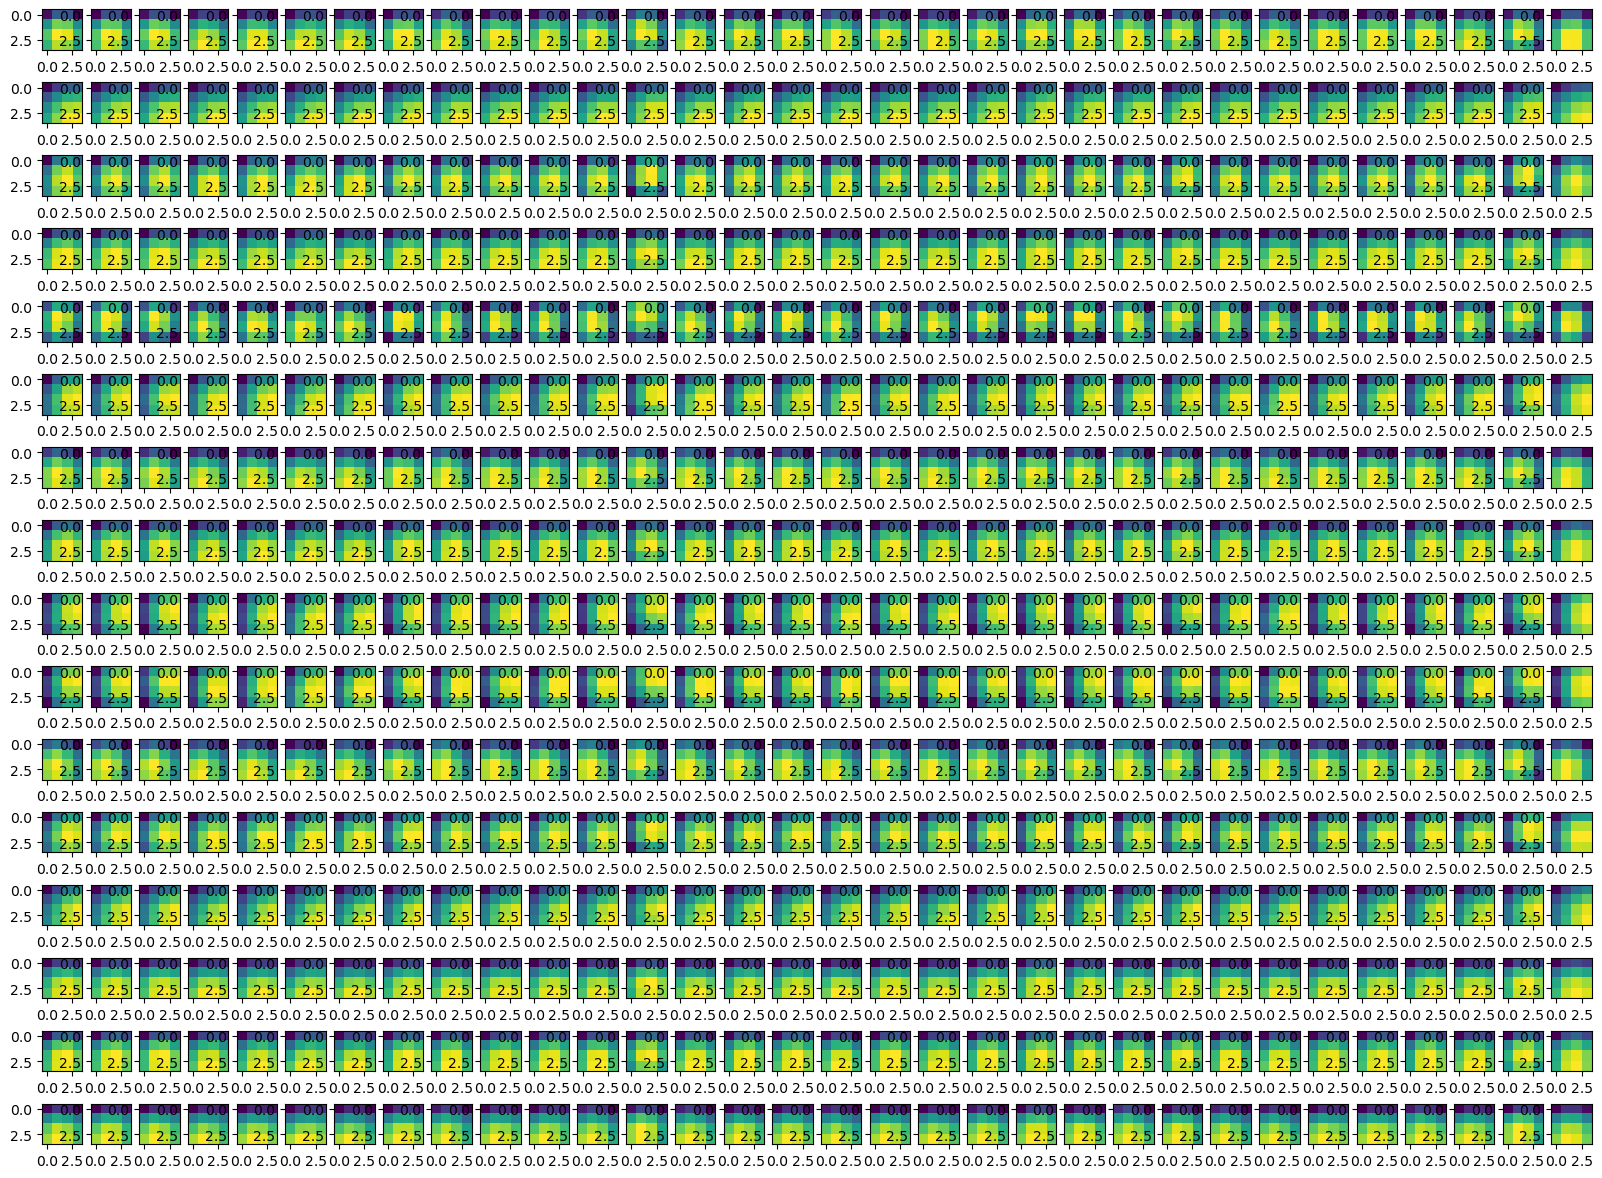

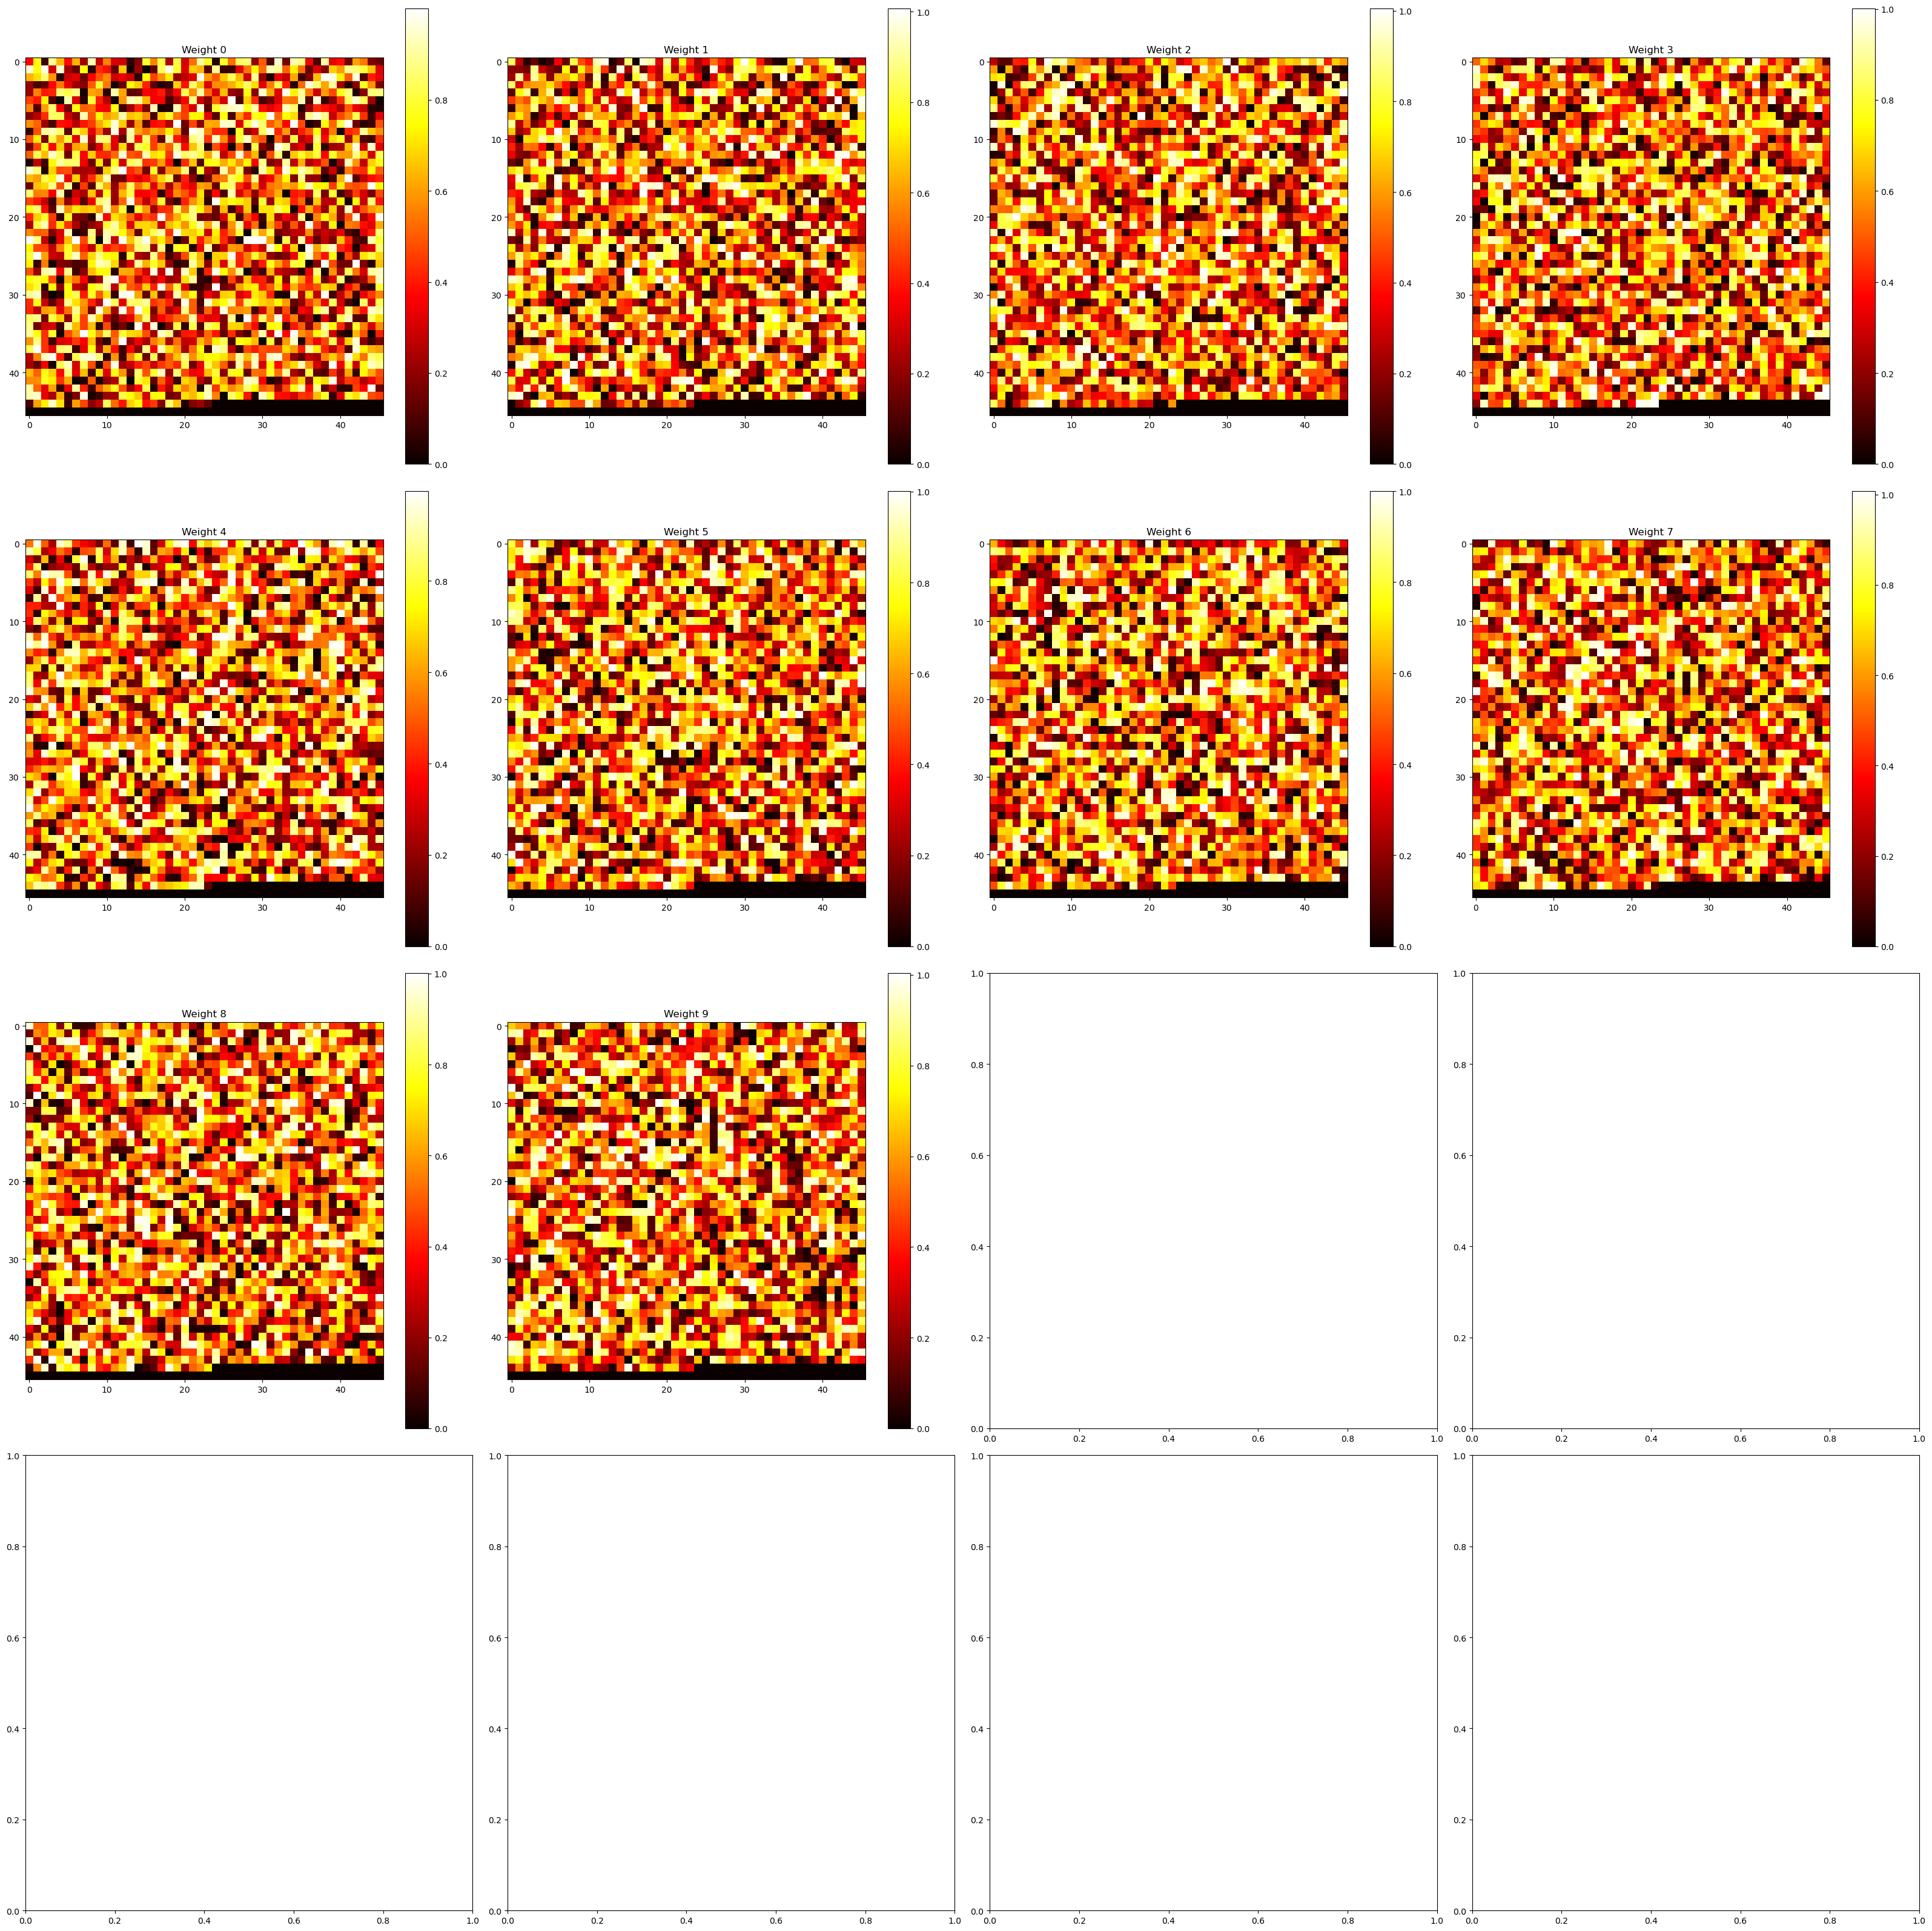

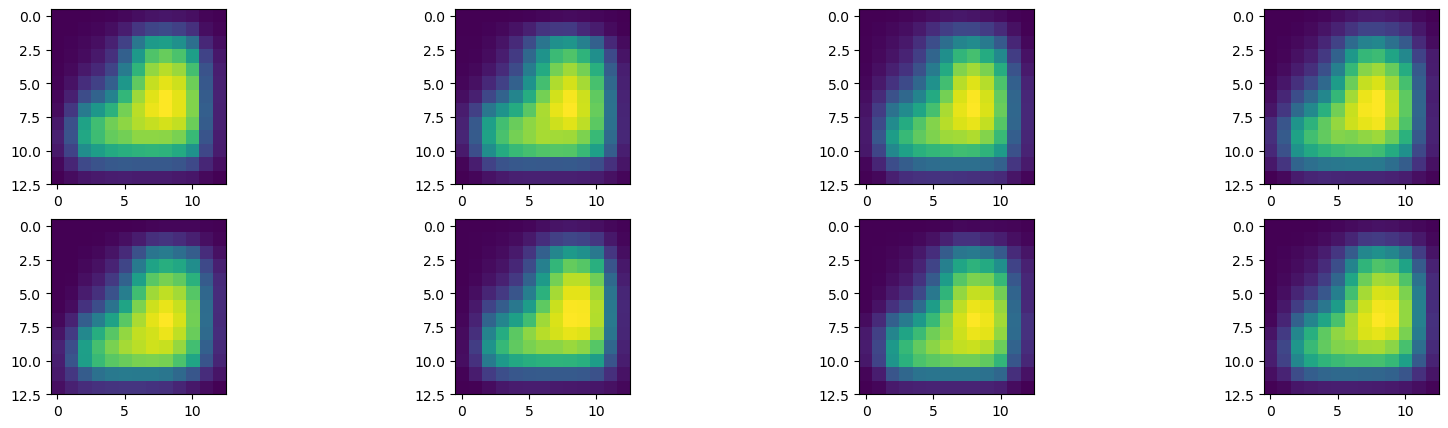

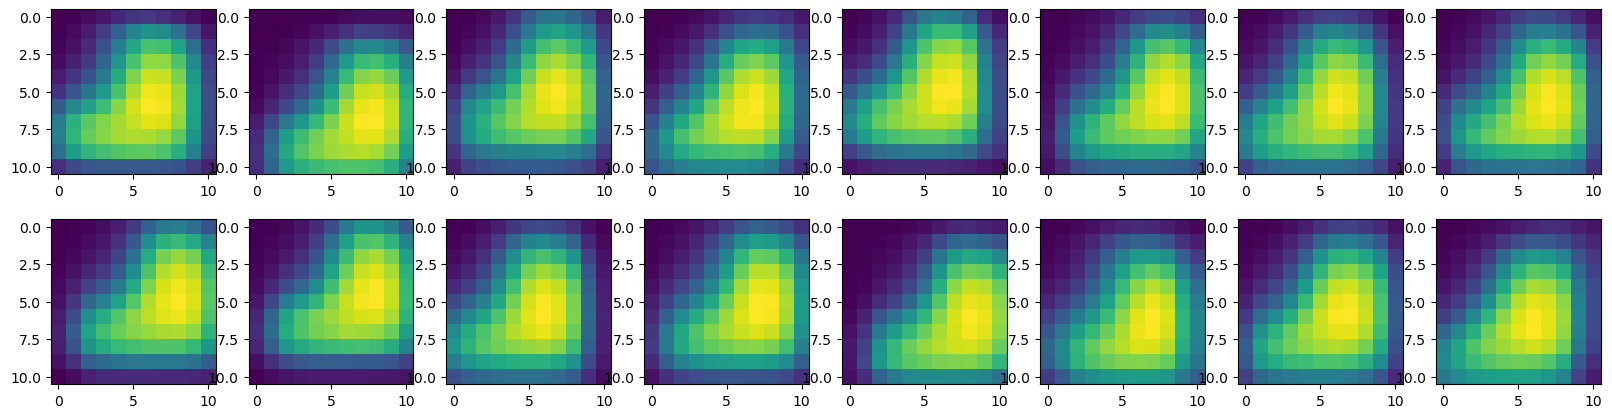

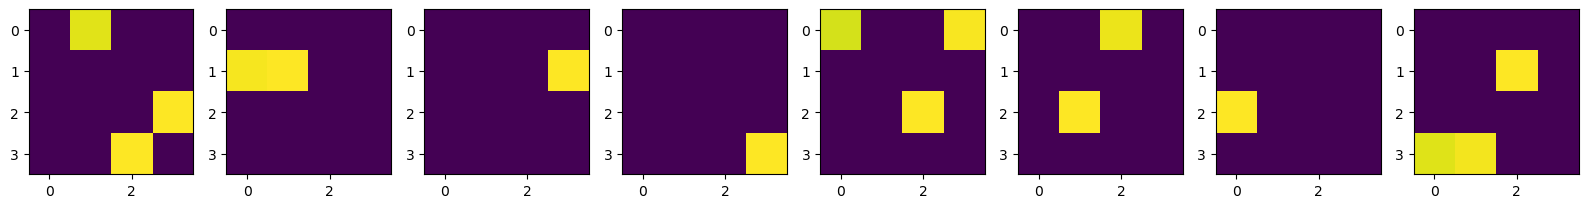

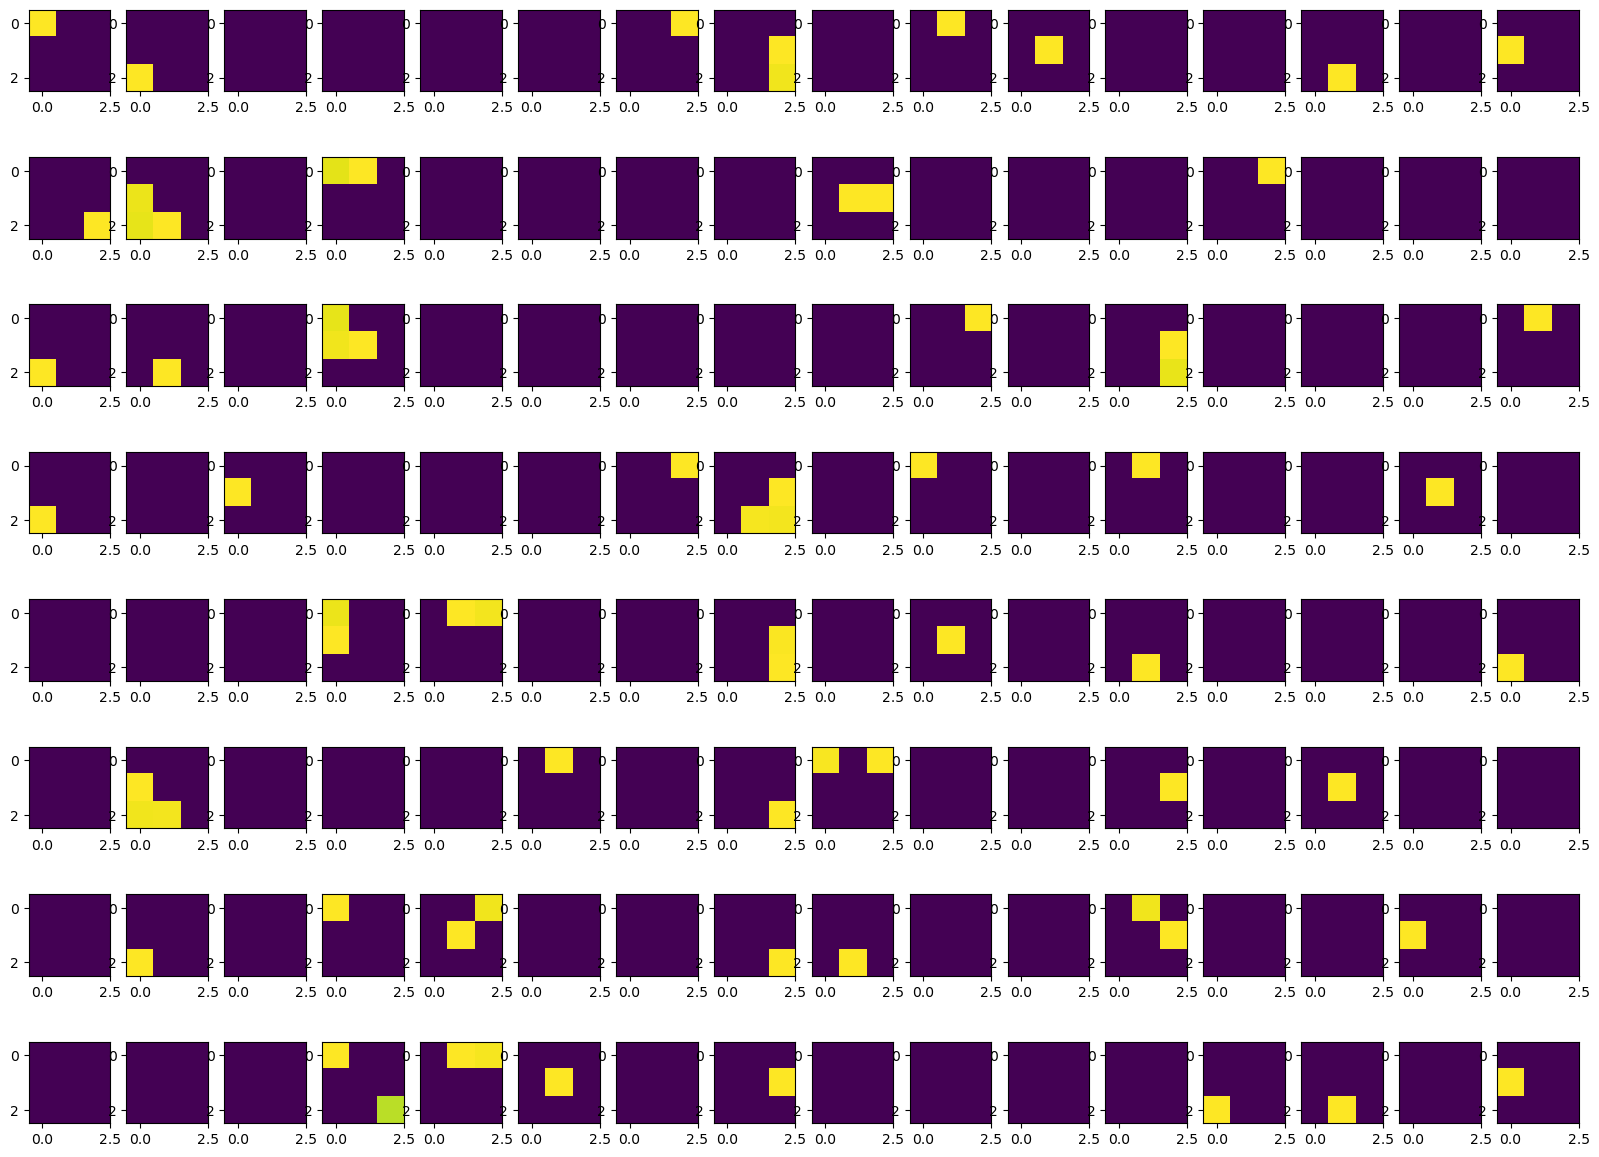

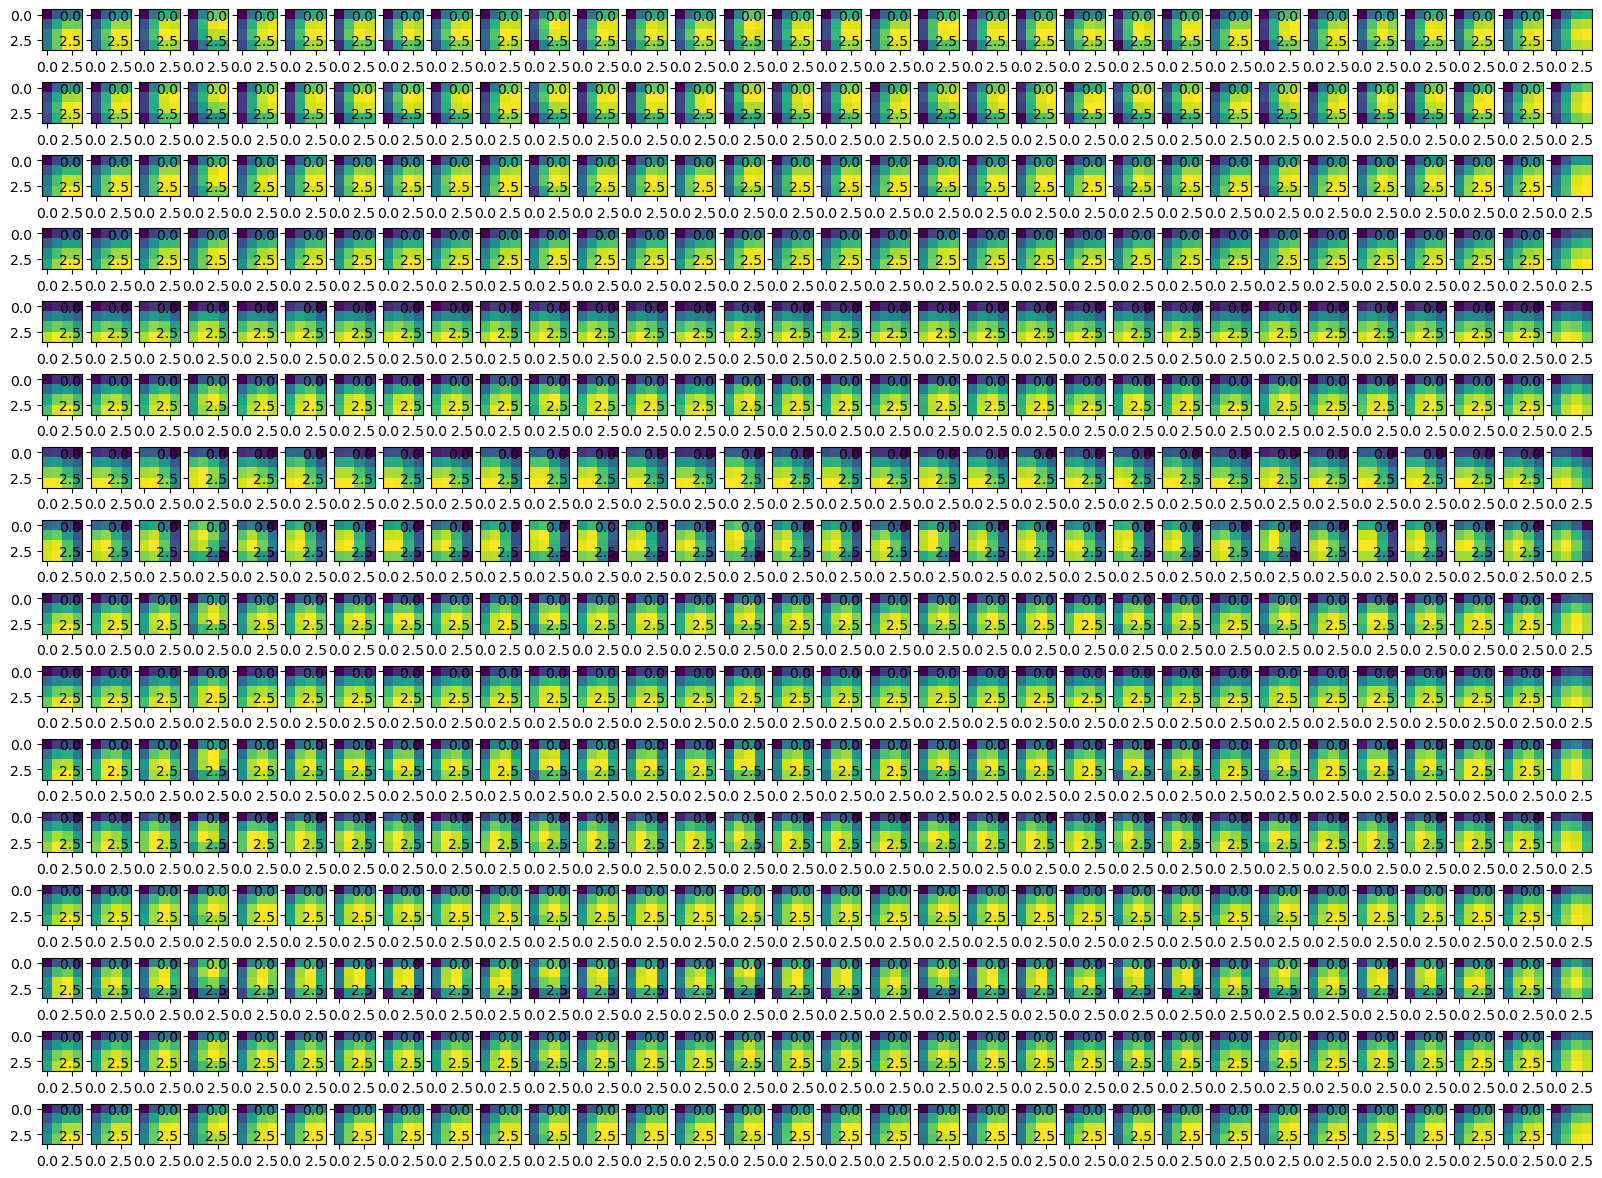

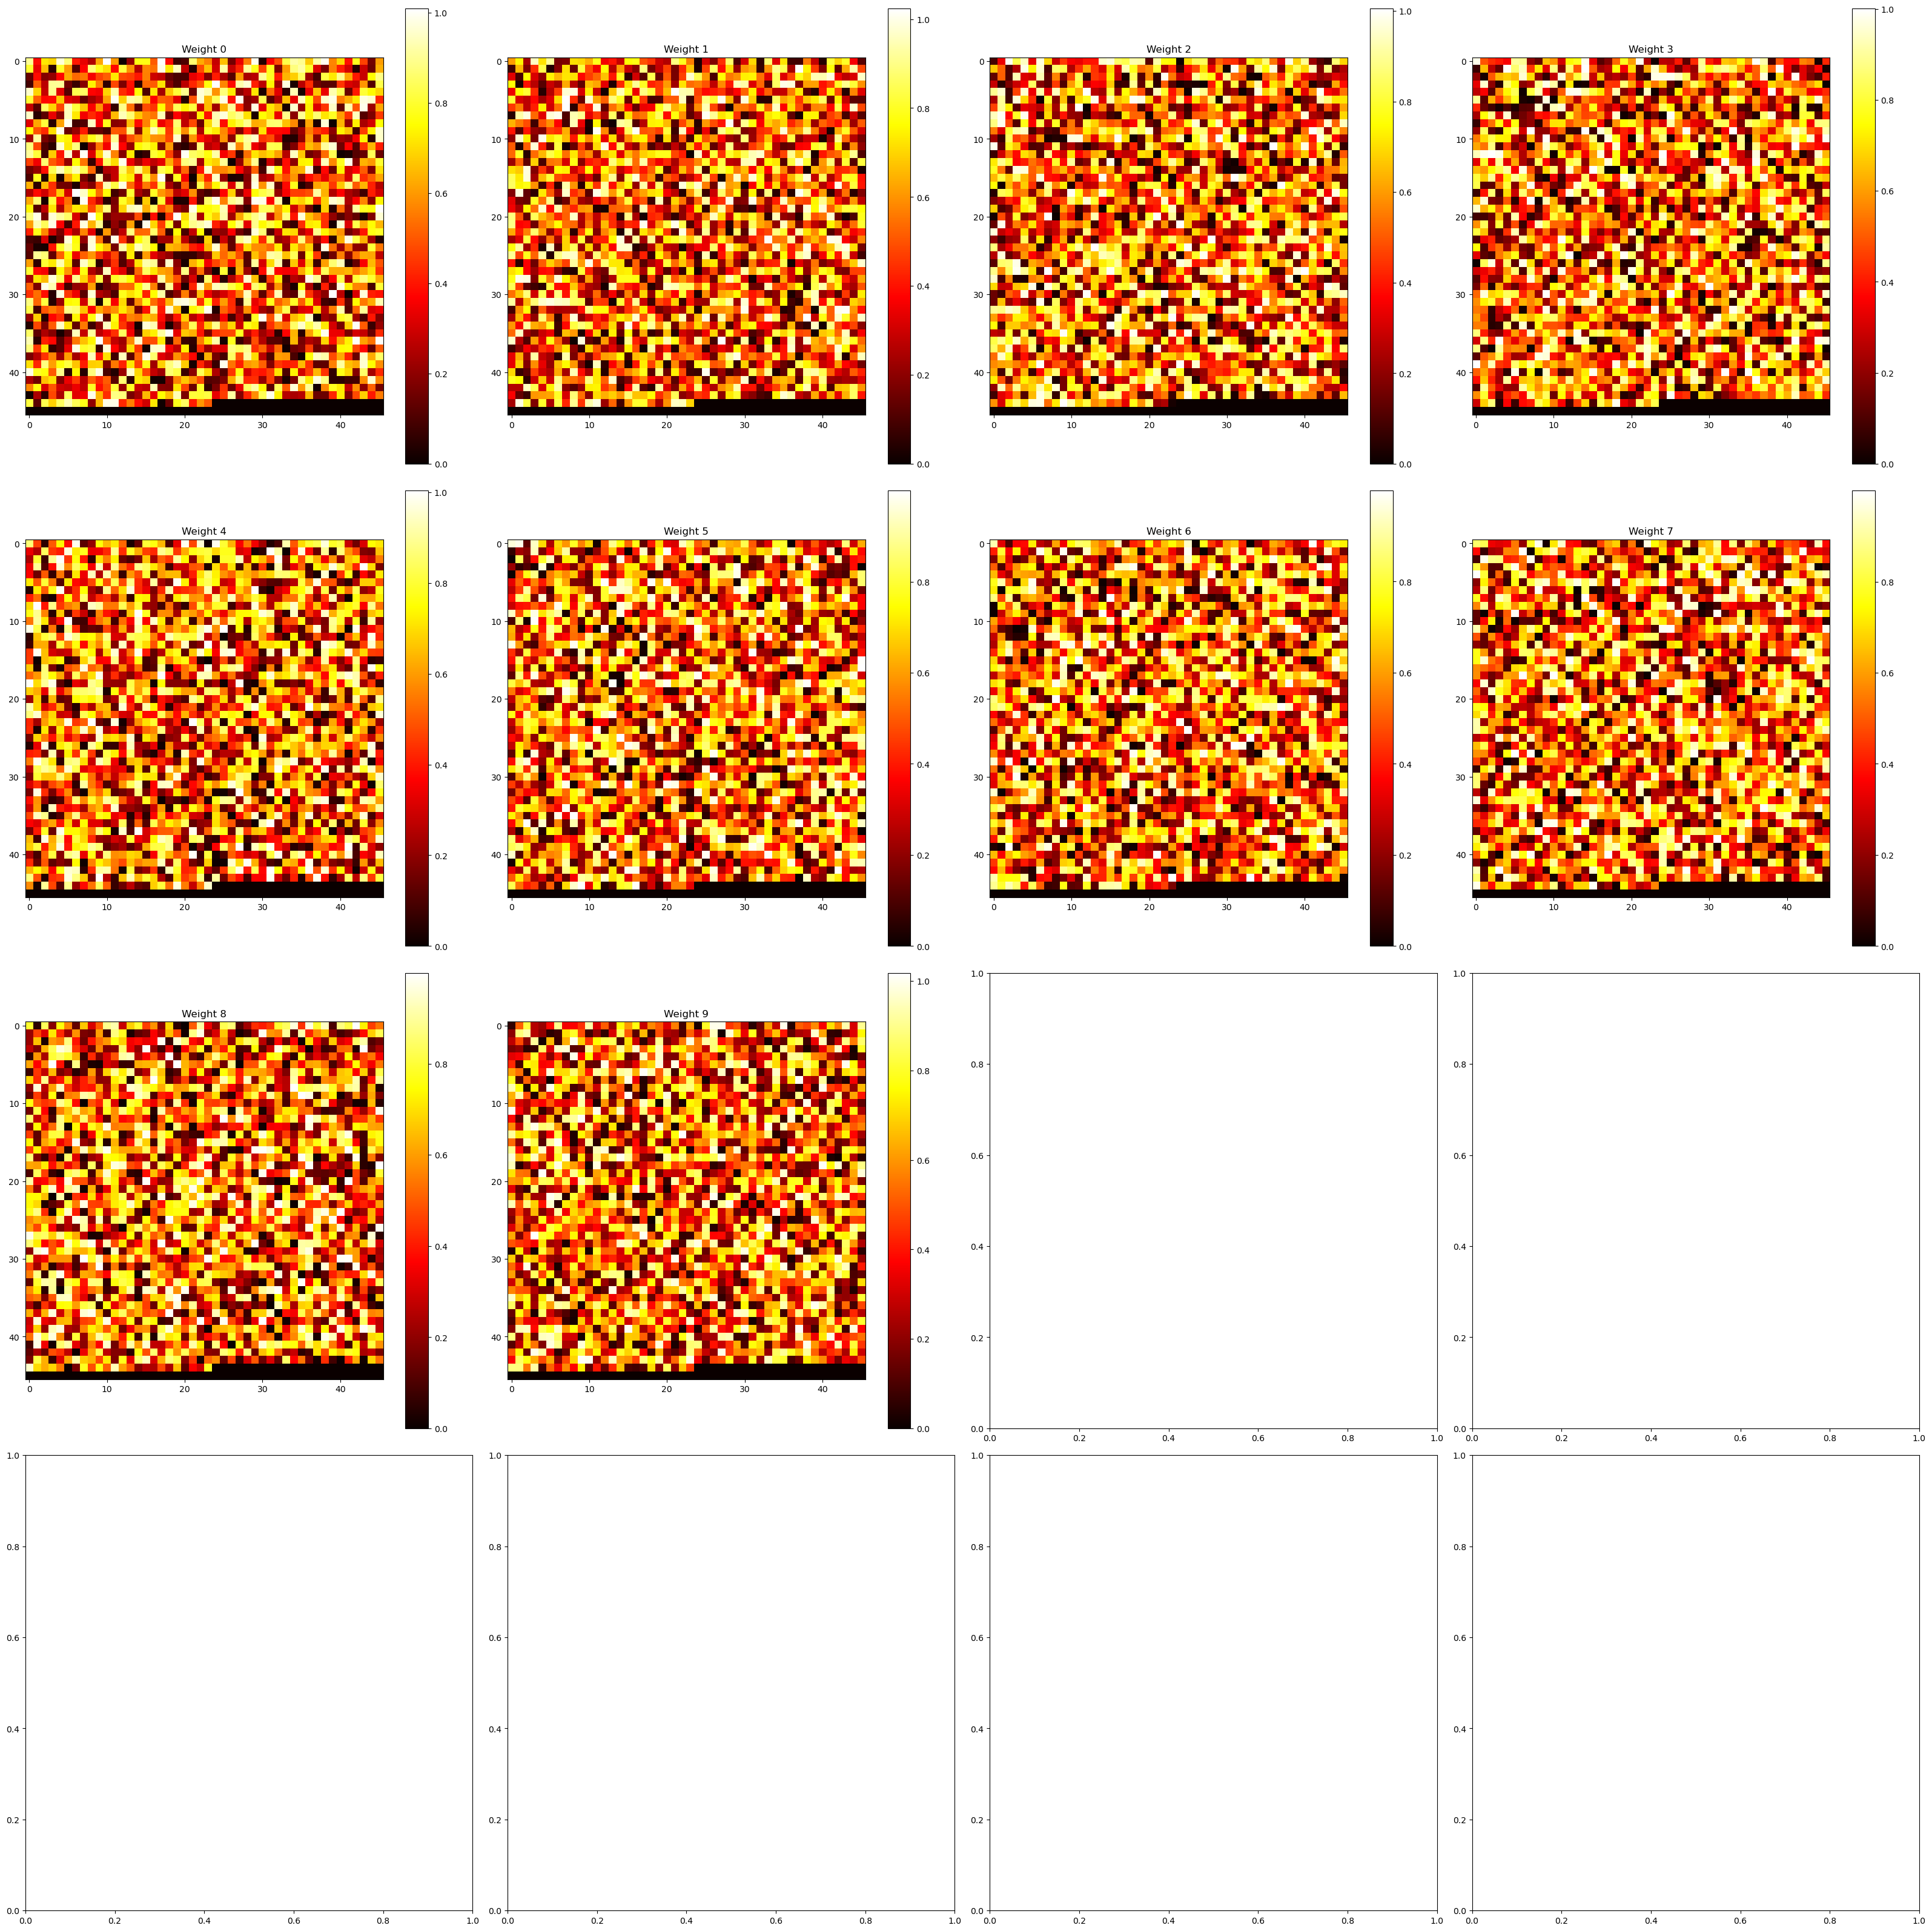

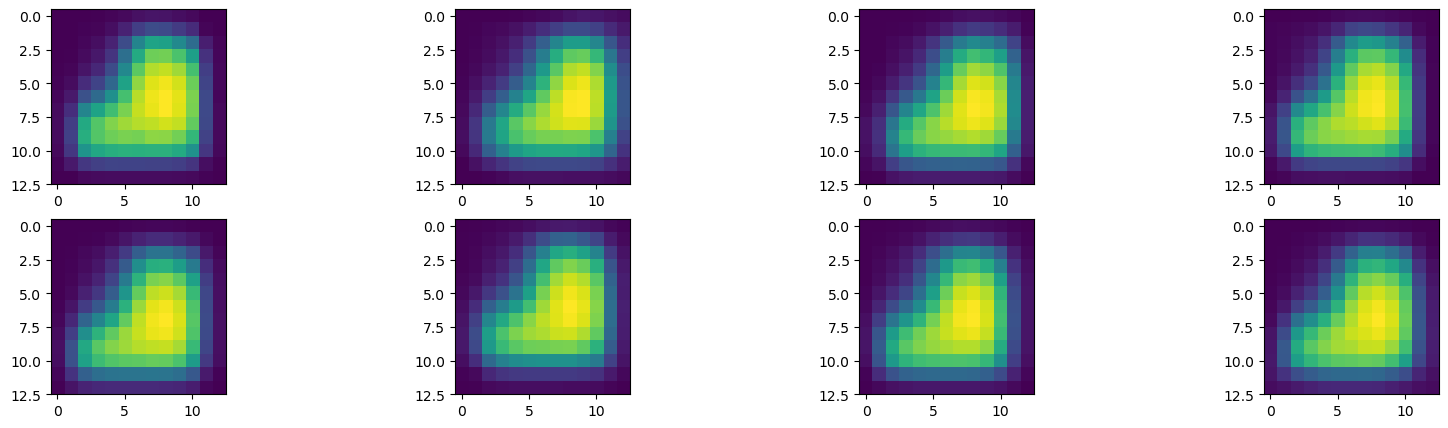

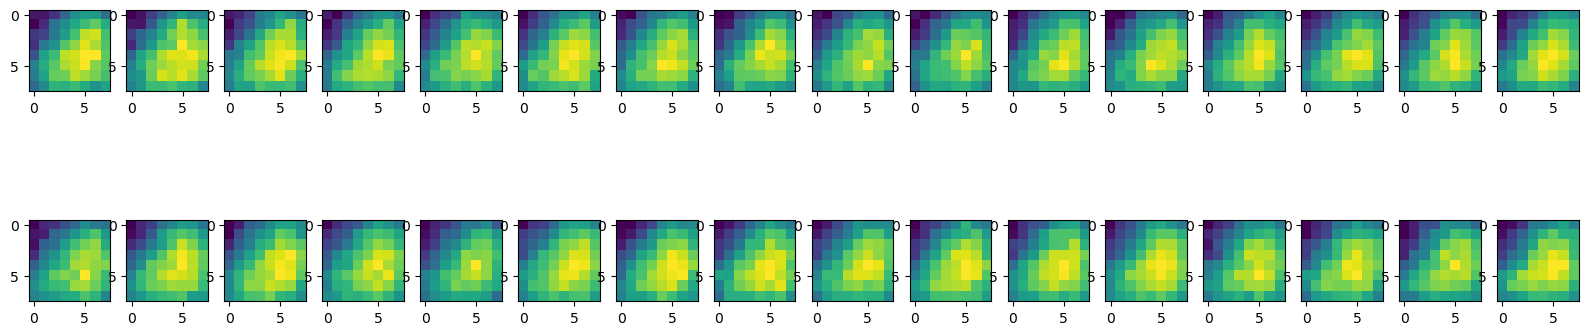

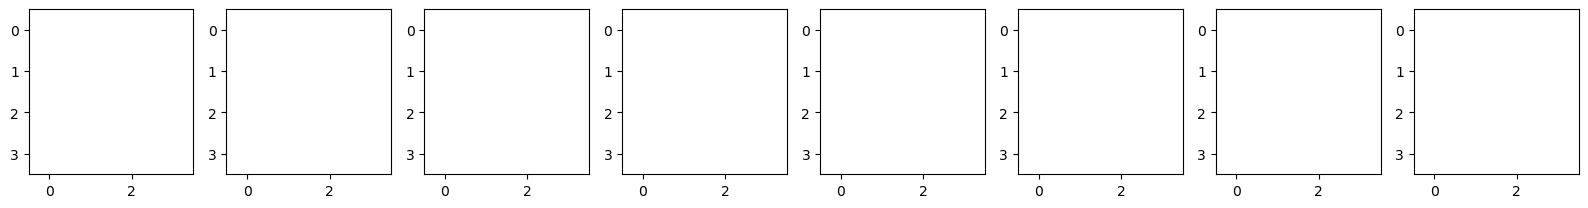

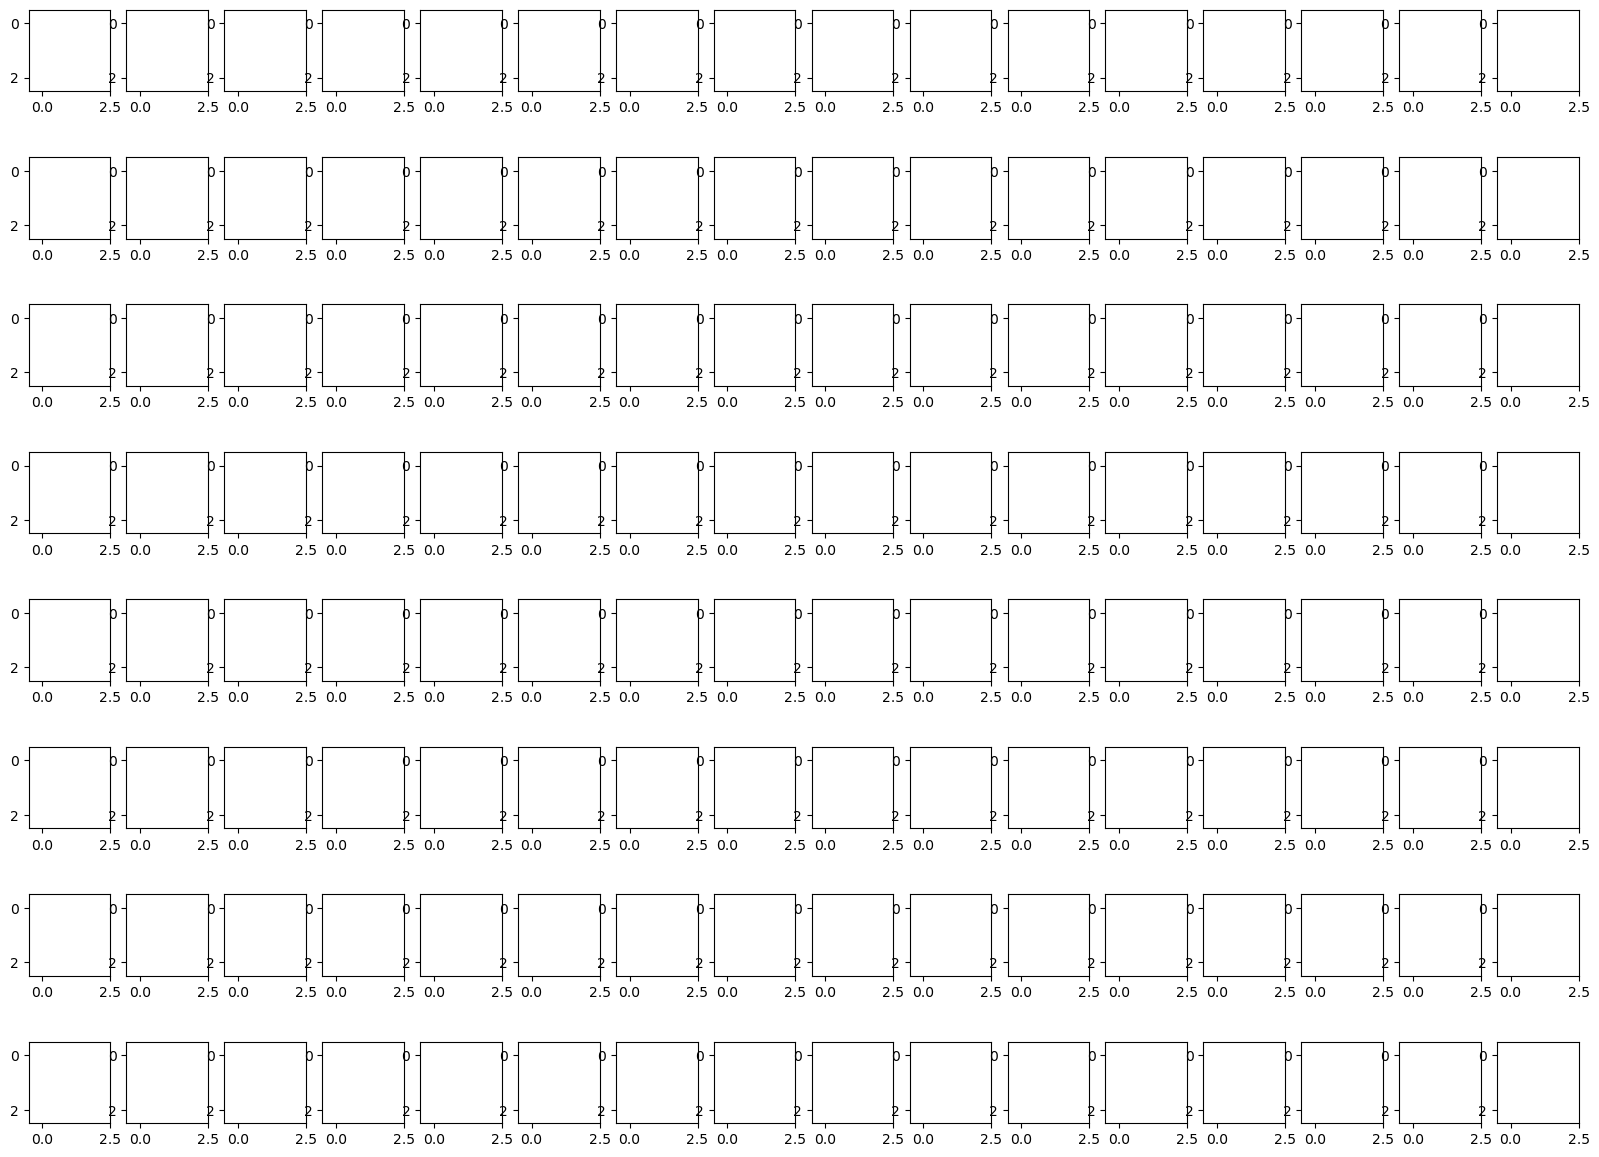

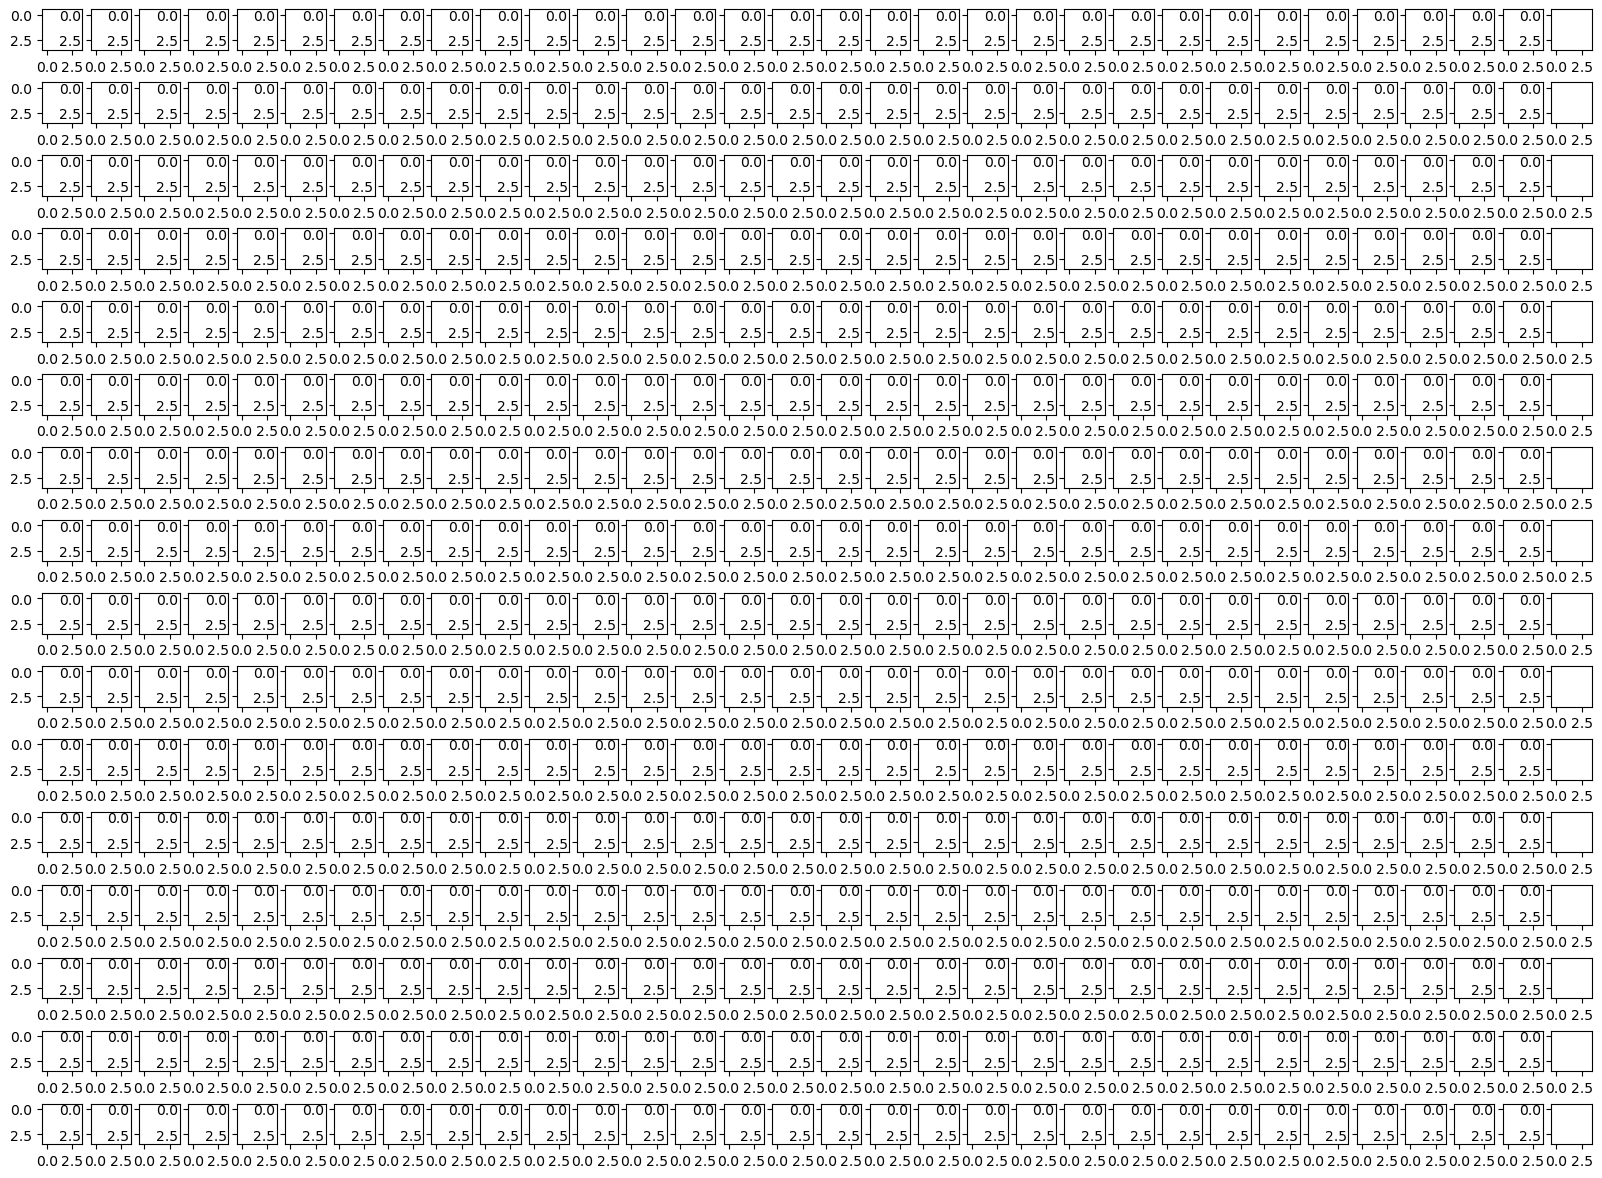

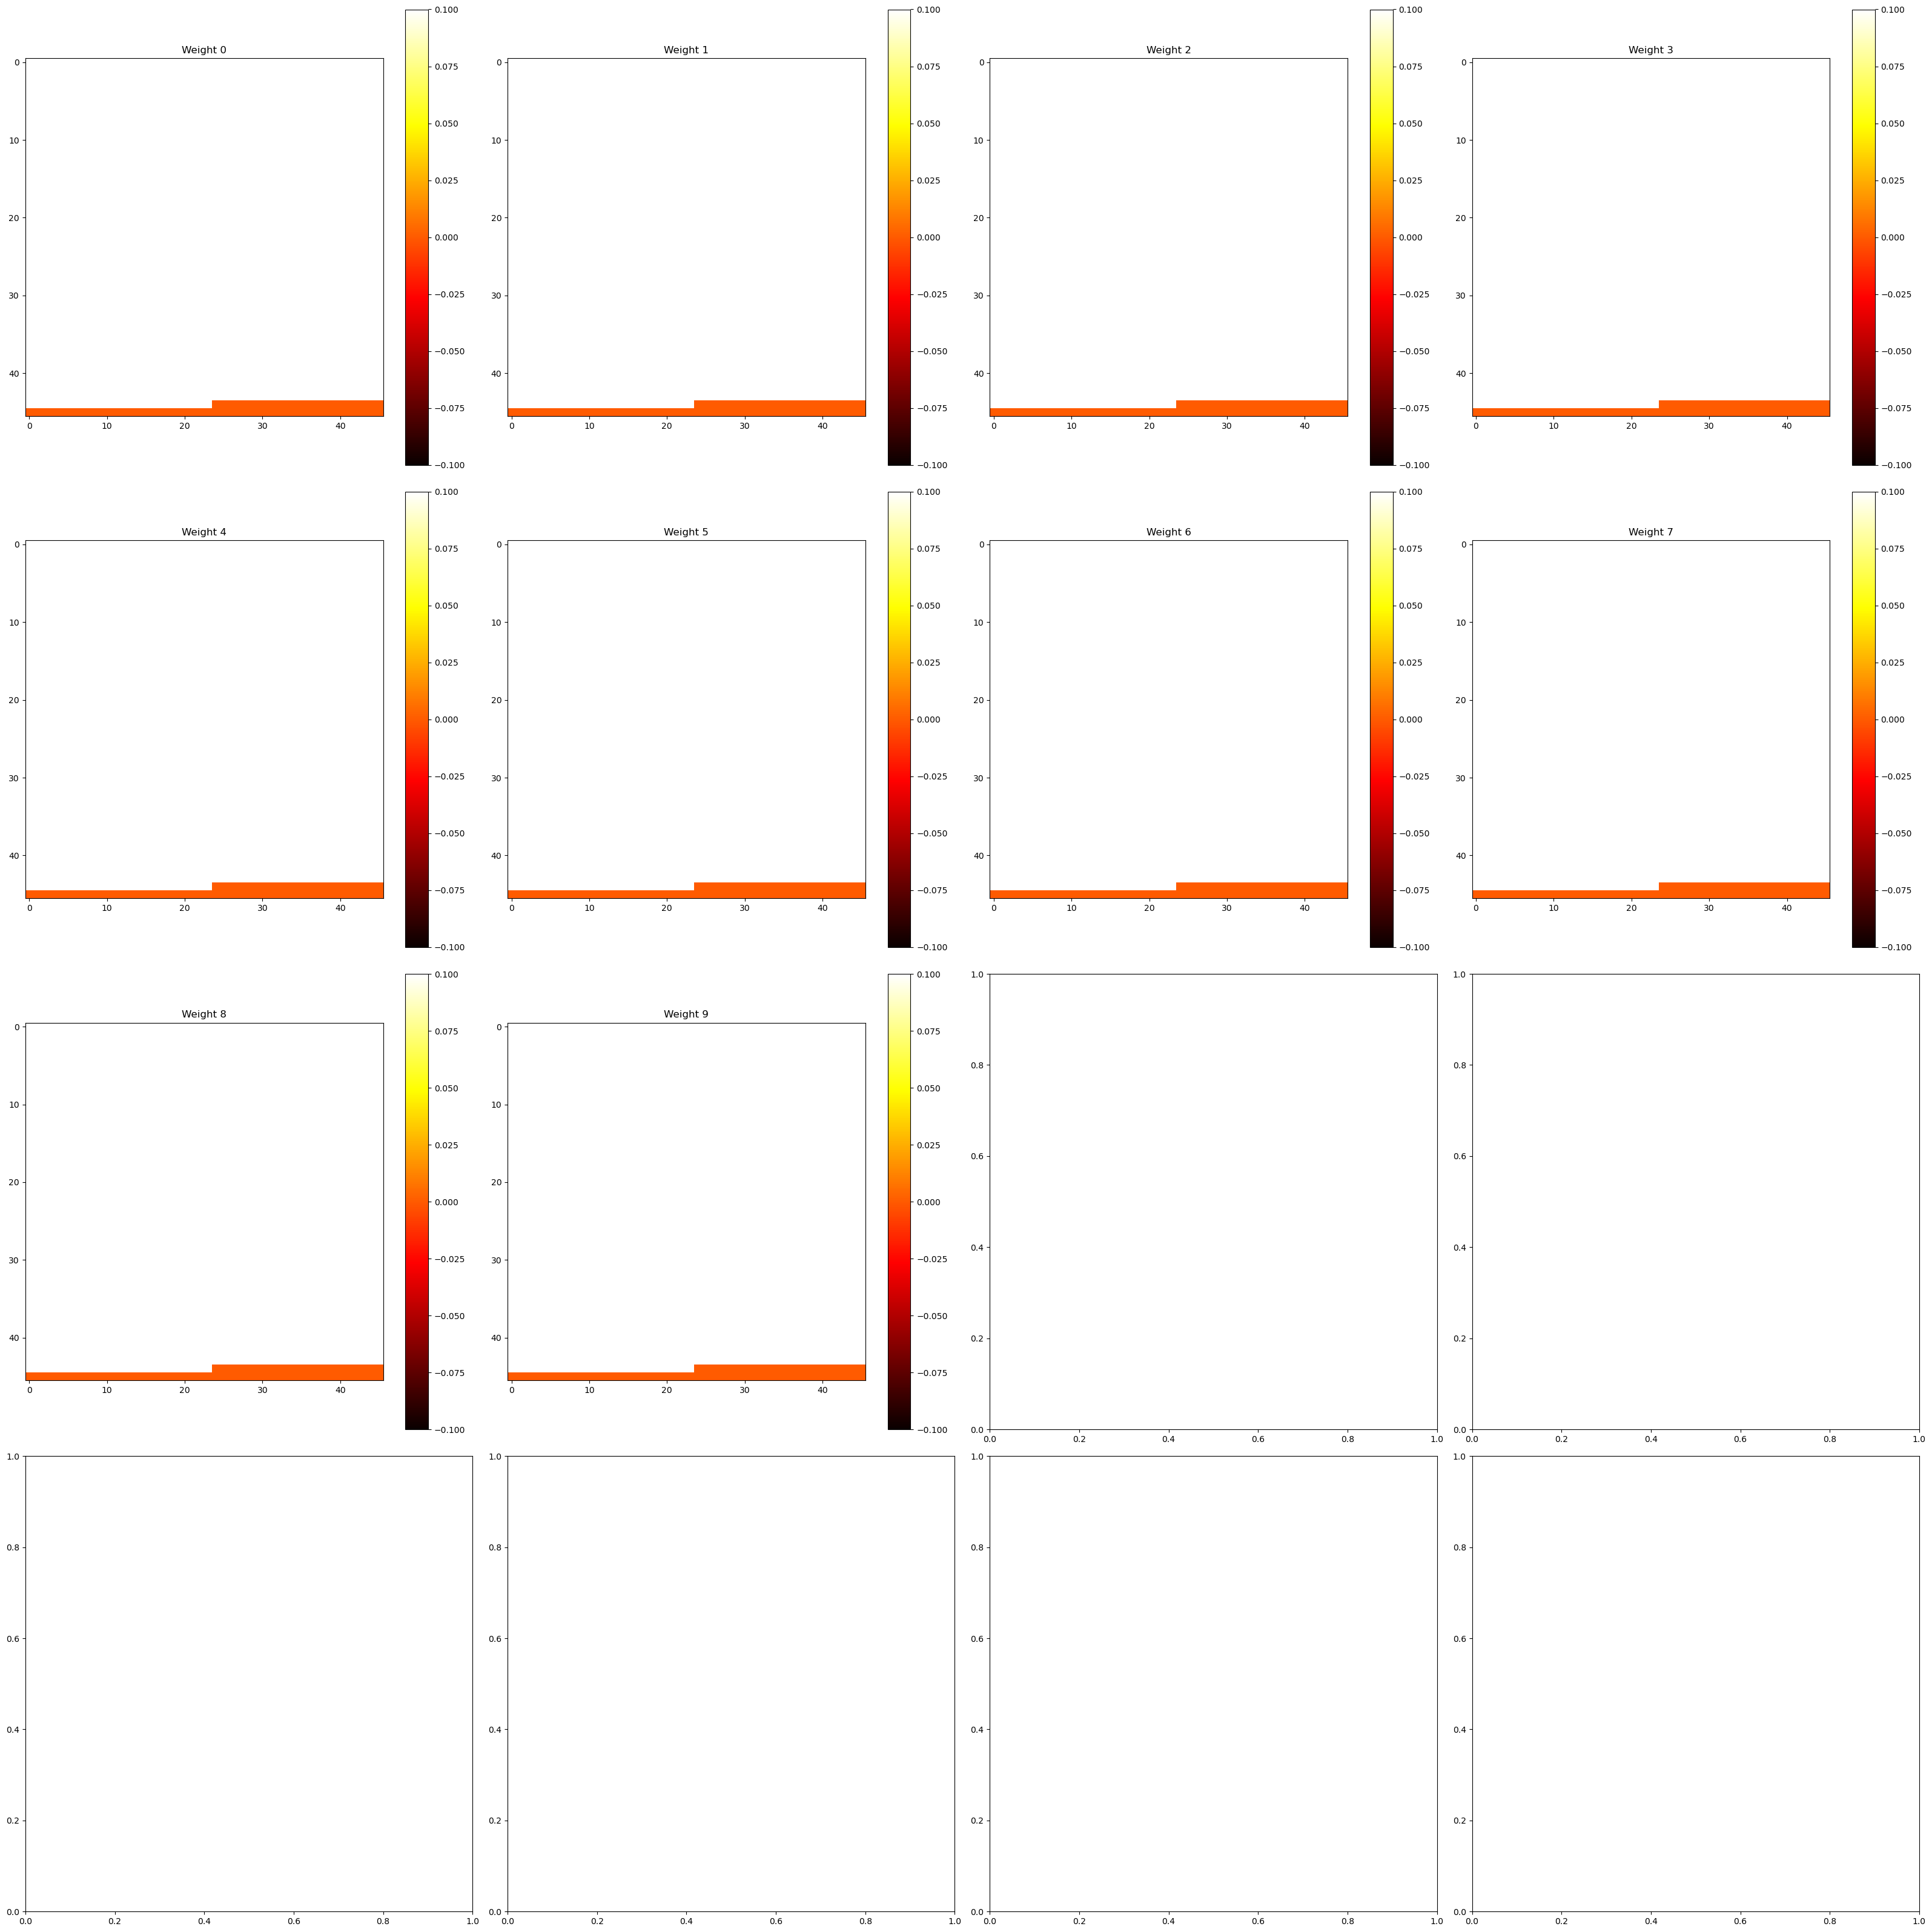

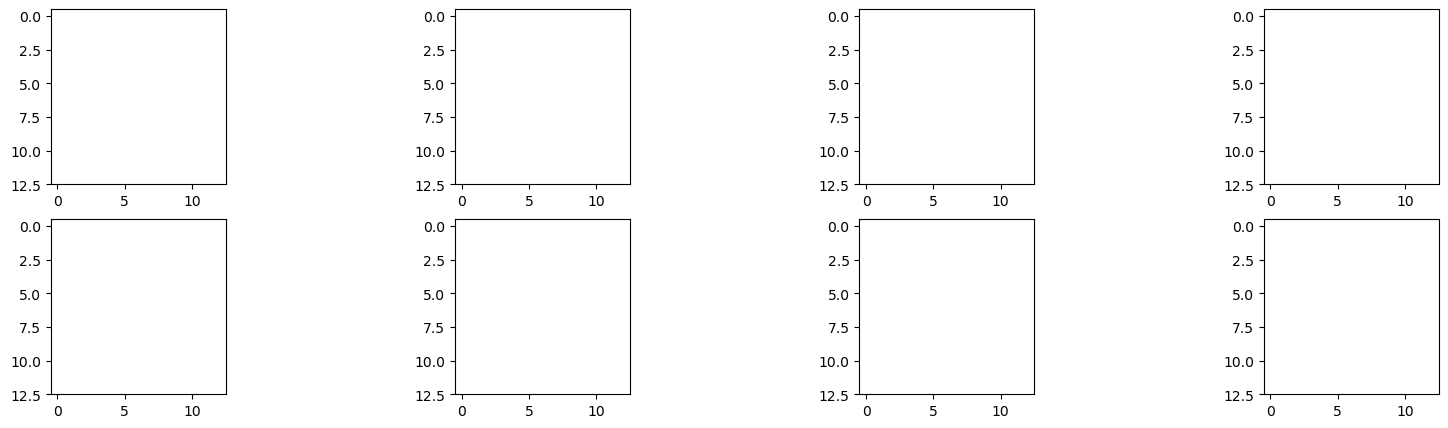

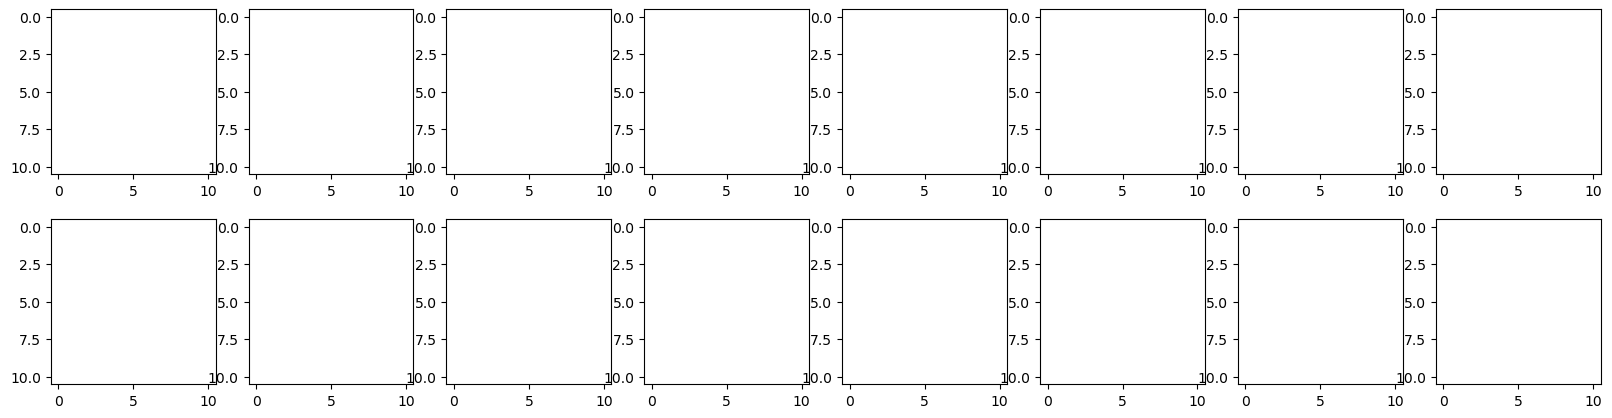

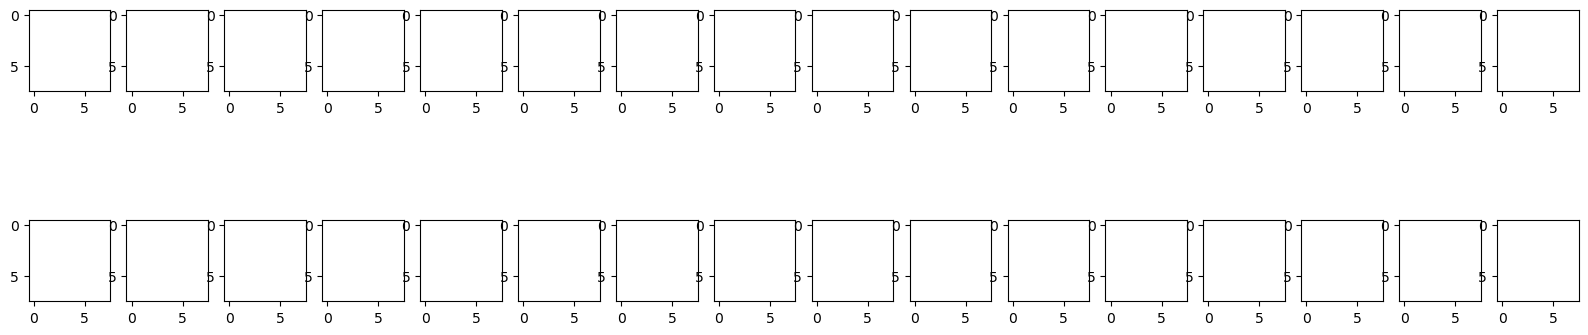

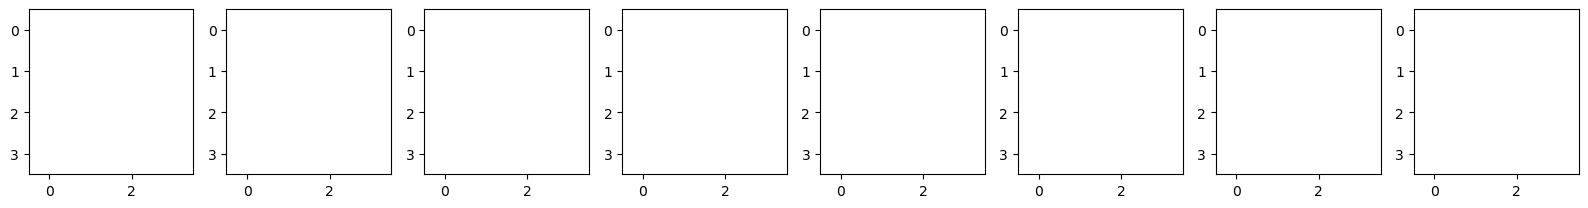

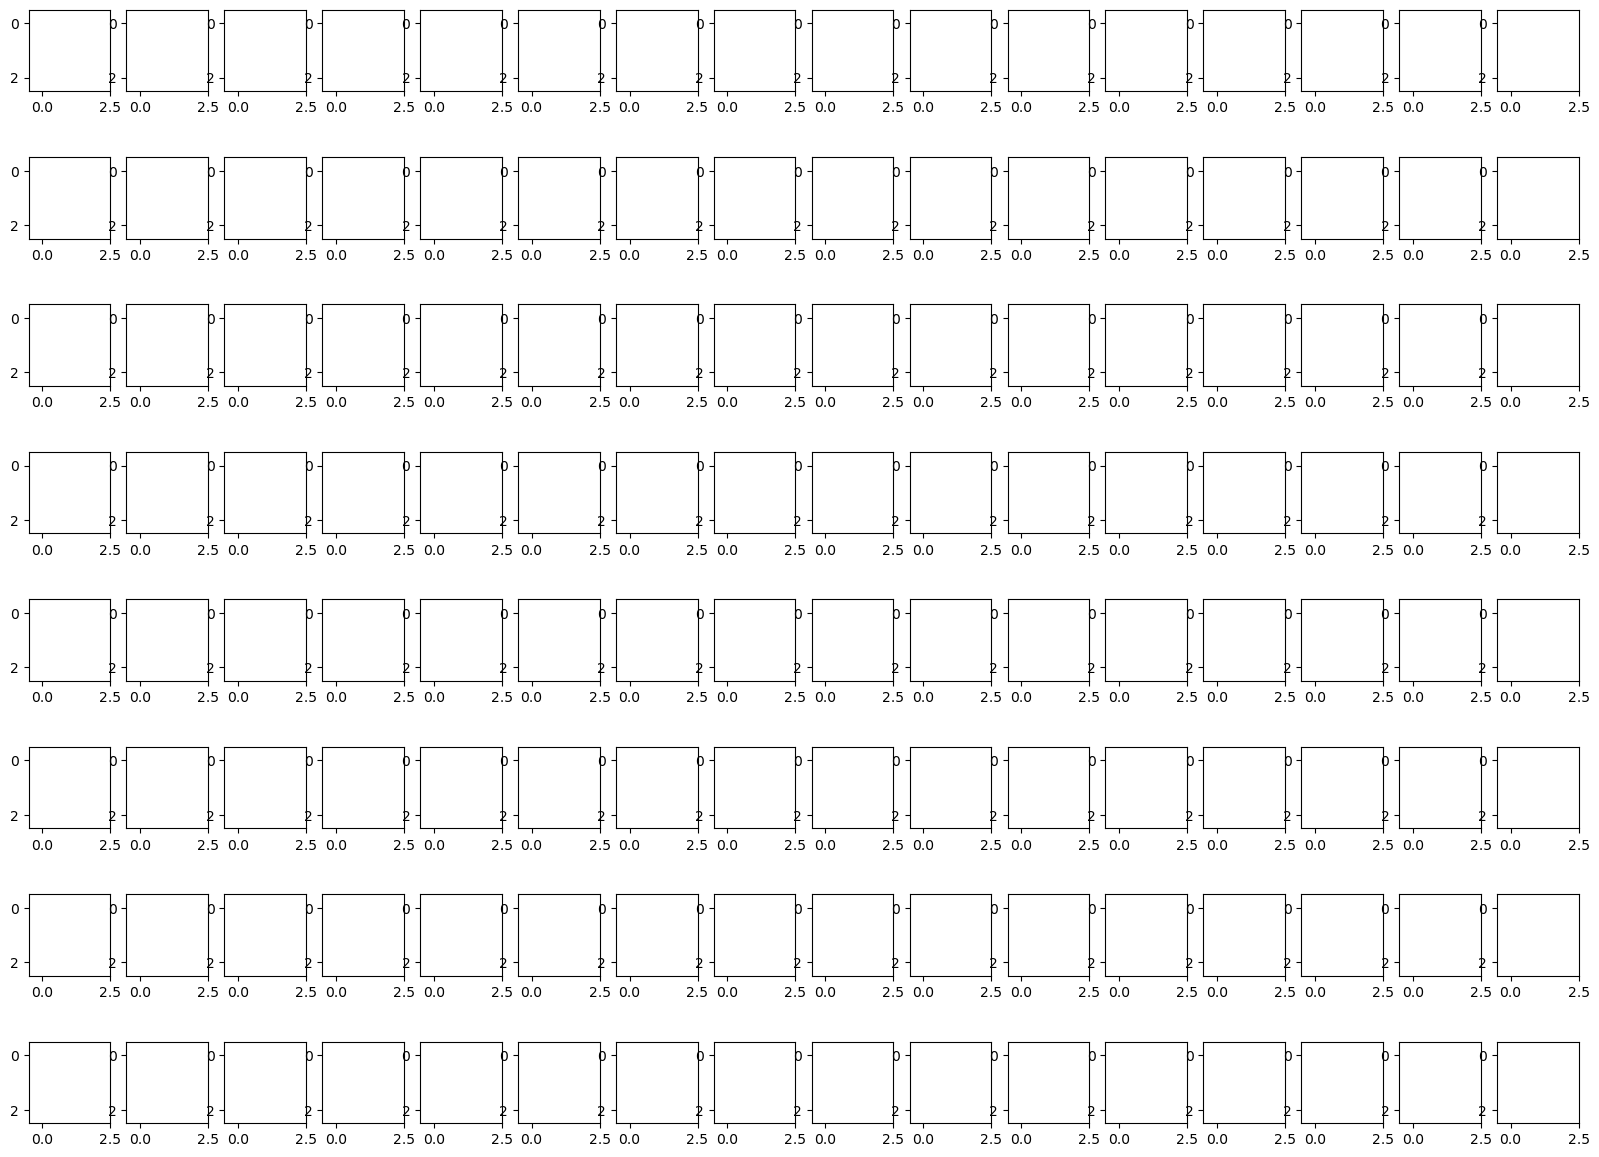

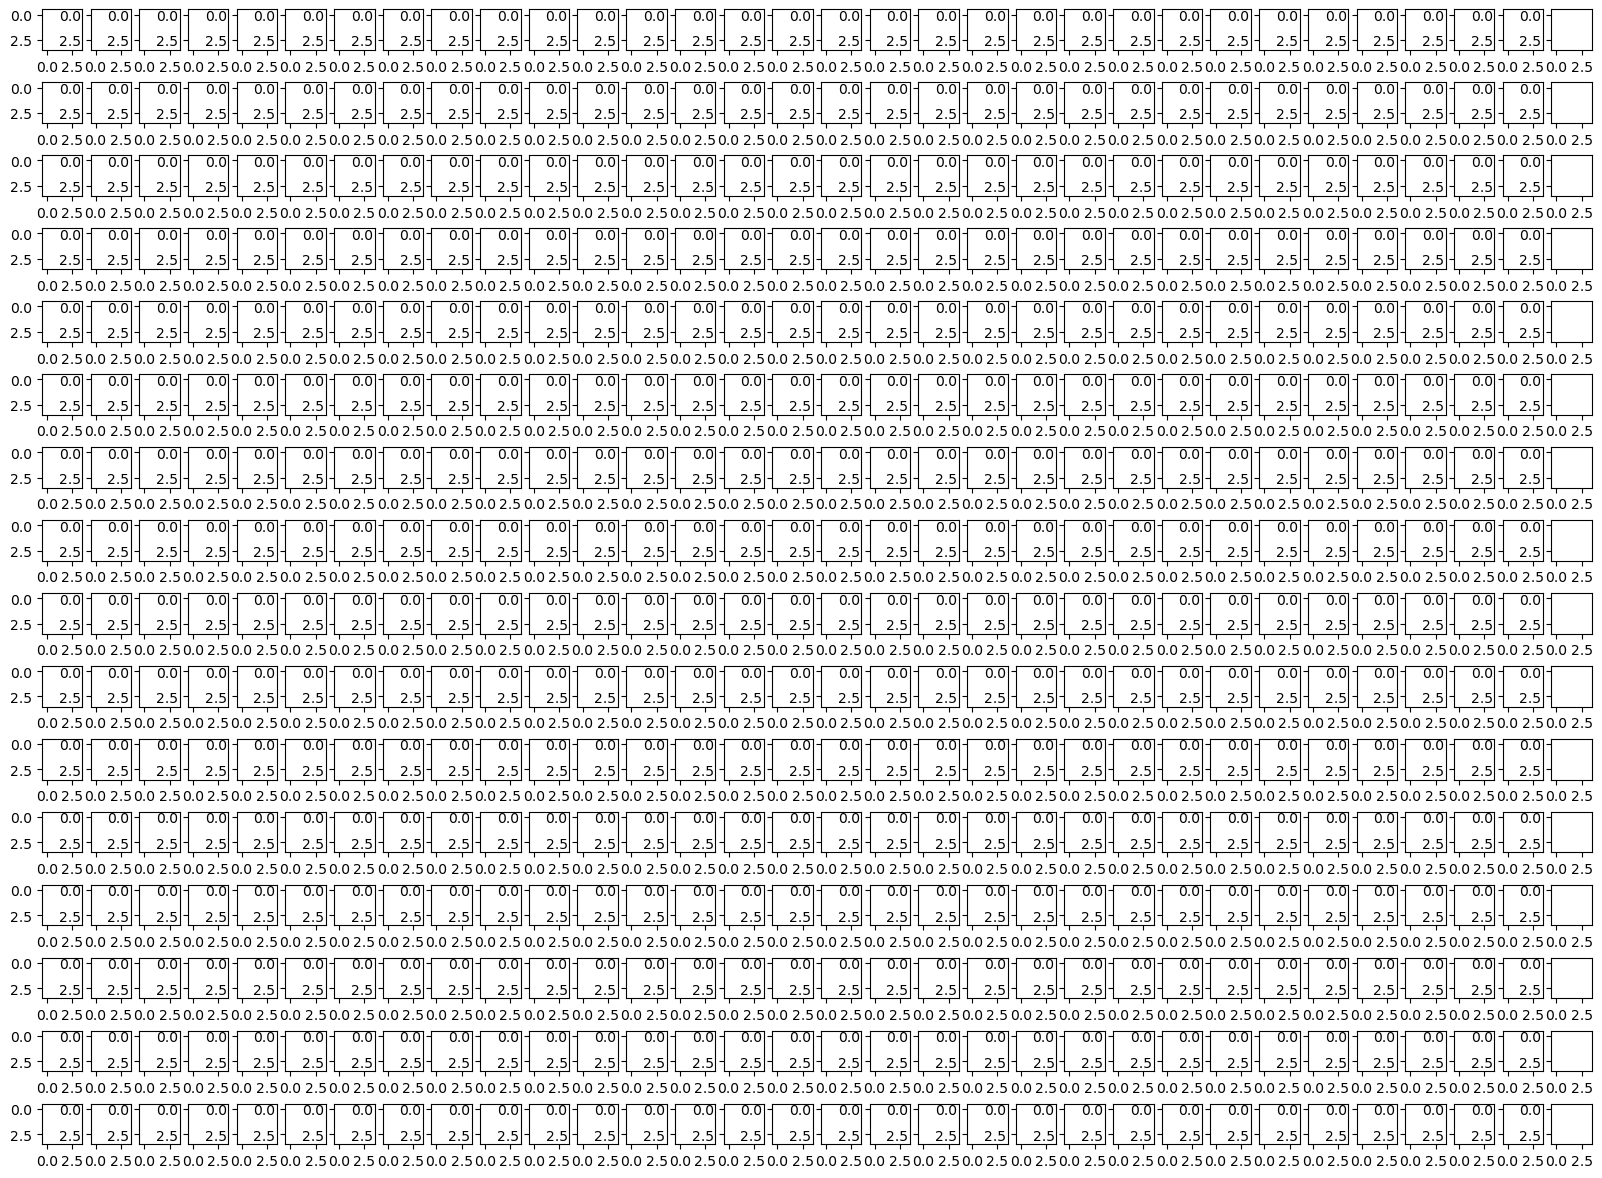

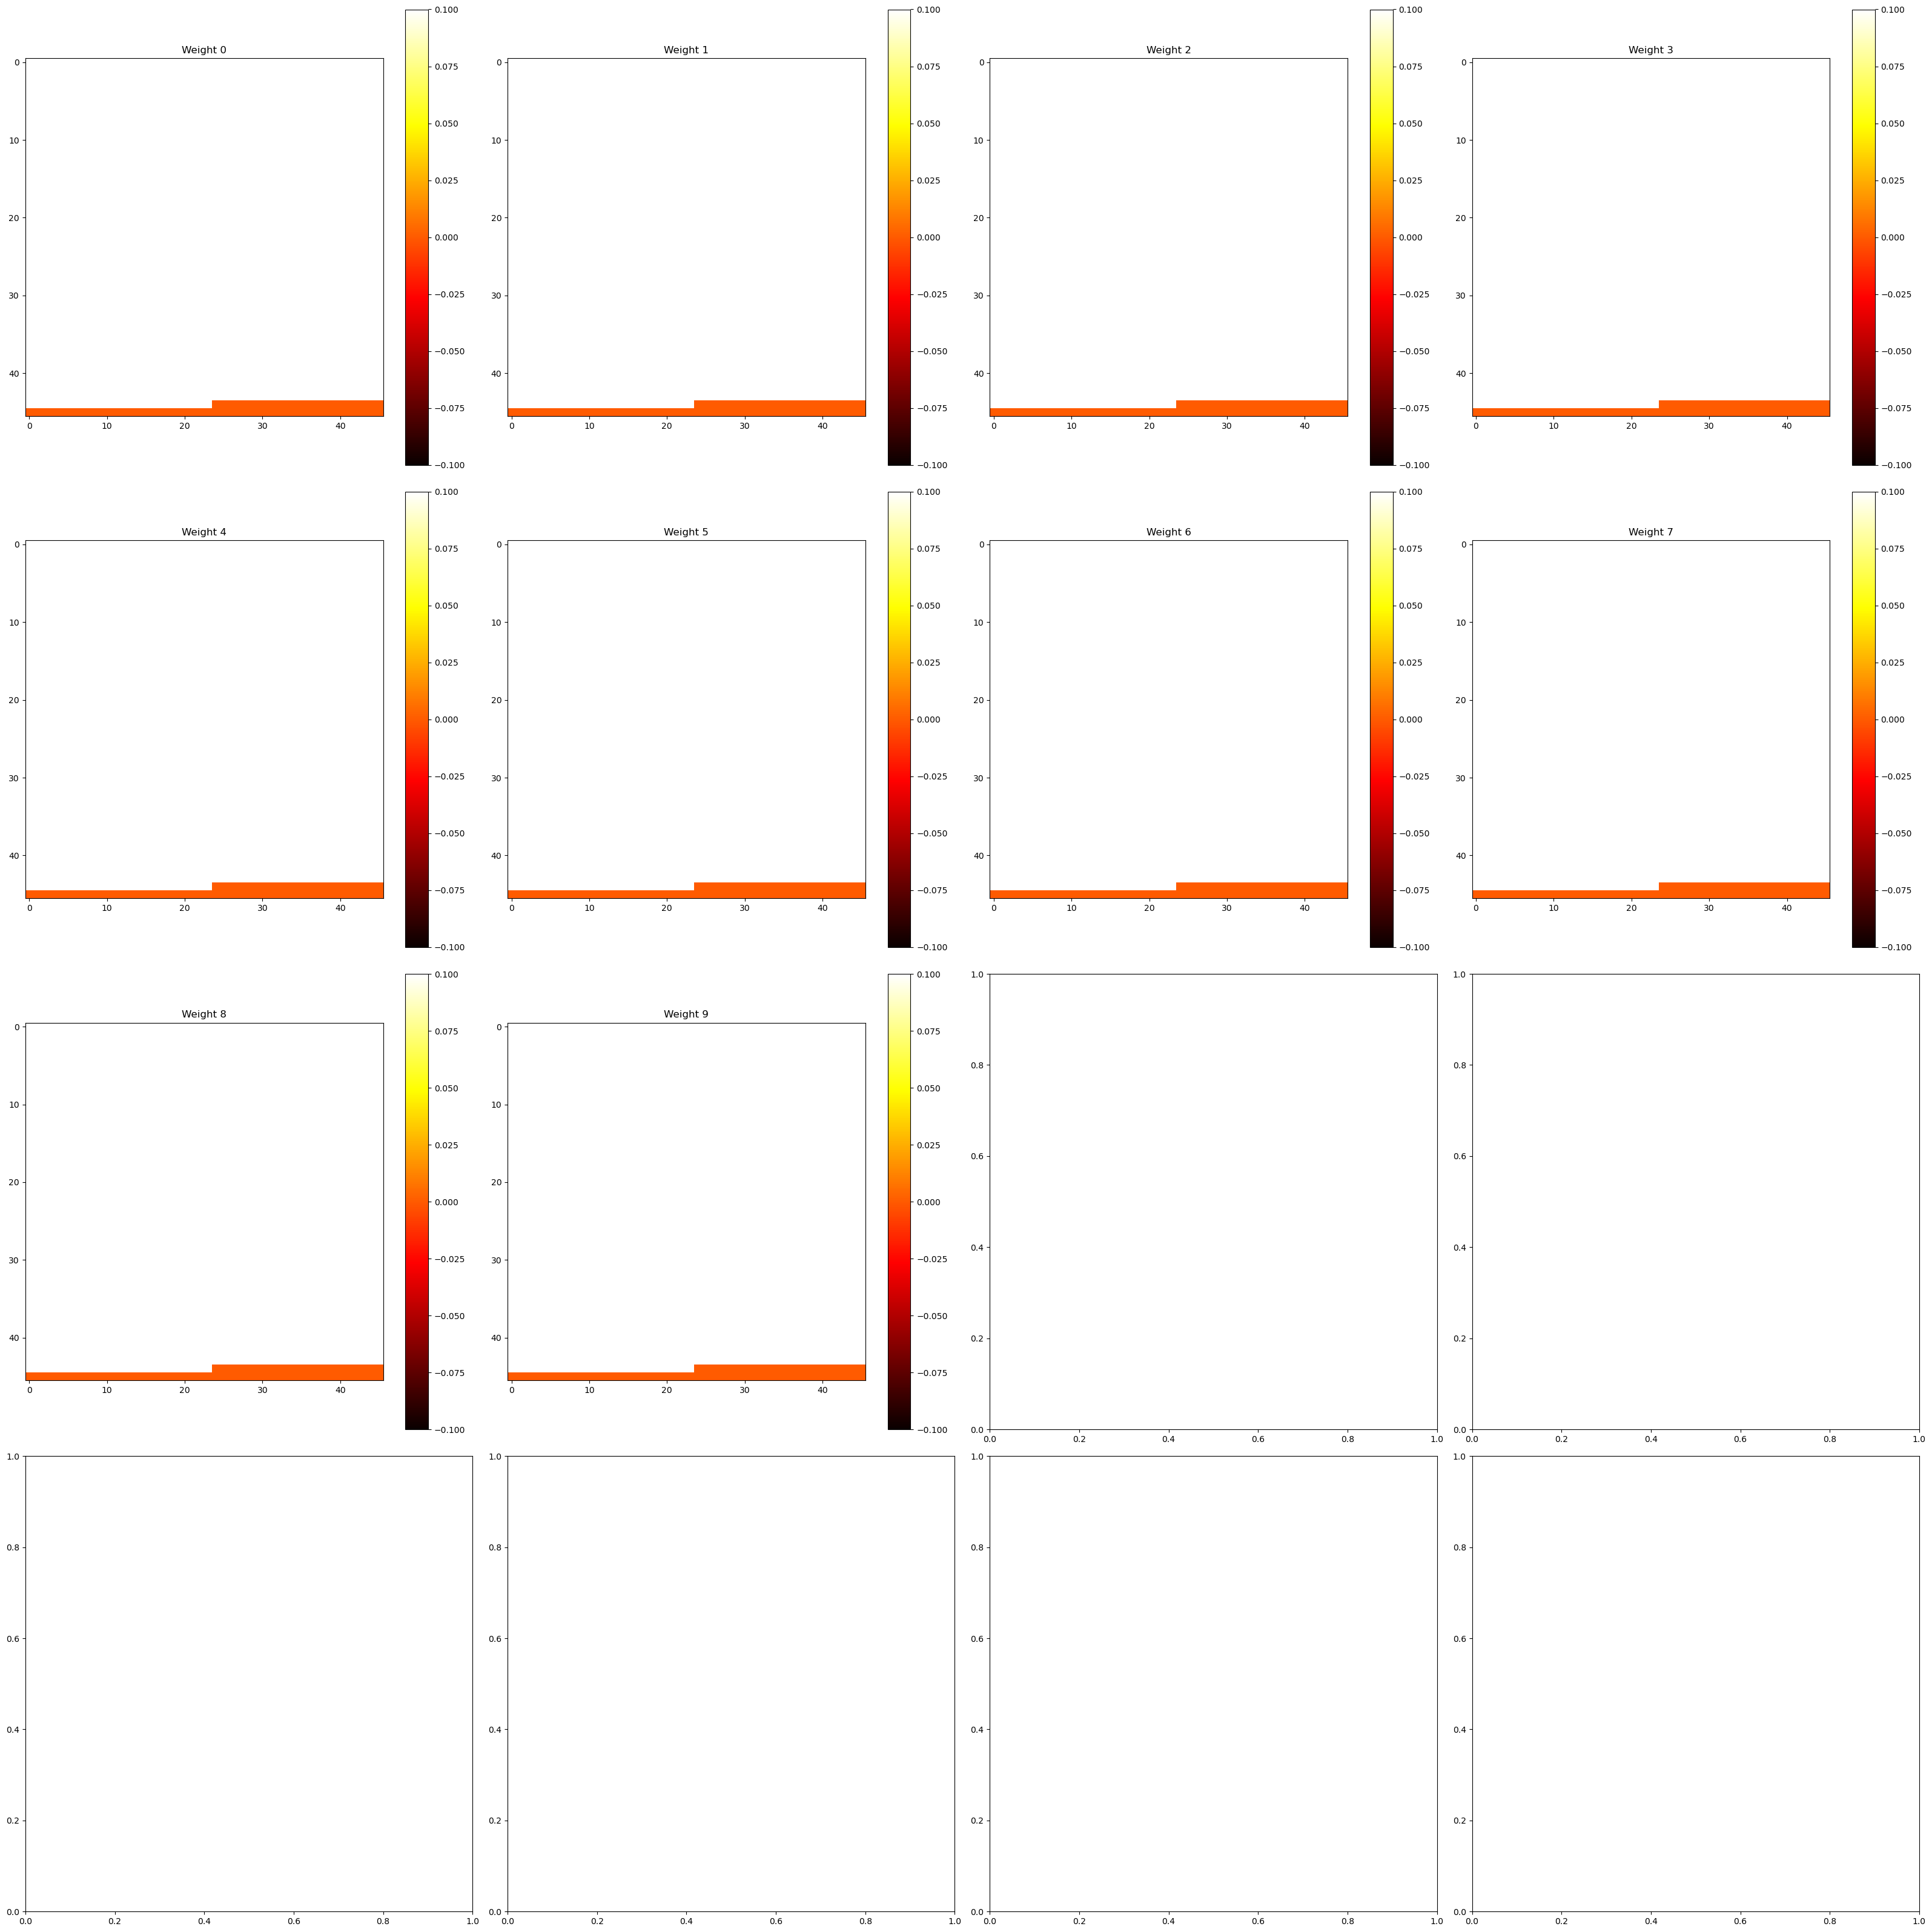

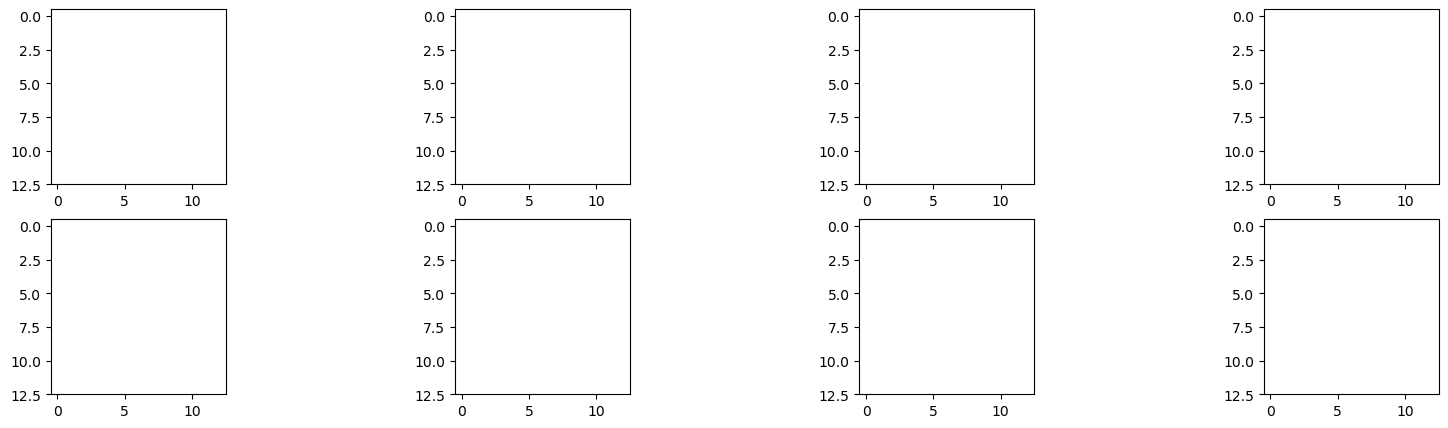

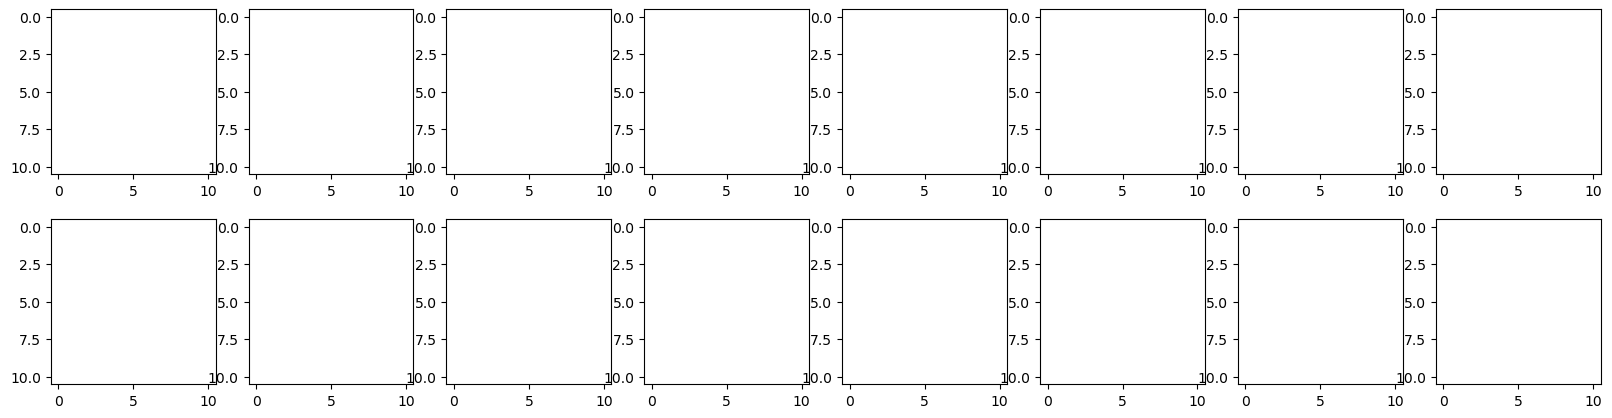

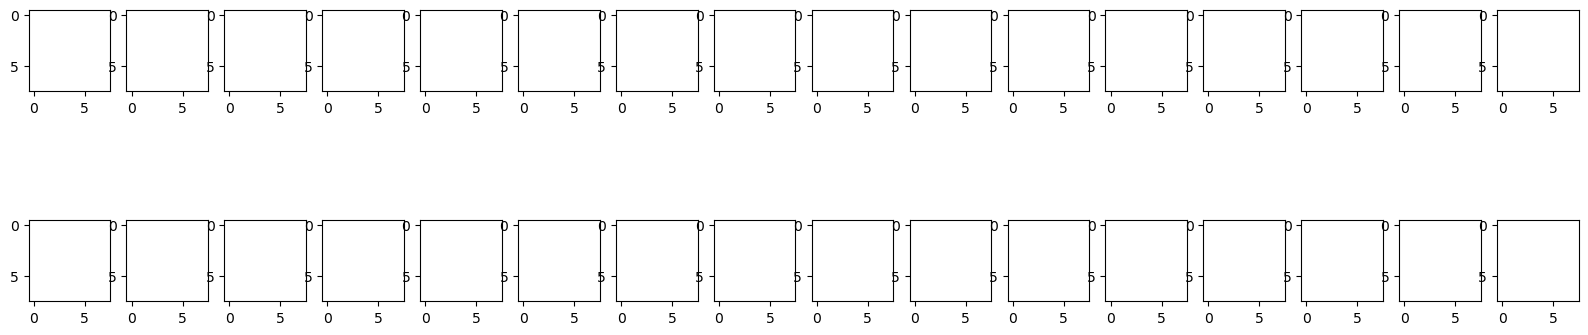

In [4]:
for l in lambds:
    for r in rhos: 
        mymodelCNN = CNN.CNNBaseline_Model(inputsize=28, kernel=[4,3,4], stride=[2,1,1], inchannel=[1,8,16], outchannel=[8,16,32], lambd=l, lr=0.005, gamma=0.99, epsilon=0.01, rho=r, nbclasses=10, topdown=True, wl=CNN.Learning.OrthogonalExclusive, ws=CNN.WeightScale.WeightNormalization, o=CNN.ClassifierLearning.Contrastive)
        mymodelCNN = CNN.CNNTD_Experiment(epoch=1, mymodel=mymodelCNN, dataloader=train_dataloader, dataset='FashionMNIST', nclasses=10, imgtype=CNN.ImageType.Gray)
        print(CNN.CNN_Baseline_test(mymodel=mymodelCNN, data_loader=test_dataloader, imgtype=CNN.ImageType.Gray, topdown=True))

New Image Dimensions after Convolution : 13
New Image Dimensions after Convolution : 11
New Image Dimensions after Convolution : 2048


  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.7059, {9: (842, 1000, 94), 7: (743, 1000, 137), 2: (796, 1000, 1009), 1: (905, 1000, 32), 6: (387, 1000, 626), 4: (269, 1000, 213), 5: (862, 1000, 165), 8: (816, 1000, 198), 3: (834, 1000, 294), 0: (605, 1000, 173)})


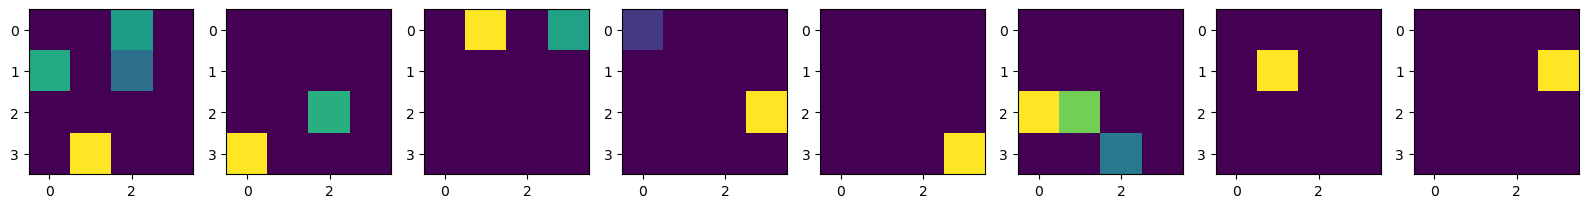

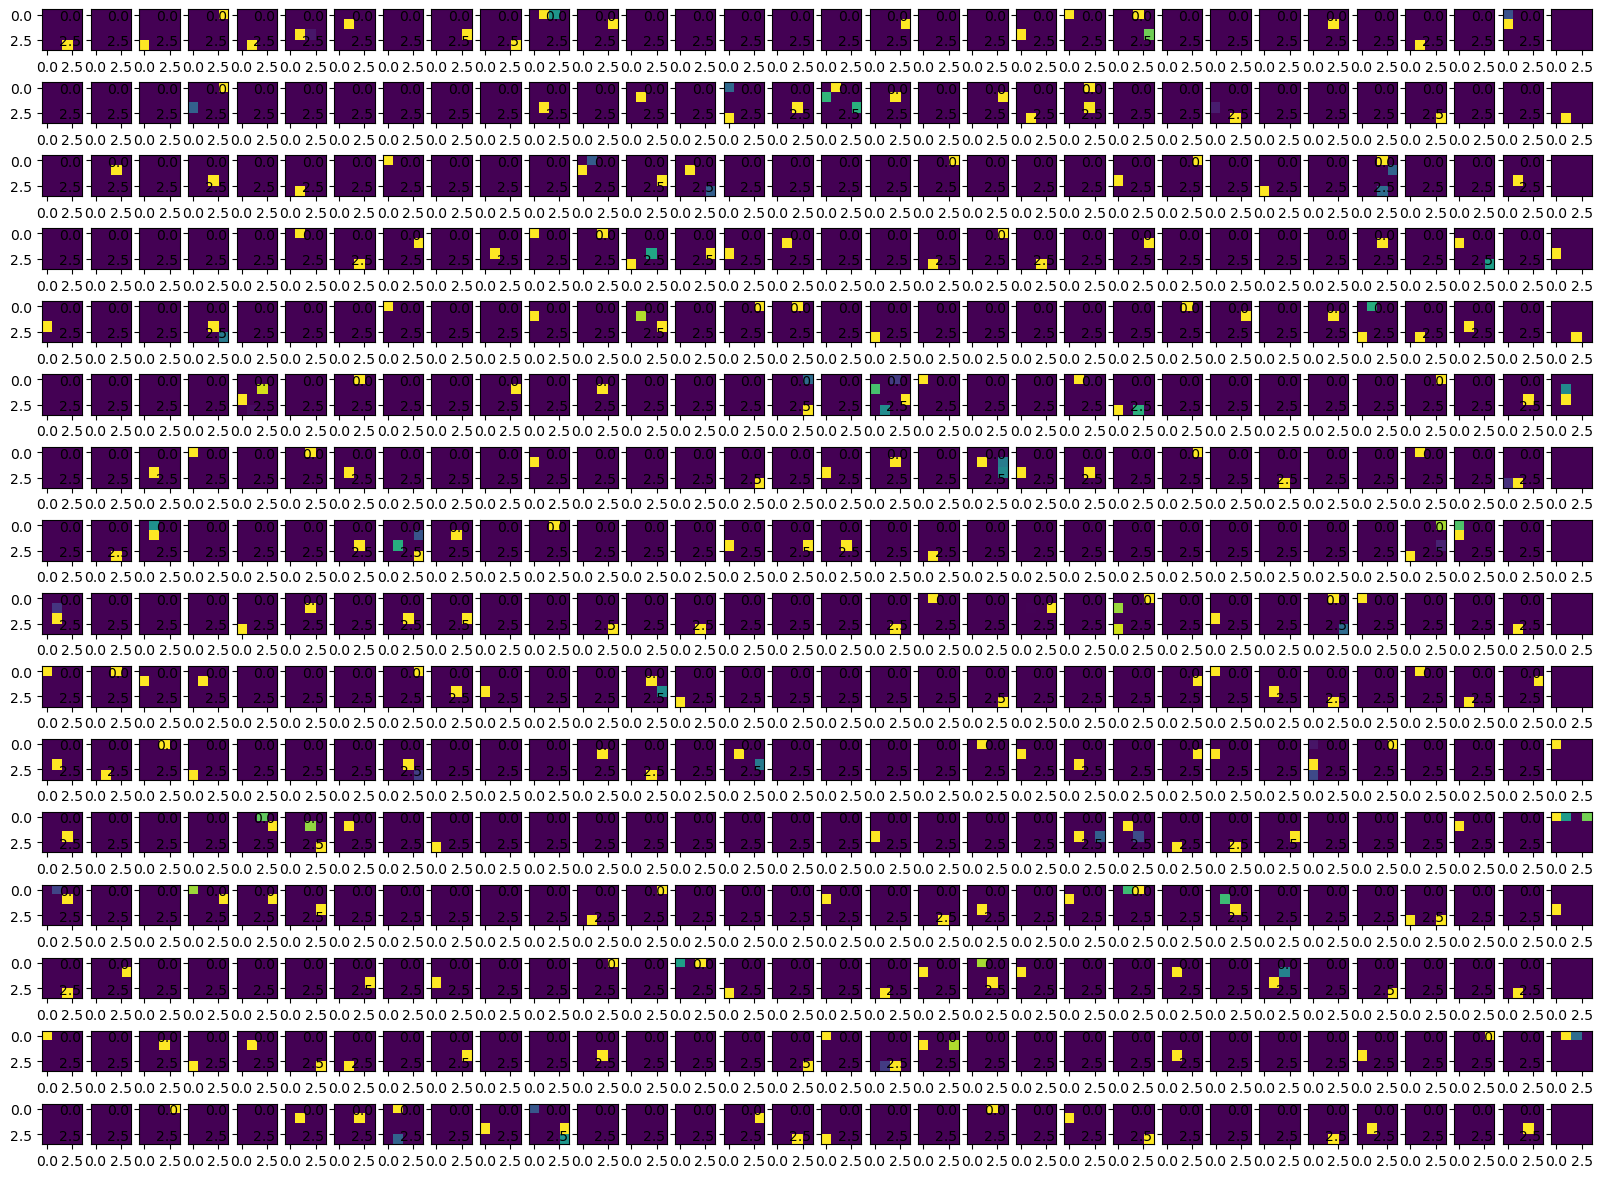

In [40]:
mymodelCNN2 = CNN.CNNBaseline_Model(inputsize=28, kernel=[4,3,4], stride=[2,1,1], inchannel=[1,8,16], outchannel=[8,16,32], lambd=4, lr=5e-5, gamma=0.99, epsilon=0.01, rho=1, nbclasses=10, topdown=False, wl=CNN.Learning.OrthogonalExclusive, ws=CNN.WeightScale.WeightNormalization, o=CNN.ClassifierLearning.Contrastive)
mymodelCNN2 = CNN.CNNBaseline_Experiment(epoch=1, mymodel=mymodelCNN2, dataloader=train_dataloader, dataset='FashionMNIST', nclasses=10, imgtype=CNN.ImageType.Gray)
print(CNN.CNN_Baseline_test(mymodel=mymodelCNN2, data_loader=test_dataloader, imgtype=CNN.ImageType.Gray, topdown=False))

New Image Dimensions after Convolution : 13
New Image Dimensions after Convolution : 11
New Image Dimensions after Convolution : 2048


  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.1372, {9: (0, 1000, 0), 8: (0, 1000, 35), 2: (0, 1000, 2), 5: (720, 1000, 5872), 1: (0, 1000, 1), 0: (543, 1000, 1962), 6: (8, 1000, 340), 4: (5, 1000, 59), 7: (0, 1000, 0), 3: (96, 1000, 357)})


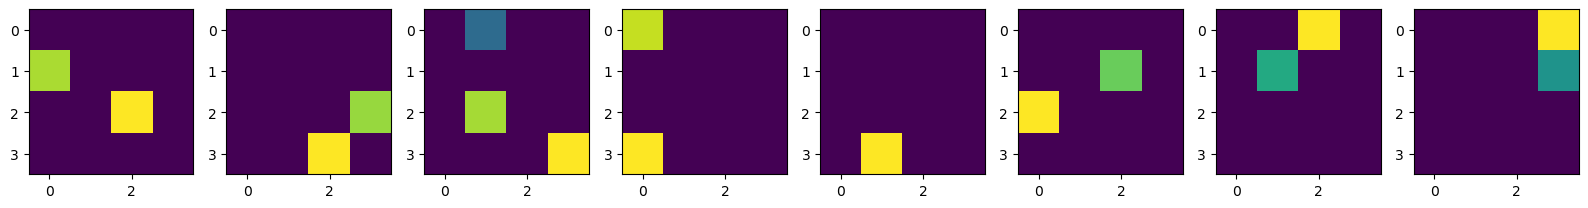

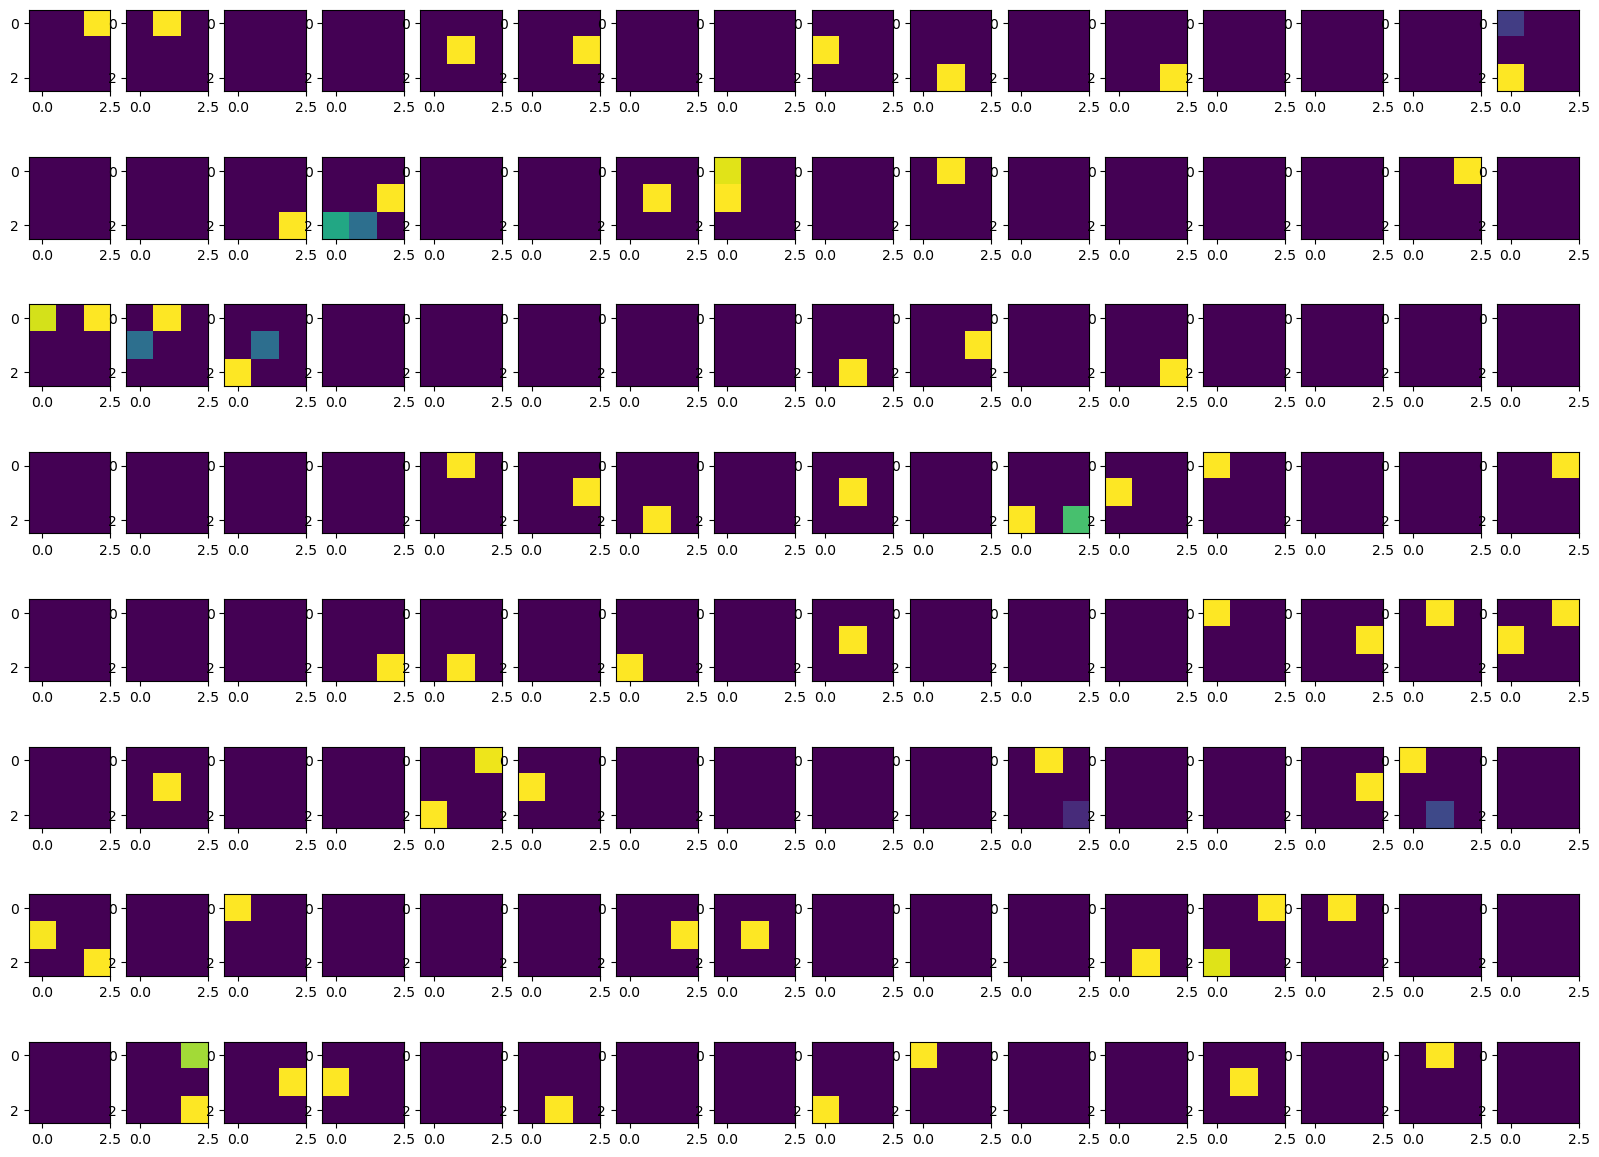

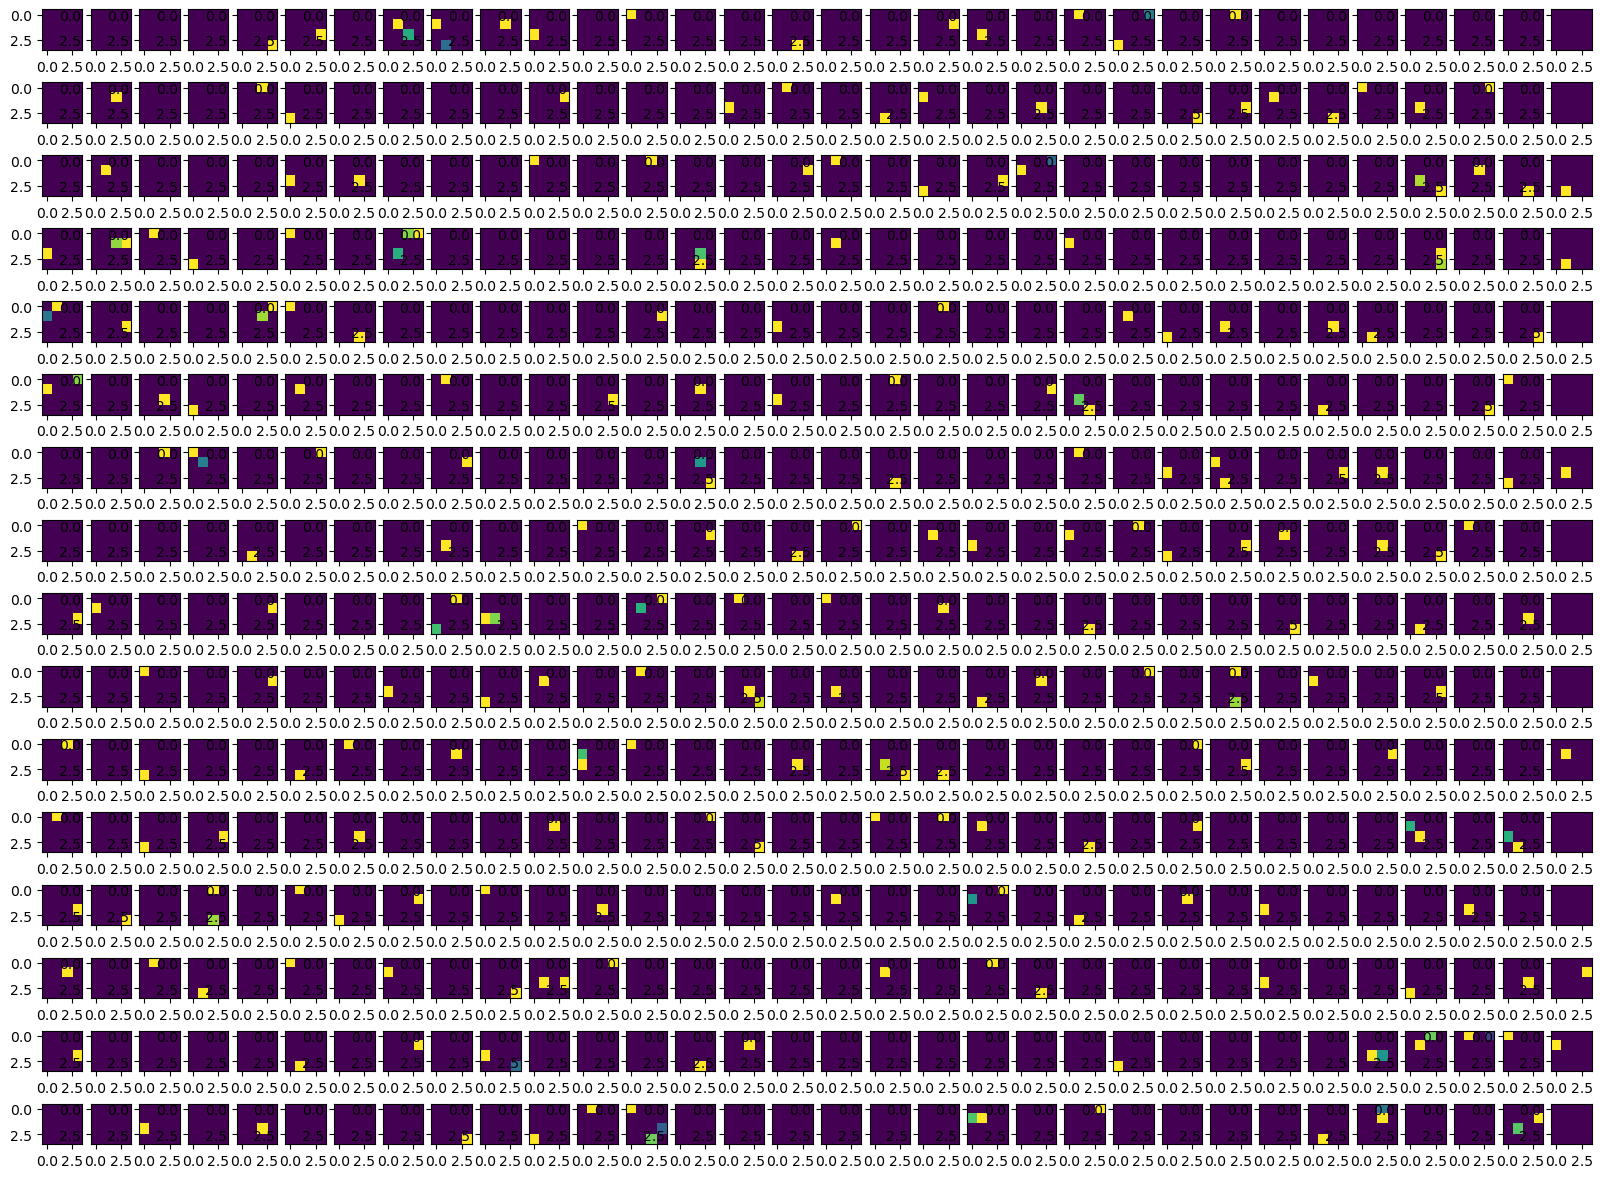

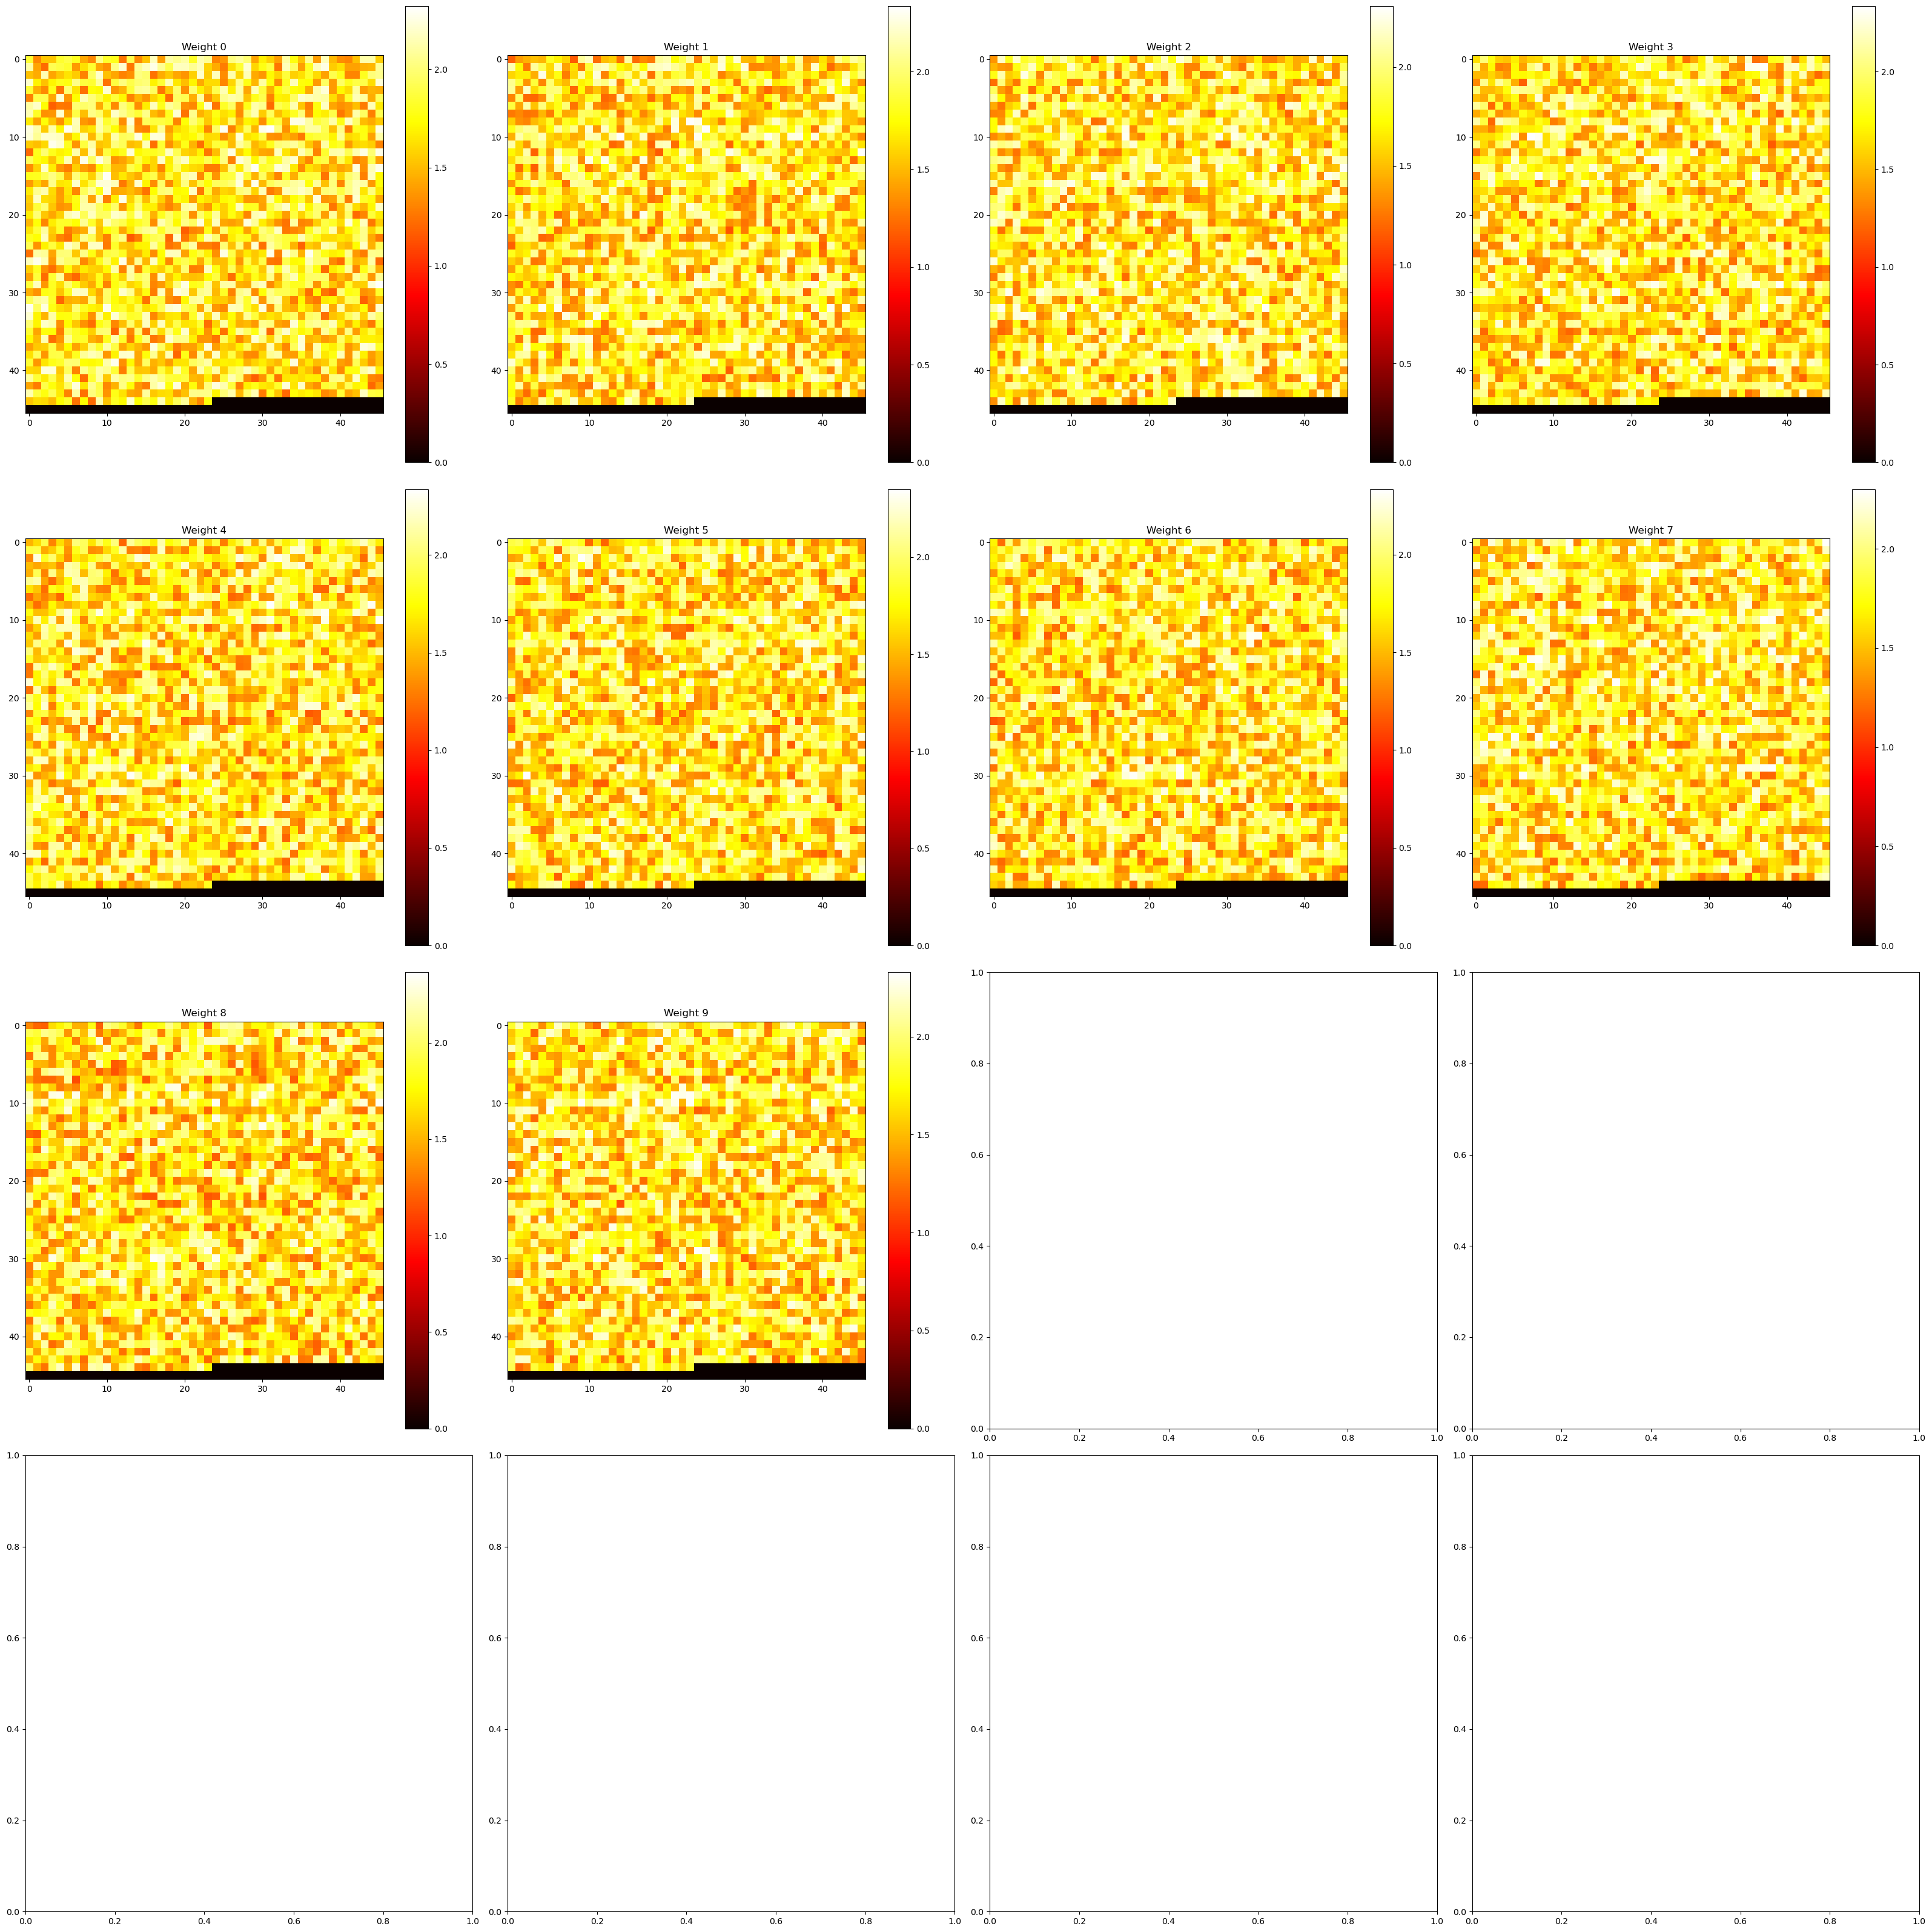

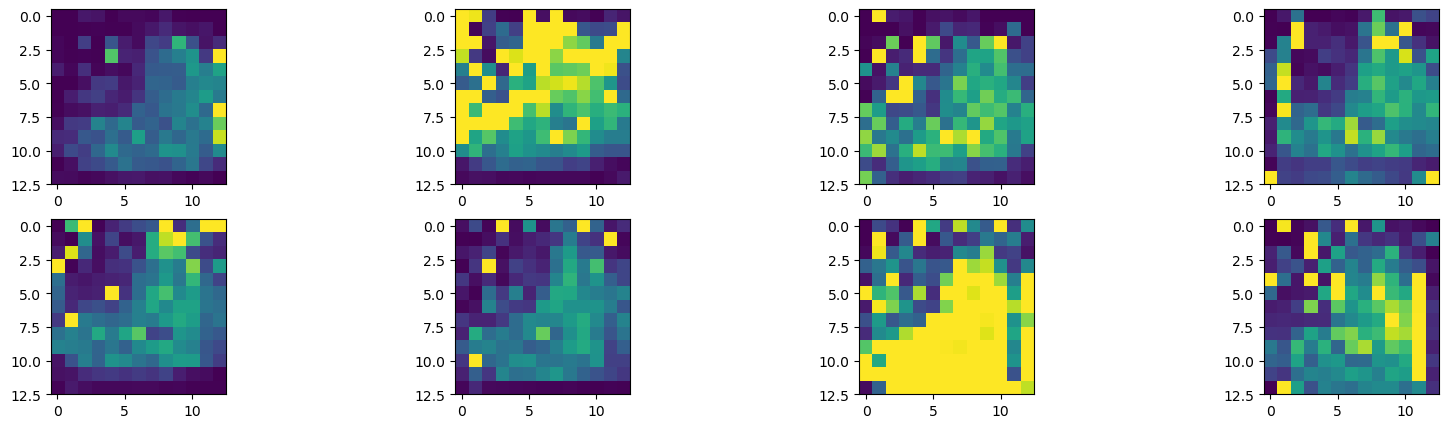

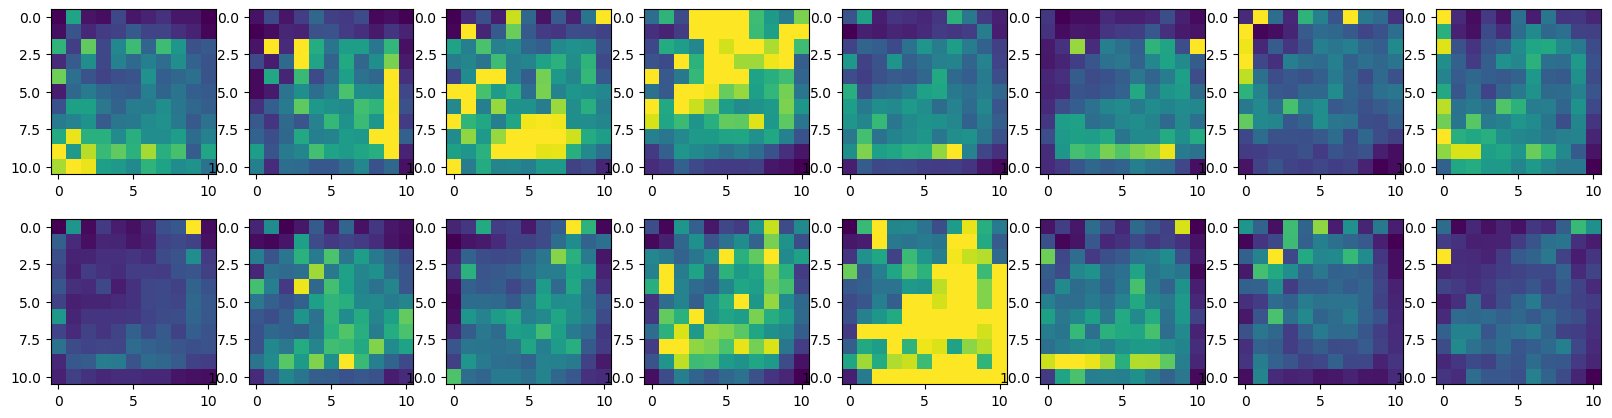

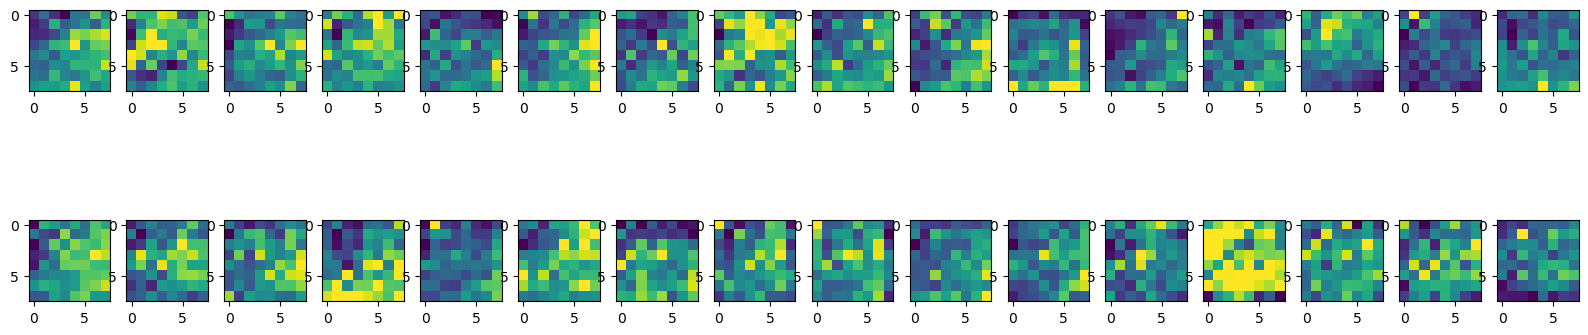

In [38]:
mymodelCNN = CNN.CNNBaseline_Model(inputsize=28, kernel=[4,3,4], stride=[2,1,1], inchannel=[1,8,16], outchannel=[8,16,32], lambd=2, lr=5e-5, gamma=0.99, epsilon=0.01, rho=1, nbclasses=10, topdown=True, wl=CNN.Learning.OrthogonalExclusive, ws=CNN.WeightScale.WeightNormalization, o=CNN.ClassifierLearning.Contrastive)
mymodelCNN = CNN.CNNTD_Experiment(epoch=1, mymodel=mymodelCNN, dataloader=train_dataloader, dataset='FashionMNIST', nclasses=10, imgtype=CNN.ImageType.Gray)
print(CNN.CNN_Baseline_test(mymodel=mymodelCNN, data_loader=test_dataloader, imgtype=CNN.ImageType.Gray, topdown=True))

In [8]:
print(CNN.CNN_Baseline_test(mymodel=mymodelCNN, data_loader=test_dataloader, imgtype=CNN.ImageType.Gray, topdown=False))

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.1356, {9: (4, 1000, 2118), 5: (173, 1000, 597), 2: (118, 1000, 1418), 7: (748, 1000, 1401), 1: (39, 1000, 231), 3: (36, 1000, 581), 6: (1, 1000, 9), 4: (225, 1000, 1999), 8: (1, 1000, 35), 0: (11, 1000, 255)})


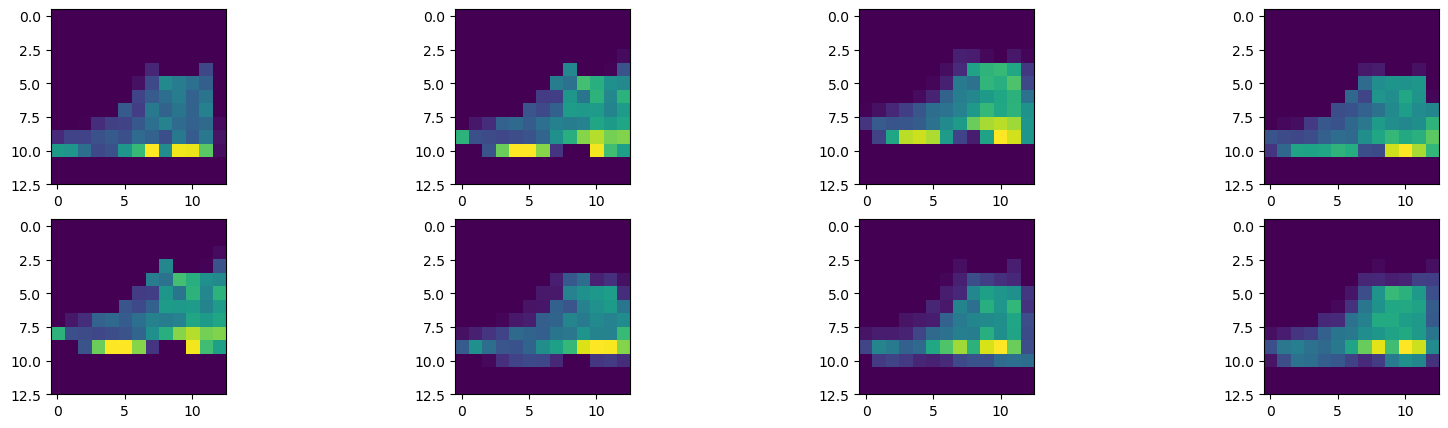

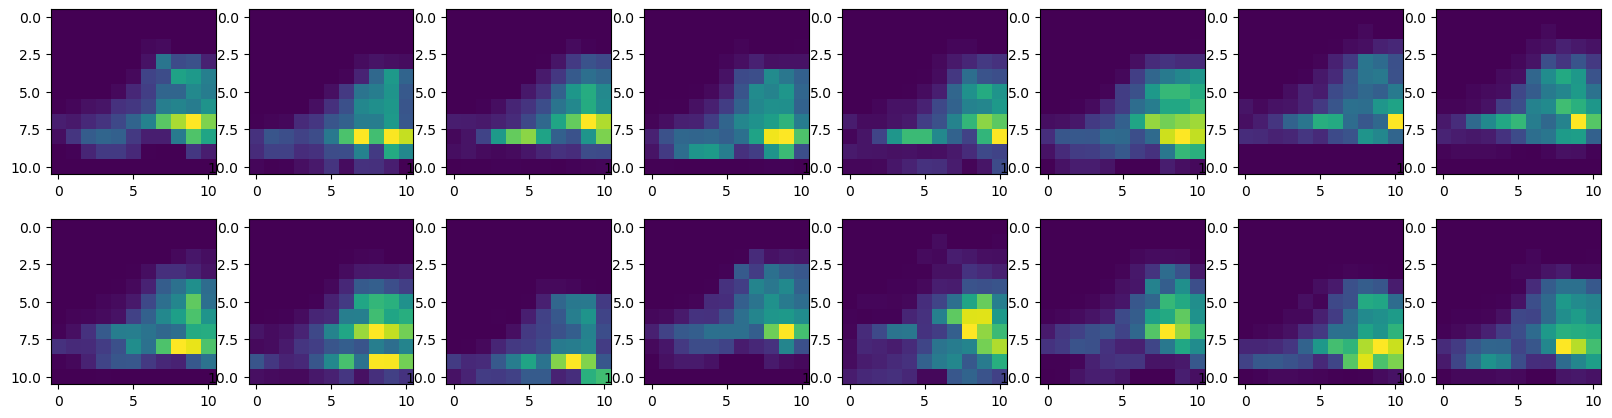

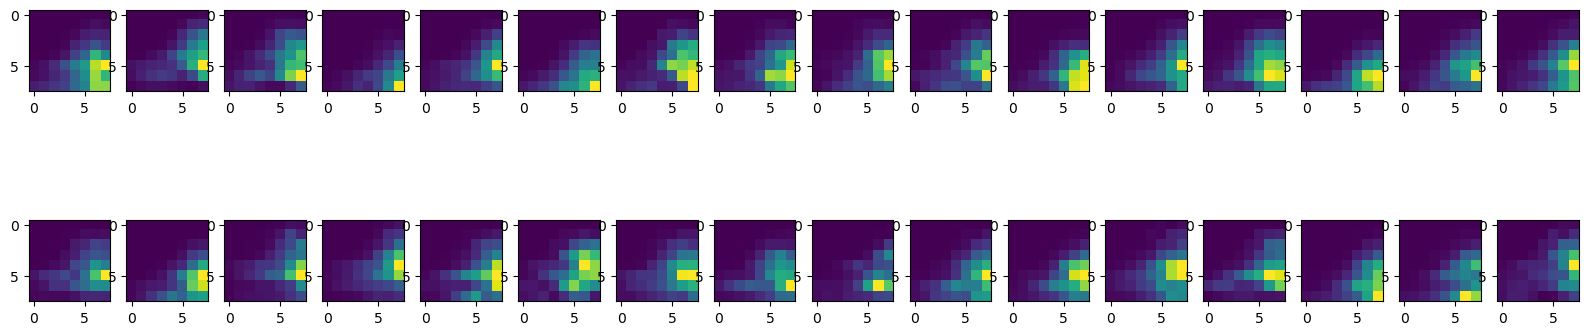

In [7]:
CNN.view_ff_weights(mymodelCNN, '', test_dataloader, False)